<b>Business Understanding</b></br>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

<b>Approved:</b> The Company has approved loan Application</br>

<b>Cancelled:</b> The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.</br>

<b>Refused:</b> The company had rejected the loan (because the client does not meet their requirements etc.).</br>

<b>Unused offer:</b> Loan has been cancelled by the client but at different stages of the process.</br>

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

<b>Business Objectives</b></br>
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


<b>Strategy:</b>
1. Data understanding</br>
    1.1 Loading dataset and describing them </br>
    1.2 Dropping columns having higher percentage of missing values</br>
    1.3 Data Type correction</br>
2. Data formatting</br>
    2.1 Data formatting</br>
3. Data cleaning</br>
    3.1 Handling missing data</br>
    3.2 Identifying outliers</br>
    3.3 Handling outliers</br> 
    3.4 Checking for data issues </br>
    3.5 Data Imbalance Ratio
4. Data Analysis</br>
    4.1 Univariate Analysis</br>
    4.2 Bivariate Analysis</br>
    4.3 Multivariate Analysis</br>

### 1. Data Understanding

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting rows and columns visibility options
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",1000)

<b>1.1 Loading datasets and describing them</b>

In [3]:
appdata = pd.read_csv(r"C:\Users\Ritika Mehra\Desktop\PG Data Science\EDA Assignment\application_data.csv")
appdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
prevdata = pd.read_csv(r"C:\Users\Ritika Mehra\Desktop\PG Data Science\EDA Assignment\previous_application.csv")
prevdata.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [5]:
print("Shape of application data", appdata.shape)
print("Shape of previous application data", prevdata.shape)

Shape of application data (307511, 122)
Shape of previous application data (1670214, 37)


In [6]:
appdata.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [7]:
prevdata.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

<b>Observation:</b> In both the data sets counts of some columns are not matching total number of rows which means there are missing values. Also, for few columns there is huge difference between 75% percentile and max, which means there are outliers present.

<b>1.2 Dropping columns having higher percentage of missing values</b>

In [8]:
#Identifying missing values in app data
100*appdata.isnull().mean().sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

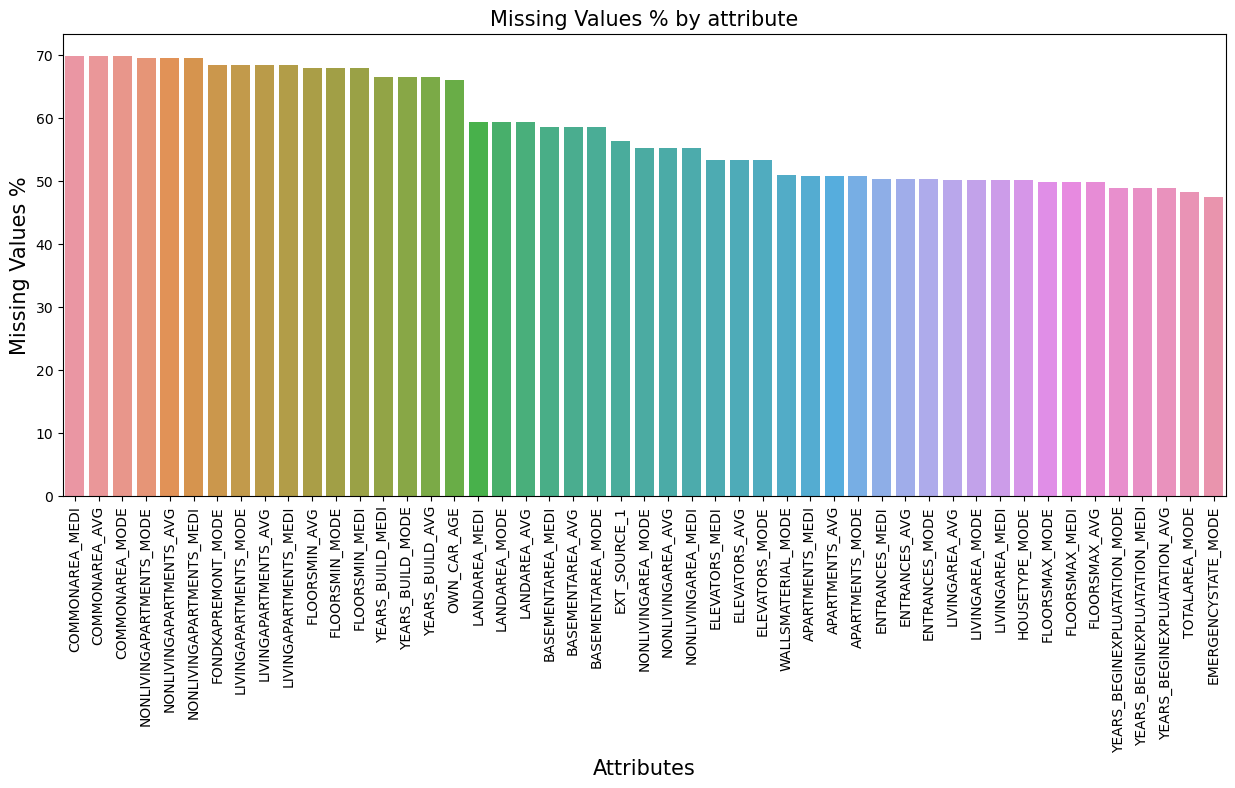

In [9]:
total_missing = appdata.isnull().sum().sort_values(ascending=False)
percent_missing = 100*(appdata.isnull().sum()/appdata.isnull().count()).sort_values( ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Percent>40]
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Attributes', fontsize=15)
plt.ylabel('Missing Values %', fontsize=15)
plt.title('Missing Values % by attribute', fontsize=15)
plt.show()

In [10]:
#Identifying missing values in prev data
100*prevdata.isnull().mean().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

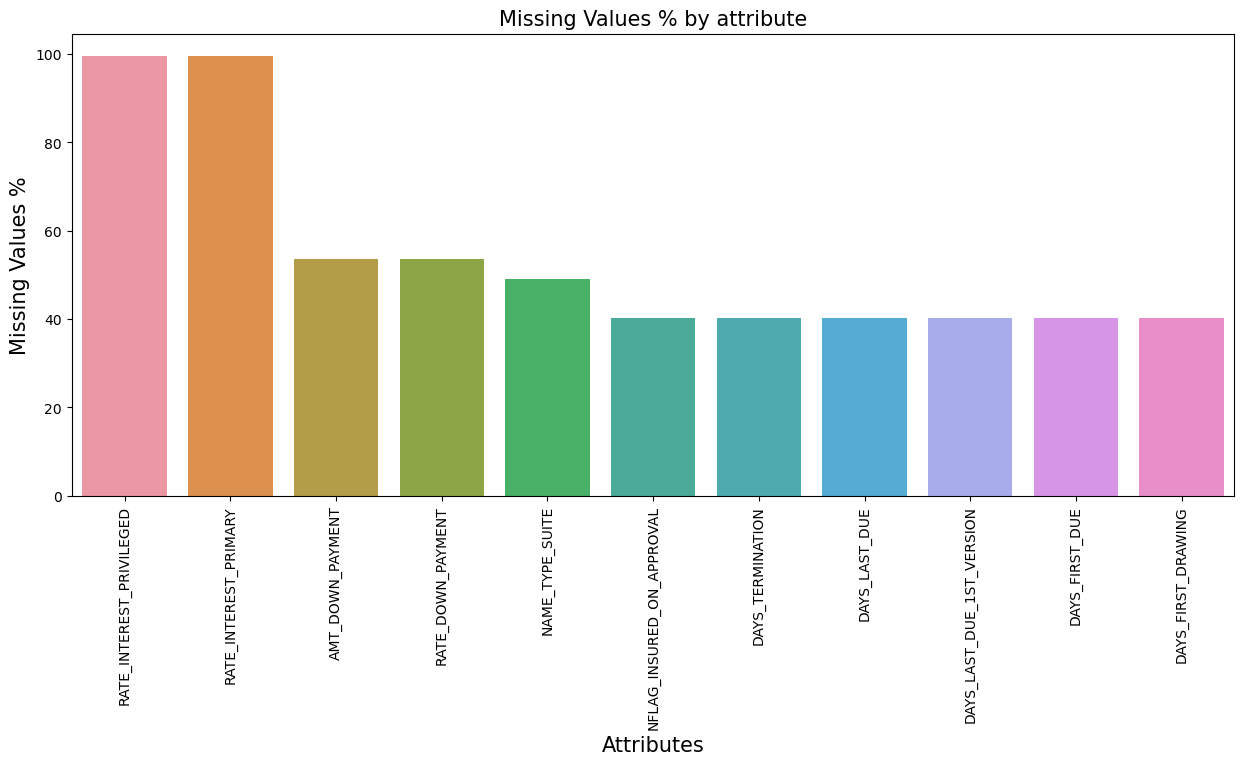

In [11]:
total_missing = prevdata.isnull().sum().sort_values(ascending=False)
percent_missing = 100*(prevdata.isnull().sum()/prevdata.isnull().count()).sort_values( ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Percent>40]
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Attributes', fontsize=15)
plt.ylabel('Missing Values %', fontsize=15)
plt.title('Missing Values % by attribute', fontsize=15)
plt.show()

<b>Observation:</b> In both data sets we have columns with missing value percentage greater than 50%.</br>
<b>Strategy:</b> Dropping columns having > 40% missing values.

In [12]:
#Fetching columns having > 40% missing values
miss_col_df = appdata.isnull().mean().reset_index()
miss_col_df[0] = miss_col_df[0]*100
miss_col_df = miss_col_df.rename(columns={"index":"Column Name", 0:"Missing Value(%)"})
miss_col_df = miss_col_df.sort_values(by=["Missing Value(%)"],ascending=False)
cols_to_drop = list(miss_col_df[miss_col_df["Missing Value(%)"]>40]["Column Name"])
cols_to_drop

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [13]:
appdata1 = appdata.drop(cols_to_drop, axis=1)
100*appdata1.isnull().mean().sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [14]:
#Fetching columns having > 40% missing values
miss_col_df1 = prevdata.isnull().mean().reset_index()
miss_col_df1[0] = miss_col_df1[0]*100
miss_col_df1 = miss_col_df1.rename(columns={"index":"Column Name", 0:"Missing Value(%)"})
miss_col_df1 = miss_col_df1.sort_values(by=["Missing Value(%)"],ascending=False)
cols_to_drop1 = list(miss_col_df1[miss_col_df1["Missing Value(%)"]>40]["Column Name"])
cols_to_drop1

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [15]:
prevdata1 = prevdata.drop(cols_to_drop1, axis=1)
100*prevdata1.isnull().mean().sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [16]:
print("Shape of application data now", appdata1.shape)
print("Shape of previous application data now", prevdata1.shape)

Shape of application data now (307511, 73)
Shape of previous application data now (1670214, 26)


<b>Observation: </b> The appdata dataframe has columns reduced to 73 from 122 and prevdata dataframe has columns reduced to 26 from 37.

<b>1.2 Checking Data Types</b>

In [17]:
appdata1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

<b>Observation:</b> All numeric data has int or float type. </br>
Few columns like CNT_FAM_MEMBERS will never have decimal so we can change the type to int. </br>
We can also change the type of categorical columns to categorical, so that we can create additional categories if needed.

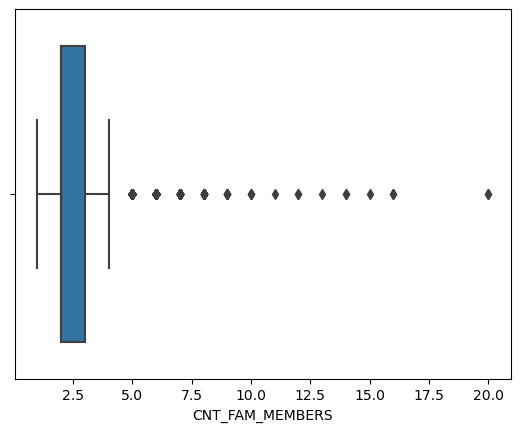

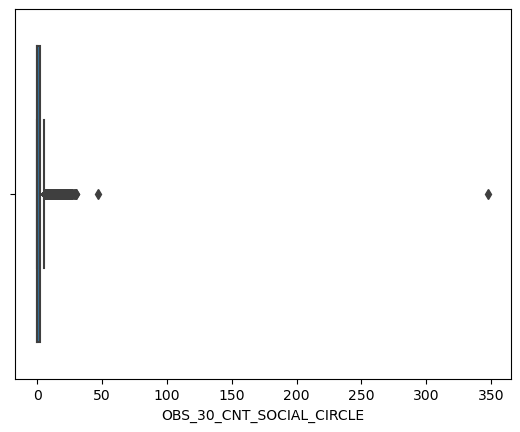

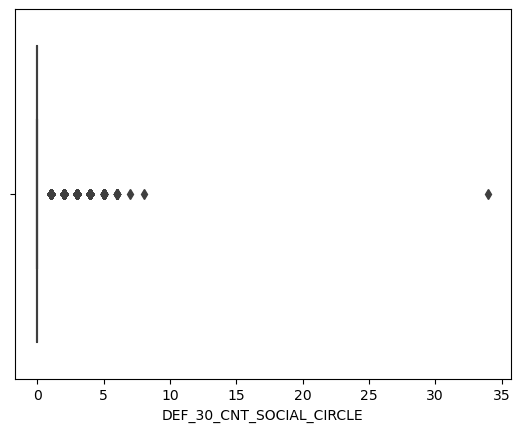

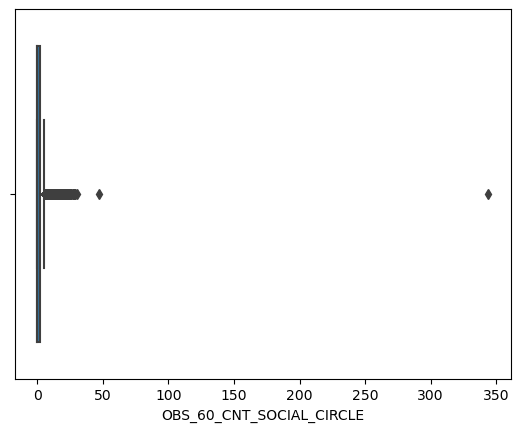

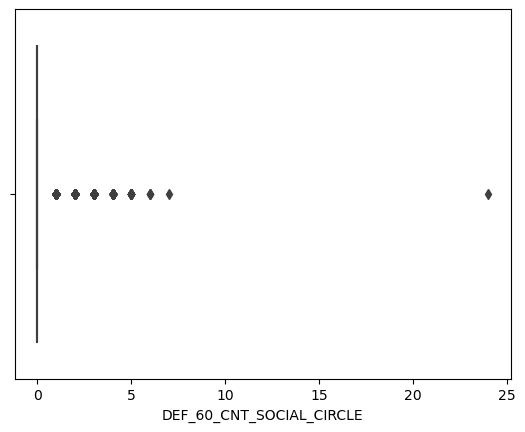

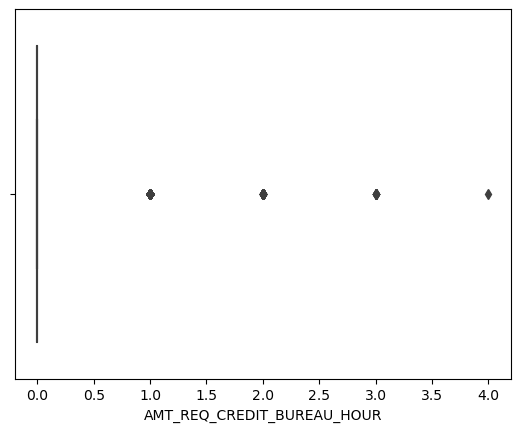

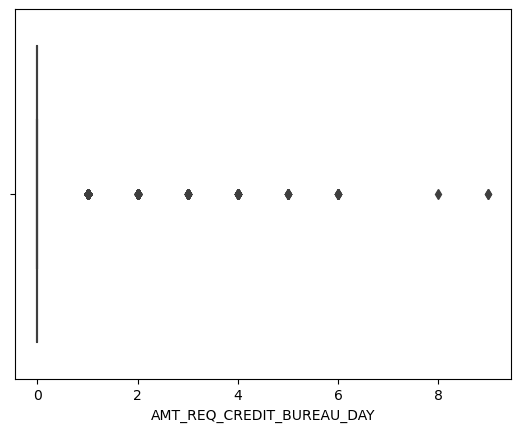

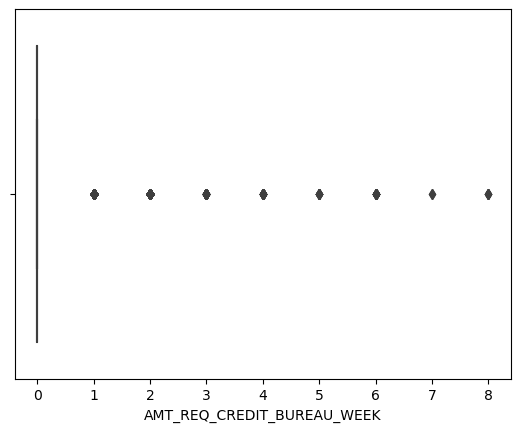

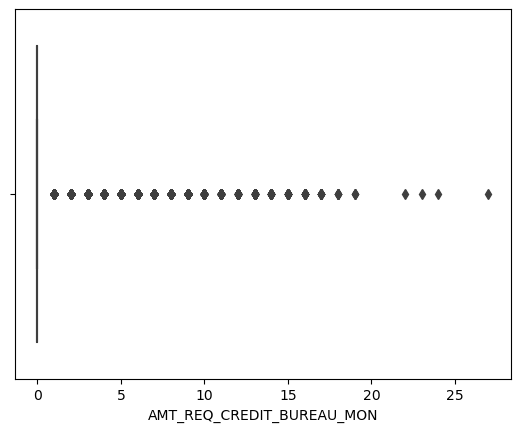

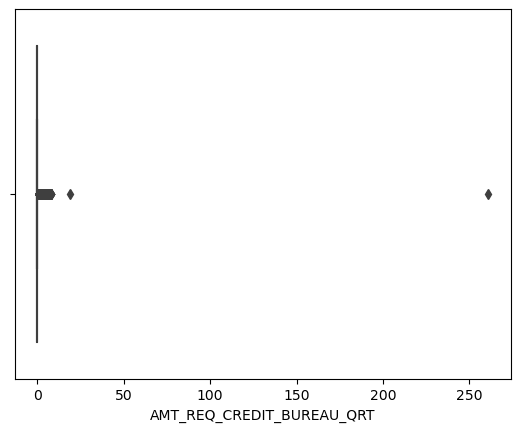

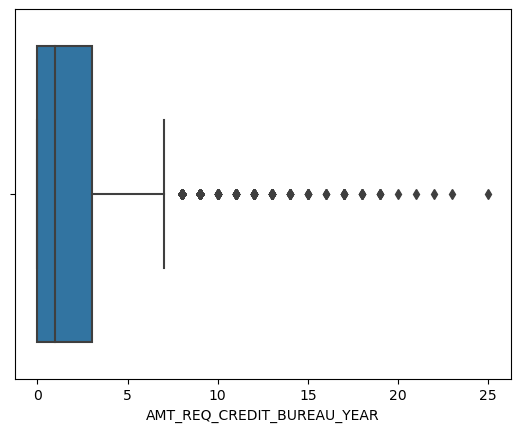

In [18]:
#Type is float as there are missing values, checking if they have outliers
cols_to_update = ["CNT_FAM_MEMBERS","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in cols_to_update:
    sns.boxplot(appdata1[i])
    plt.show()

<b>Observation:</b> All the columns specified have outliers.</br>
<b>Strategy:</b> Replacing missing values with median as it is not affected by outliers.

In [19]:
for i in cols_to_update:
    appdata1[i] = appdata1[i].replace(np.nan, appdata1[i].median()) 
    appdata1[i] = appdata1[i].astype("int64")
appdata1.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [20]:
#Changing categorical data's datatype to category
obj_to_cat = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
                       'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                       'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                       'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19',
                       'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
                       'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'
                      ]
for i in obj_to_cat:
    appdata1[i] =pd.Categorical(appdata1[i])
appdata1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE             category
CODE_GENDER                    category
FLAG_OWN_CAR                   category
FLAG_OWN_REALTY                category
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                category
NAME_INCOME_TYPE               category
NAME_EDUCATION_TYPE            category
NAME_FAMILY_STATUS             category
NAME_HOUSING_TYPE              category
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                     category
FLAG_EMP_PHONE                 category
FLAG_WORK_PHONE                category
FLAG_CONT_MOBILE               category


In [21]:
prevdata1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

<b>Observation:</b> All numeric data has int or float type. </br>
Column CNT_PAYMENT will never have decimal value.</br>
<b>Strategy:</b>Change the datatype to int for CNT_PAYMENT. </br>
Change the type of categorical columns to categorical, so that we can create additional categories if needed.

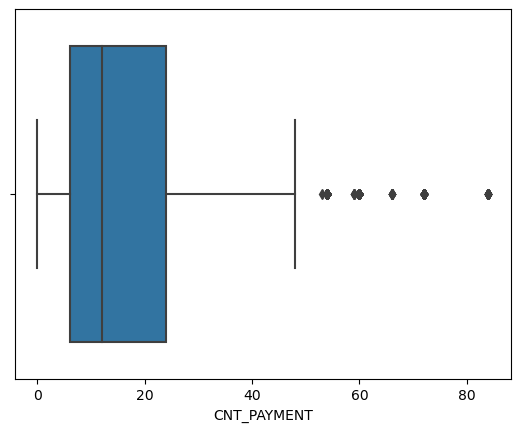

In [22]:
sns.boxplot(prevdata1["CNT_PAYMENT"])
plt.show()

<b>Observation:</b> The column has outliers.</br>
<b>Strategy:</b>Impute the missing values with median.

In [23]:
prevdata1["CNT_PAYMENT"] = prevdata1["CNT_PAYMENT"].replace(np.nan, prevdata1["CNT_PAYMENT"].median()) 
prevdata1["CNT_PAYMENT"] = prevdata1["CNT_PAYMENT"].astype("int64")
prevdata1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                      int64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [24]:
#Changing datatype of categorical data to category
obj_to_cat1 = ["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]
for i in obj_to_cat1:
    prevdata1[i] =pd.Categorical(prevdata1[i])
prevdata1.dtypes

SK_ID_PREV                        int64
SK_ID_CURR                        int64
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START           int64
FLAG_LAST_APPL_PER_CONTRACT    category
NFLAG_LAST_APPL_IN_DAY            int64
NAME_CASH_LOAN_PURPOSE         category
NAME_CONTRACT_STATUS           category
DAYS_DECISION                     int64
NAME_PAYMENT_TYPE              category
CODE_REJECT_REASON             category
NAME_CLIENT_TYPE               category
NAME_GOODS_CATEGORY            category
NAME_PORTFOLIO                 category
NAME_PRODUCT_TYPE              category
CHANNEL_TYPE                   category
SELLERPLACE_AREA                  int64
NAME_SELLER_INDUSTRY           category
CNT_PAYMENT                       int64
NAME_YIELD_GROUP               category


### 2. Data Formatting

In [25]:
appdata1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0       -9461           -637            -3648.0            -2120   
1      -16765          -1188            -1186.0             -291   
2      -19046           -225            -4260.0            -2531   
3      -19005          -3039            -9833.0            -2437   
4      -19932          -3038            -4311.0            -3458   

   DAYS_LAST_PHONE_CHANGE  
0                 -1134.0  
1                  -828.0  
2                  -815.0  
3                  -617.0  
4                 -1106.0

In [26]:
prevdata1["DAYS_DECISION"].head()

0    -73
1   -164
2   -301
3   -512
4   -781
Name: DAYS_DECISION, dtype: int64

<b>Observation:</b> Here negative data represents number of days since application date.</br>
<b>Strategy:</b> Converting them to positive number and in years.

In [27]:
#function to convert negative no. to positive
def to_years(x):
    return round(abs(x)/365,2)

In [28]:
#Converting negative values to positive and in years for age
appdata1["AGE"] = appdata1.DAYS_BIRTH.apply(lambda x: to_years(x))
appdata1["EMP_AGE"] = appdata1.DAYS_EMPLOYED.apply(lambda x: to_years(x))
appdata1["REG_YR"] = appdata1.DAYS_REGISTRATION.apply(lambda x: to_years(x))
appdata1["ID_PUBLISH_YR"] = appdata1.DAYS_ID_PUBLISH.apply(lambda x: to_years(x))
appdata1["LAST_PHONE_CHANGE_YR"] = appdata1.DAYS_LAST_PHONE_CHANGE.apply(lambda x: to_years(x))
appdata1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0            -2120          1              1               0                1   
1             -291          1              1               0                1   
2            -2531          1              1               1                1   
3            -2437          1              1               0                1   
4            -3458          1              1               0                1   

  FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0          1          0        Laborers                1                    2   
1          1          0      Core staff                2                    1   
2          1          0        Laborers                1                    2   
3          0          0        Laborers                2                    2   
4          0          0      Core staff                1                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           2                     MONDAY   
3                           2                  WEDNESDAY   
4                           2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                  

In [29]:
prevdata1["DECISION_YR"] = prevdata1.DAYS_DECISION.apply(lambda x: to_years(x))
prevdata1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DECISION_YR  
0           12           middle  POS mobile with interest         0.20  
1           36       low_action          Cash X-Sell: low         0.45  
2           12             high         Cash X-Sell: high         0.82  
3           12           middle       Cash X-Sell: middle         1.40  
4           24             high         Cash Street: high         2.14

### 3. Data Cleaning

<b>3.1 Handling Missing Values</b>

In [30]:
100*appdata1.isnull().mean().sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
DAYS_LAST_PHONE_CHANGE          0.000325
LAST_PHONE_CHANGE_YR            0.000325
AMT_REQ_CREDIT_BUREAU_MON       0.000000
FLAG_DOCUMENT_4                 0.000000
EMP_AGE                         0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_3                 0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
FLAG_DOCUMENT_2                 0.000000
REG_YR                          0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
ID_PUBLISH_YR                   0.000000
FLAG_DOCUMENT_10

<b>Observation:</b> Missing Value % is high for OCCUPATION_TYPE and EXT_SOURCE_3. Rest of the columns have very less percentage of missing values so we can ignore them.</br>
<b>Strategy:</b> Creating a separate category for missing values in OCCUPATION_TYPE as imputing with mode will affect the analysis due to higher percentage of missing values.</br>
Imputing with mean or median for EXT_SOURCE_3 depending on presence of outliers.

In [31]:
appdata1['OCCUPATION_TYPE'] = appdata1['OCCUPATION_TYPE'].cat.add_categories('Others-Missing')
appdata1['OCCUPATION_TYPE'].fillna('Others-Missing', inplace =True) 
appdata1['OCCUPATION_TYPE'].value_counts()

Others-Missing           96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

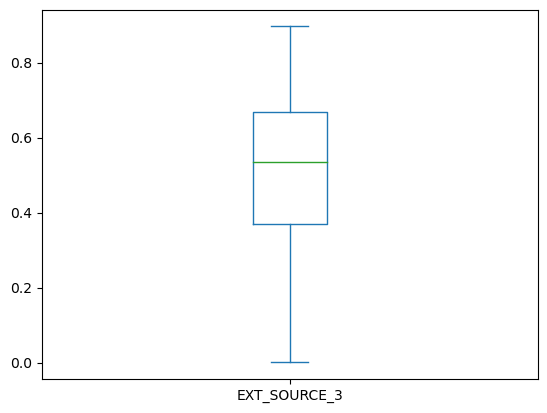

In [32]:
appdata1.EXT_SOURCE_3.plot.box()
plt.show()

<b>Observation:</b> There are no outliers present.</br>
<b>Strategy:</b> Imputing missing values with the mean.

In [33]:
appdata1["EXT_SOURCE_3"]=appdata1["EXT_SOURCE_3"].fillna(appdata1["EXT_SOURCE_3"].mean())
100*appdata1.isnull().mean().sort_values(ascending=False)

NAME_TYPE_SUITE                0.420148
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
DAYS_LAST_PHONE_CHANGE         0.000325
LAST_PHONE_CHANGE_YR           0.000325
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_2                0.000000
ID_PUBLISH_YR                  0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_13               0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000


In [34]:
100*prevdata1.isnull().mean().sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
SK_ID_PREV                      0.000000
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
CNT_PAYMENT                     0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION 

<b>Observation:</b> AMT_GOODS_PRICE and AMT_ANNUITY have higher percentage of null values.</br>
<b>Strategy:</b> Impute the missing values with mean or median depending on presence of outliers.

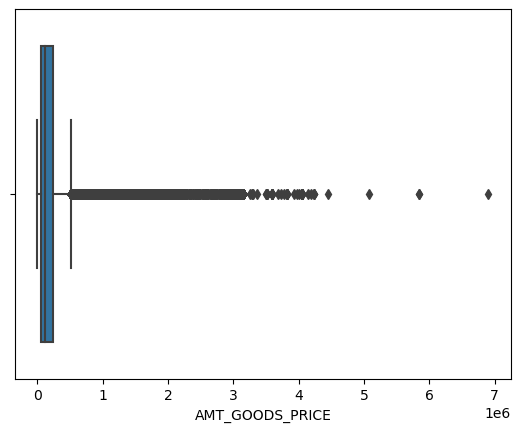

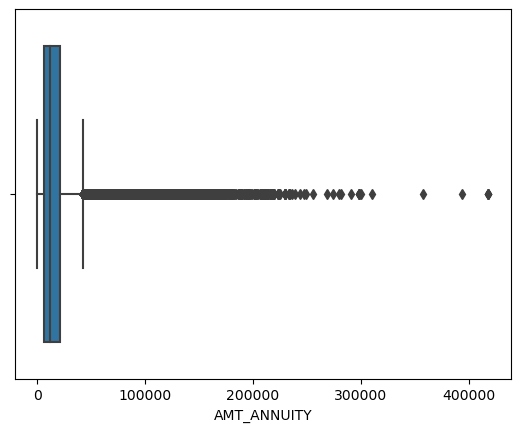

In [35]:
for i in ["AMT_GOODS_PRICE","AMT_ANNUITY"]:
    sns.boxplot(prevdata1[i])
    plt.show()

<b>Observation:</b> Both Columns have outliers.
<b>Strategy:</b> Impute the missing values with median.

In [36]:
for i in ["AMT_GOODS_PRICE","AMT_ANNUITY"]:
    prevdata1[i] = prevdata1[i].replace(np.nan, prevdata1[i].median())
100*prevdata1.isnull().mean().sort_values(ascending=False)

PRODUCT_COMBINATION            0.020716
AMT_CREDIT                     0.000060
SK_ID_PREV                     0.000000
NAME_PAYMENT_TYPE              0.000000
NAME_YIELD_GROUP               0.000000
CNT_PAYMENT                    0.000000
NAME_SELLER_INDUSTRY           0.000000
SELLERPLACE_AREA               0.000000
CHANNEL_TYPE                   0.000000
NAME_PRODUCT_TYPE              0.000000
NAME_PORTFOLIO                 0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_CLIENT_TYPE               0.000000
CODE_REJECT_REASON             0.000000
DAYS_DECISION                  0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE                0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY                    0.000000


<b>3.2 Identifying Outliers</b>

In [37]:
#Segmentation of data into continuous and categorical data for ease of analysis
cont_app = list(set(appdata1.describe()) - set(["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]))
cat_app = list(set(appdata1.columns) - set(appdata1.describe().columns))
cont_prev = list(set(prevdata1.describe()) - set(["DAYS_DECISION"]))
cat_prev = list(set(prevdata1.columns) - set(prevdata1.describe().columns))

Boxplot of AMT_REQ_CREDIT_BUREAU_HOUR


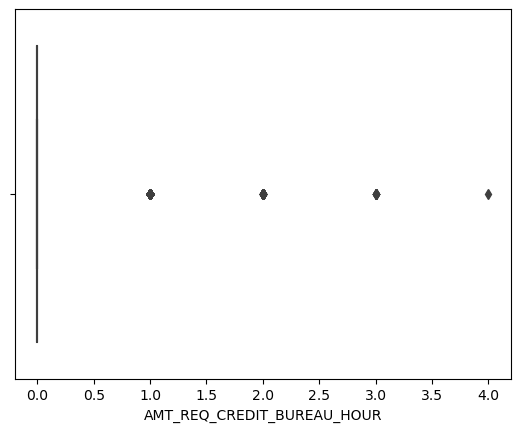

Boxplot of OBS_30_CNT_SOCIAL_CIRCLE


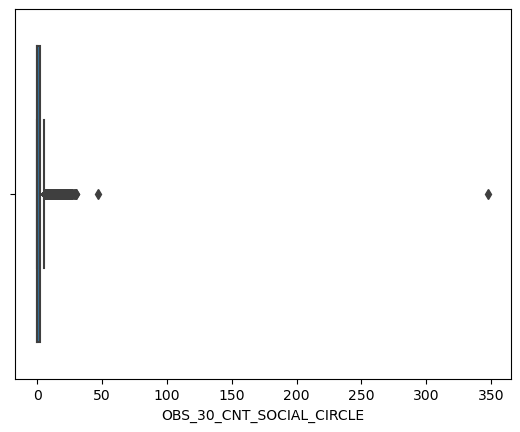

Boxplot of TARGET


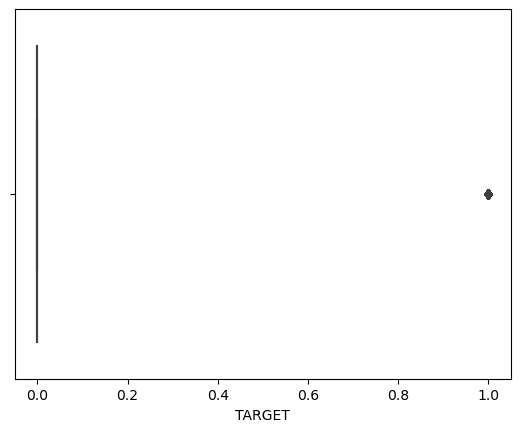

Boxplot of EXT_SOURCE_3


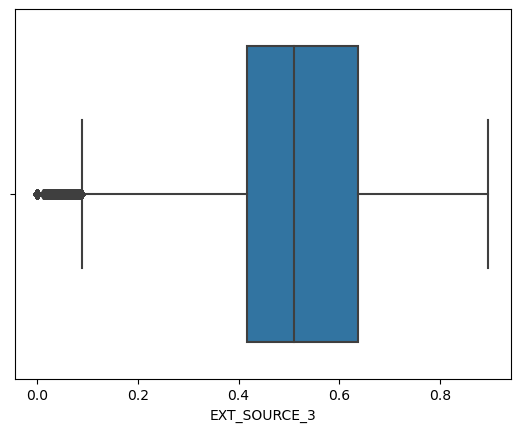

Boxplot of EXT_SOURCE_2


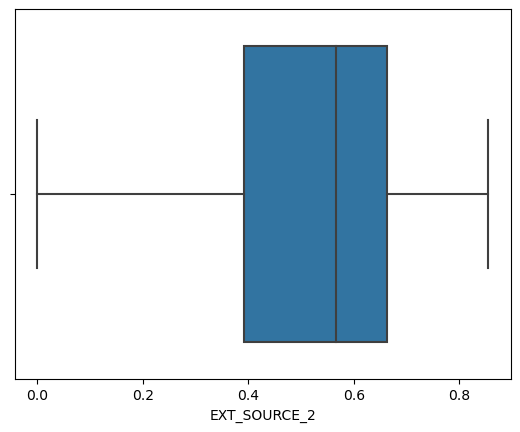

Boxplot of CNT_FAM_MEMBERS


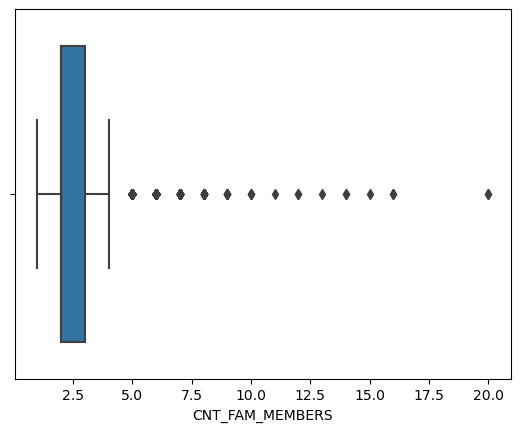

Boxplot of AMT_CREDIT


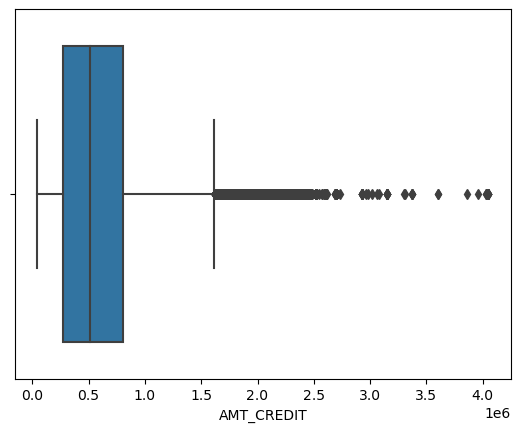

Boxplot of AMT_INCOME_TOTAL


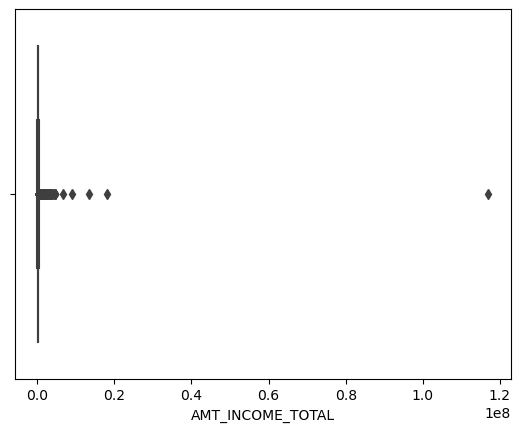

Boxplot of REG_YR


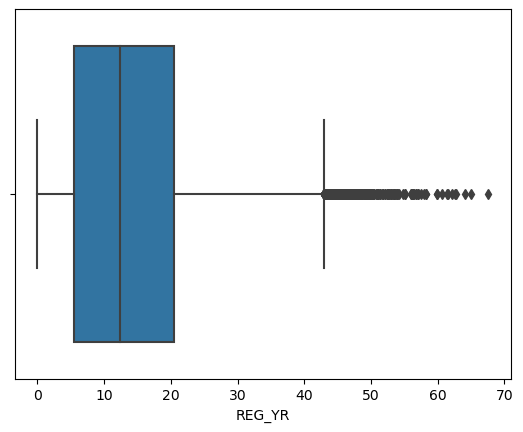

Boxplot of REG_REGION_NOT_LIVE_REGION


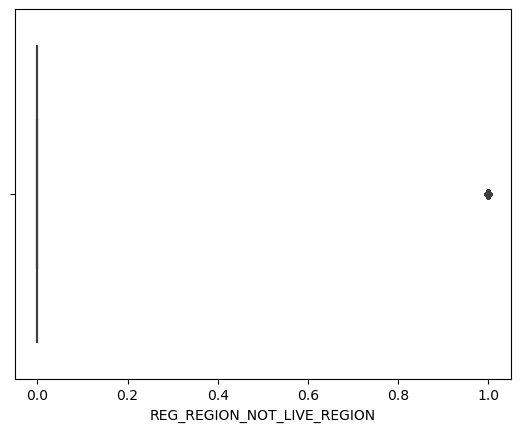

Boxplot of HOUR_APPR_PROCESS_START


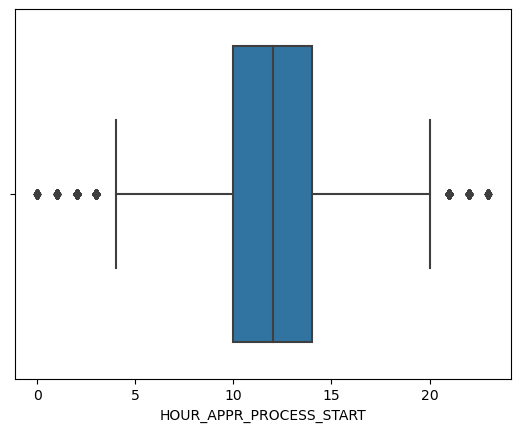

Boxplot of AMT_REQ_CREDIT_BUREAU_MON


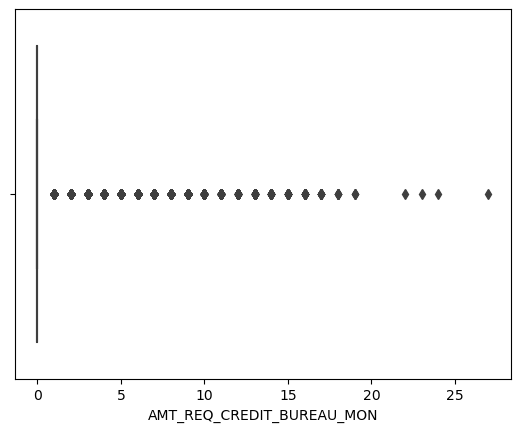

Boxplot of AMT_REQ_CREDIT_BUREAU_WEEK


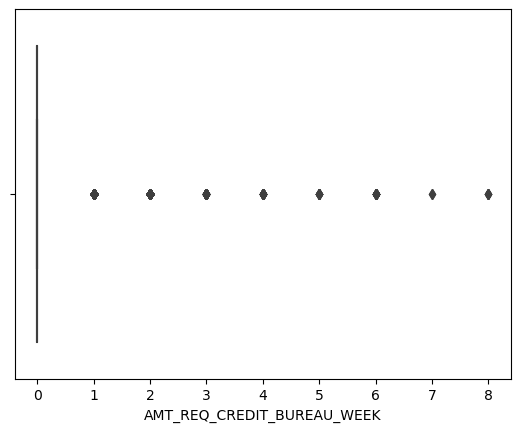

Boxplot of AMT_REQ_CREDIT_BUREAU_YEAR


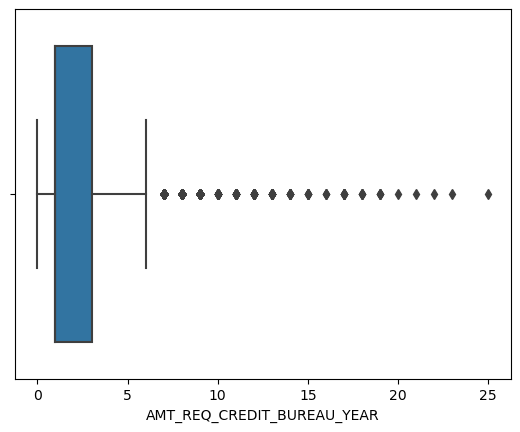

Boxplot of LAST_PHONE_CHANGE_YR


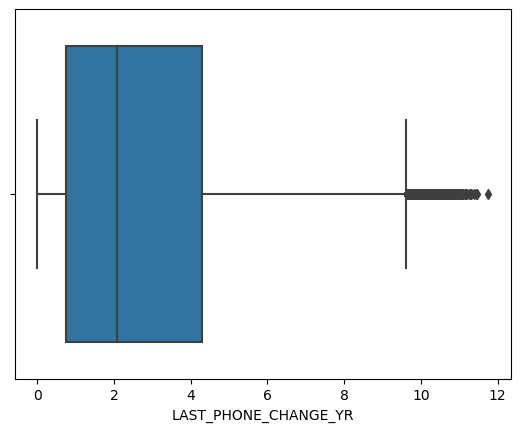

Boxplot of SK_ID_CURR


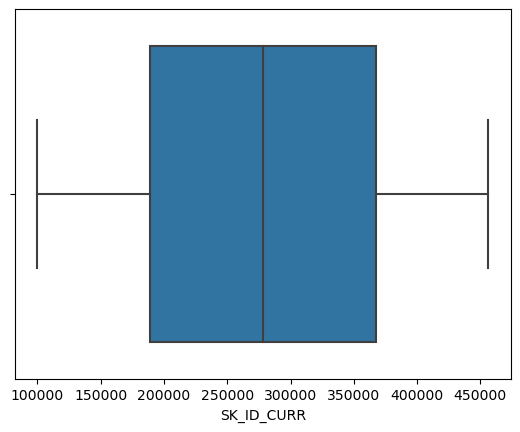

Boxplot of REGION_POPULATION_RELATIVE


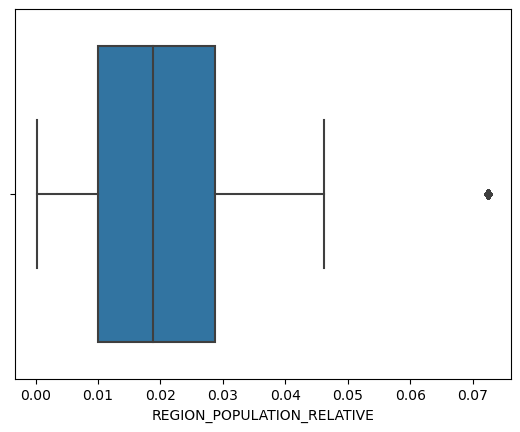

Boxplot of AGE


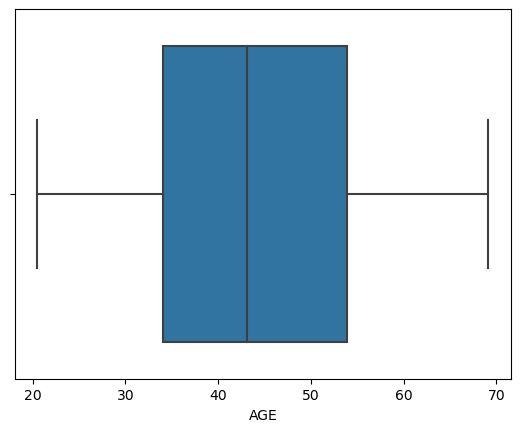

Boxplot of CNT_CHILDREN


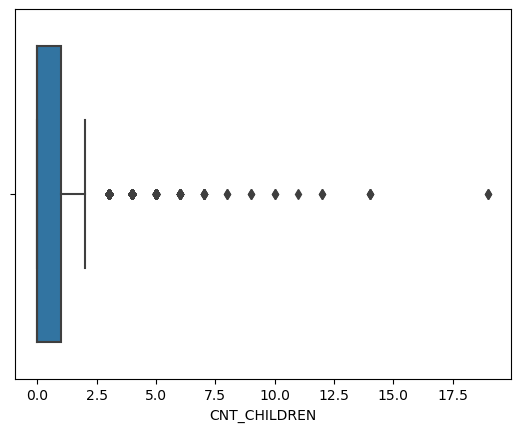

Boxplot of OBS_60_CNT_SOCIAL_CIRCLE


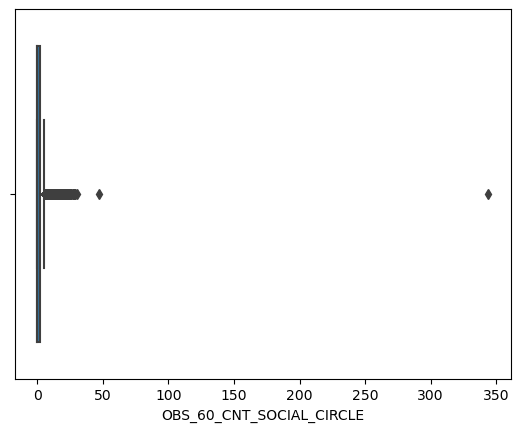

Boxplot of EMP_AGE


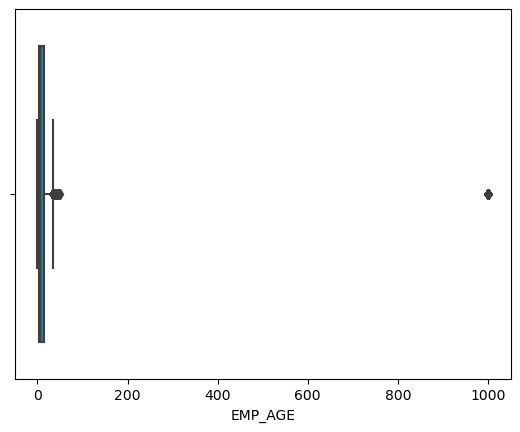

Boxplot of ID_PUBLISH_YR


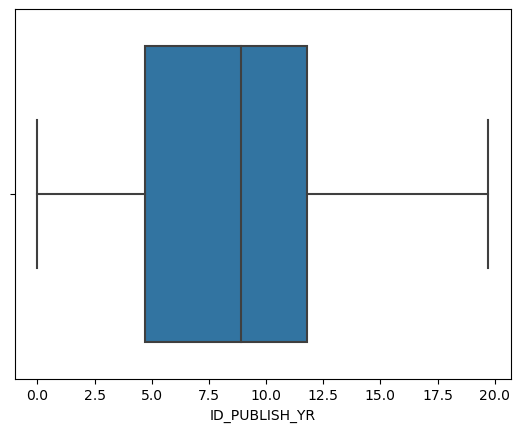

Boxplot of DEF_30_CNT_SOCIAL_CIRCLE


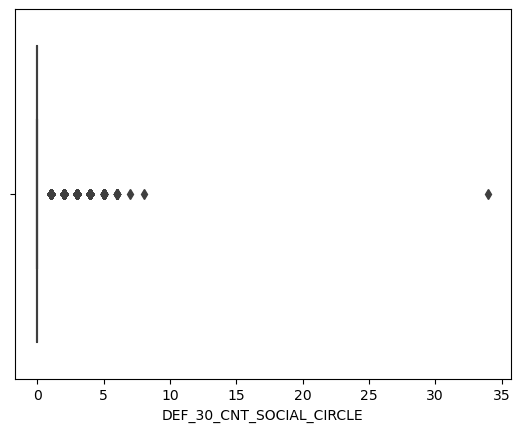

Boxplot of AMT_GOODS_PRICE


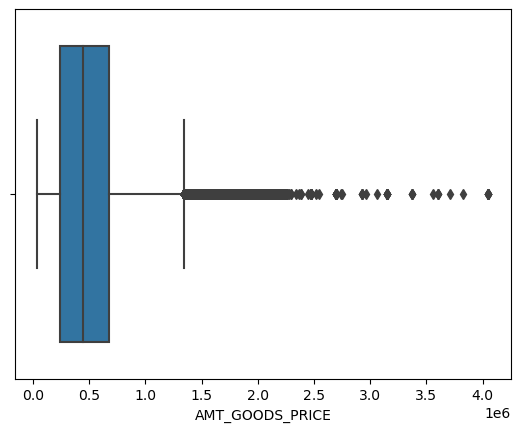

Boxplot of AMT_REQ_CREDIT_BUREAU_DAY


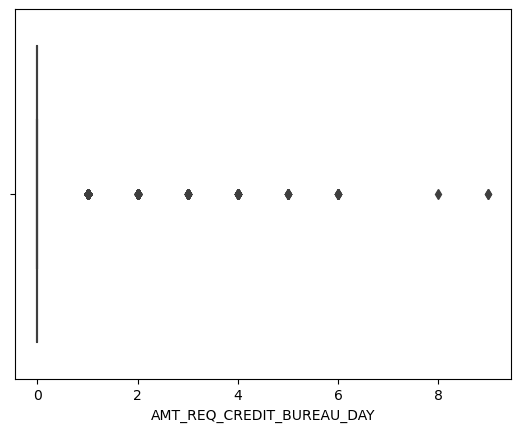

Boxplot of DEF_60_CNT_SOCIAL_CIRCLE


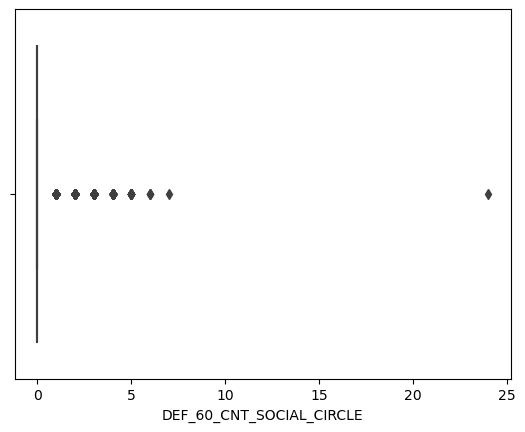

Boxplot of AMT_REQ_CREDIT_BUREAU_QRT


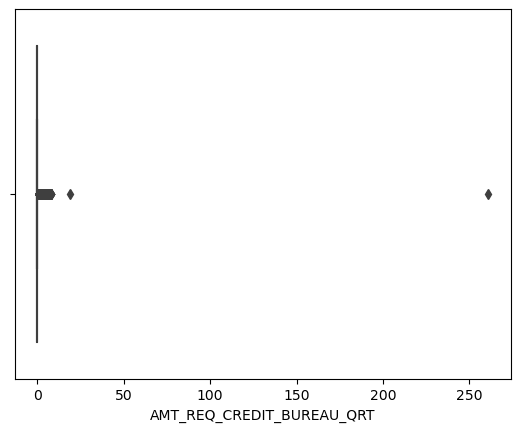

Boxplot of DAYS_REGISTRATION


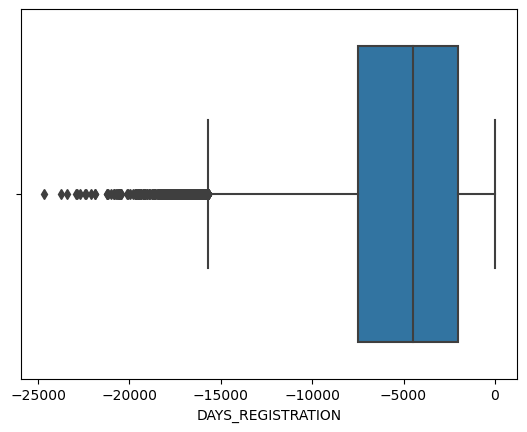

Boxplot of AMT_ANNUITY


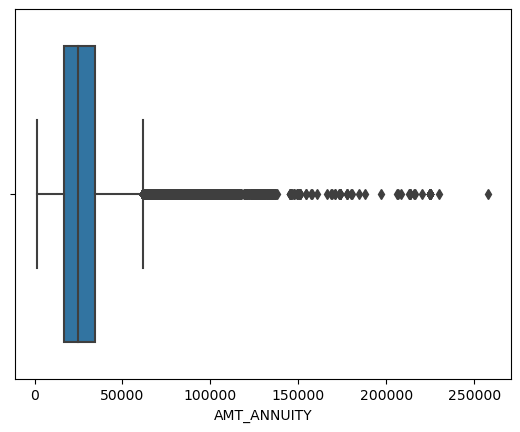

In [38]:
for i in cont_app:
    print("Boxplot of",i)
    sns.boxplot(appdata1[i])
    plt.show()

<b>Observation:</b> Columns with no outliers: ID_PUBLISH_YR(DAYS_ID_PUBLISH), SK_ID_CURR, FLAG_DOCUMENT_3, EXT_SOURCE_2, FLAG_PHONE, AGE(DAYS_BIRTH)</br>
All other columns have outliers either beyond the upper bound or below the lower bound.</br>
<b>Strategy:</b>Binning the data for amount columns.

Boxplot of AMT_GOODS_PRICE


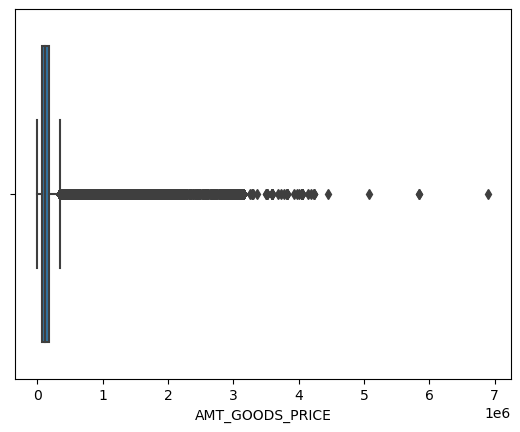

Boxplot of HOUR_APPR_PROCESS_START


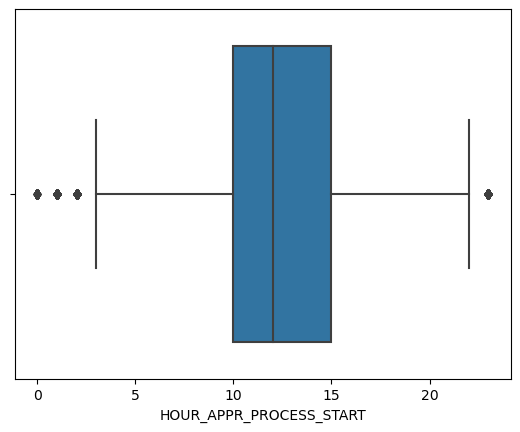

Boxplot of SELLERPLACE_AREA


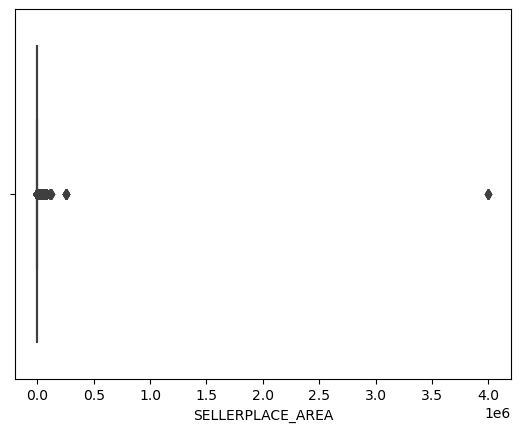

Boxplot of CNT_PAYMENT


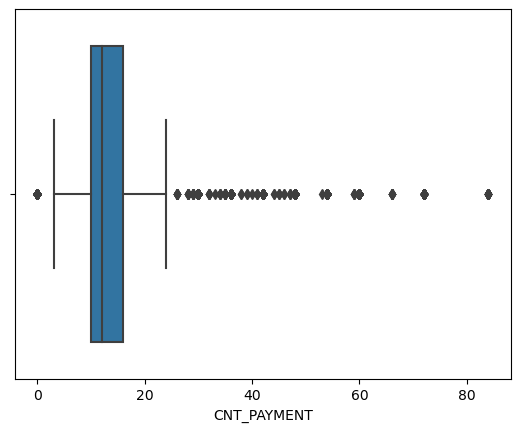

Boxplot of AMT_APPLICATION


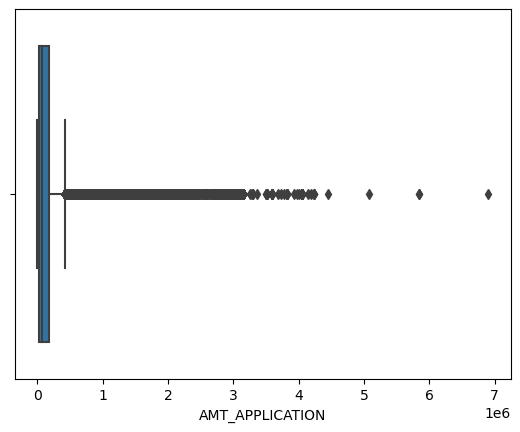

Boxplot of SK_ID_PREV


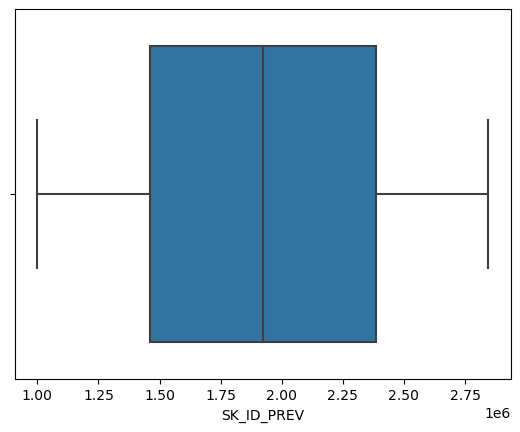

Boxplot of AMT_CREDIT


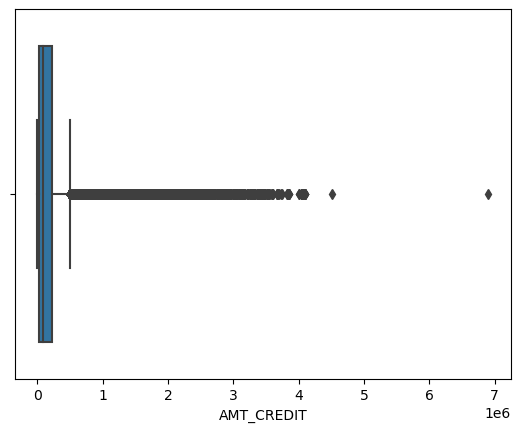

Boxplot of AMT_ANNUITY


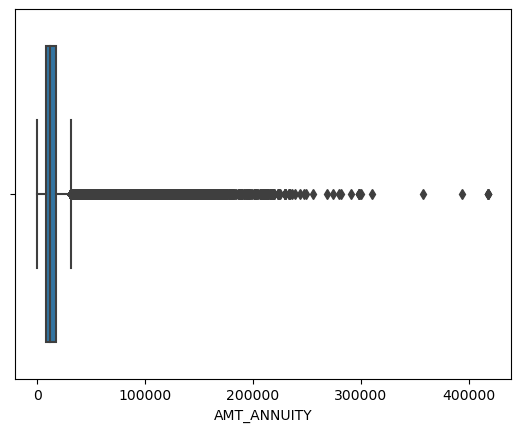

Boxplot of NFLAG_LAST_APPL_IN_DAY


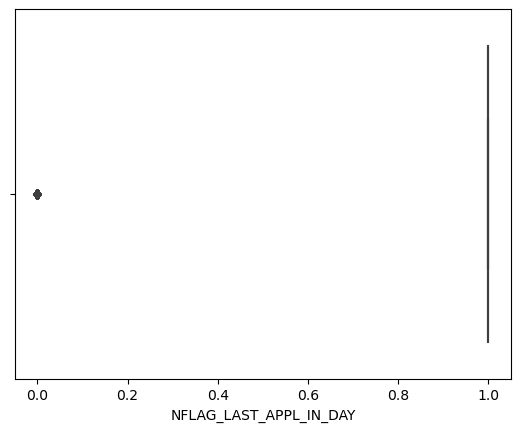

Boxplot of DECISION_YR


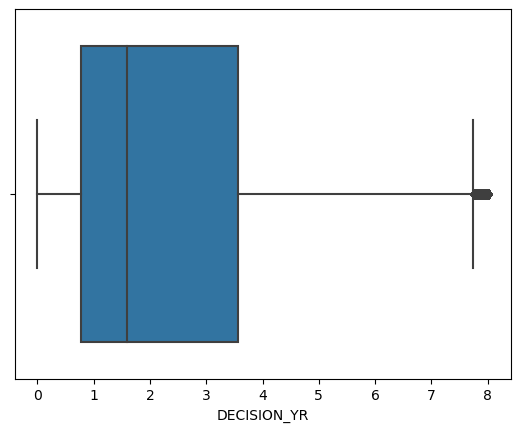

Boxplot of SK_ID_CURR


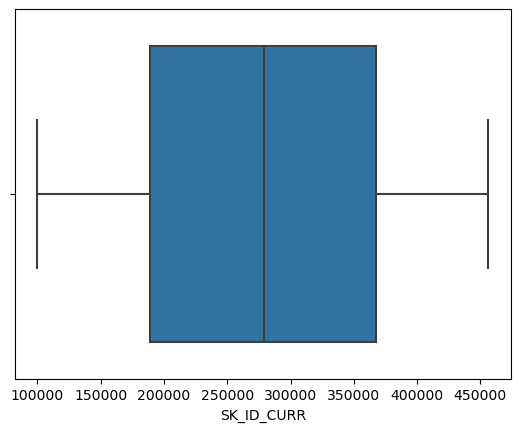

In [39]:
for i in cont_prev:
    print("Boxplot of",i)
    sns.boxplot(prevdata1[i])
    plt.show()

<b>Observation:</b> All columns except id columns have outliers.

<b>3.3 Handling Outliers</b>

In [40]:
bins1 = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000]
label1 = ['0-100K','100K-200K', '200K-300K','300K-400K','400K-500K','500K-600K','600K-700K','700K-800K',
       '800K-900K','900K-1M', '1M Above']
appdata1['INCOME_RANGE'] = pd.cut(appdata1['AMT_INCOME_TOTAL'],bins=bins1, labels=label1)
appdata1['CREDIT_RANGE'] = pd.cut(appdata1['AMT_CREDIT'],bins=bins1, labels=label1)
appdata1['ANNUITY_RANGE'] = pd.cut(appdata1['AMT_ANNUITY'],bins=bins1, labels=label1)
appdata1['GOODS_PRICE_RANGE'] = pd.cut(appdata1['AMT_GOODS_PRICE'],bins=bins1, labels=label1)
appdata1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0            -2120          1              1               0                1   
1             -291          1              1               0                1   
2            -2531          1              1               1                1   
3            -2437          1              1               0                1   
4            -3458          1              1               0                1   

  FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0          1          0        Laborers                1                    2   
1          1          0      Core staff                2                    1   
2          1          0        Laborers                1                    2   
3          0          0        Laborers                2                    2   
4          0          0      Core staff                1                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                           2                  WEDNESDAY   
1                           1                     MONDAY   
2                           2                     MONDAY   
3                           2                  WEDNESDAY   
4                           2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0                          0                           0   
1                          0                  

<b>3.4 Data Issue</b>

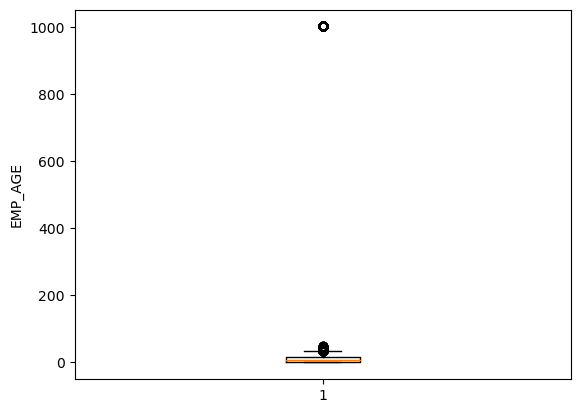

In [41]:
plt.boxplot(appdata1.EMP_AGE)
plt.ylabel('EMP_AGE')
plt.show()

<b>Observation:</b> There is a clear outlier.</br>
<b>Strategy:</b>Check if the value can be imputed or it is data issue.

In [42]:
appdata1[appdata1.EMP_AGE >100].NAME_INCOME_TYPE.value_counts()

Pensioner               55352
Unemployed                 22
Businessman                 0
Commercial associate        0
Maternity leave             0
State servant               0
Student                     0
Working                     0
Name: NAME_INCOME_TYPE, dtype: int64

<b>Observation:</b> The outlier is present only for unemployed and pensioner incoem type category.</br>
<b>Strategy:</b>Check if it is the default value or it is data issue.

In [43]:
appdata1[appdata1.NAME_INCOME_TYPE=="Unemployed"].EMP_AGE.value_counts()

1000.67    22
Name: EMP_AGE, dtype: int64

<b>Observation:</b> It is default value for the Unemployed.

In [44]:
appdata1[appdata1.NAME_INCOME_TYPE=="Pensioner"].EMP_AGE.value_counts()

1000.67    55352
3.69           1
14.00          1
6.41           1
30.67          1
35.25          1
5.19           1
22.30          1
8.93           1
4.48           1
4.57           1
Name: EMP_AGE, dtype: int64

<b>Observation:</b> The outlier has the maximum frequency but valid data is also present.</br>
<b>Strategy:</b> This data anomaly should be checked with data provider to understand if the value has any meaning. If not, we can impute it with a value which is 75% percentile + 1.

<b>3.5 Data Imbalance</b>

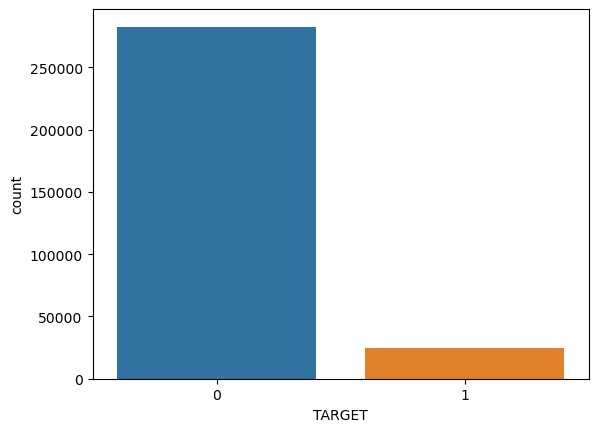

In [45]:
sns.countplot(appdata1['TARGET'])
plt.show()

In [46]:
appdata1.TARGET.value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

<b>Observation:</b> 91% of data represents non-defaulter clients. Data is highly imbalanced.</br>
<b>Strategy:</b> Segmenting data to form separate dataframes for defaulter and non-defaulter clients.

In [47]:
defaulterapp = appdata1[appdata1.TARGET==1]
defaulterapp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0             -2120          1              1               0   
26            -1827          1              1               0   
40            -1029          1              1               0   
42            -4409          1              1               1   
81            -4199          1              0               0   

   FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1          1          0        Laborers                1   
26                1          0          0   Cooking staff                1   
40                1          0          0        Laborers                2   
42                1          1          0     Sales staff                2   
81                1          0          0  Others-Missing                2   

   REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY  \
0                     2                           2   
26                    3                           2   
40                    2                           2   
42                    3                           3   
81                    2                           2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0                            0                          0   
26                           0                          0   
40                           0                          0   
42     

In [48]:
nondefaulterapp = appdata1[appdata1.TARGET==0]
nondefaulterapp.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
1             -291          1              1               0                1   
2            -2531          1              1               1                1   
3            -2437          1              1               0                1   
4            -3458          1              1               0                1   
5             -477          1              1               1                1   

  FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
1          1          0      Core staff                2                    1   
2          1          0        Laborers                1                    2   
3          0          0        Laborers                2                    2   
4          0          0      Core staff                1                    2   
5          1          0        Laborers                2                    2   

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
1                           1                     MONDAY   
2                           2                     MONDAY   
3                           2                  WEDNESDAY   
4                           2                   THURSDAY   
5                           2                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
1                          0                           0   
2                          0            

### 4. Data Analysis

<b>4.1 Univariate Analysis</b>

In [49]:
#functions to create visualization plots for univariate analysis
def draw_distplot(cols):
    for i in cols:
        plt.figure(figsize=(15,5))
        sns.distplot(defaulterapp[i], hist=False, color='r',label ="Defaulter")
        sns.distplot(nondefaulterapp[i], hist=False, color='b', label ="Non-Defaulter")
        plt.title("TARGET V/S "+i, fontdict={'fontsize' : 12, 'fontweight' : 5, 'color' : 'Black'}) 
        plt.legend()
        plt.show()

def draw_piechart(cols):
    for i in cols:
        plt.subplot(1, 2, 1)
        temp = defaulterapp[i].value_counts().reset_index()
        temp = temp.rename(columns={i :"Column Name"})
        temp = temp[temp["Column Name"]*100/temp["Column Name"].sum() > 3] #Percentage cutoff - 3%
        plt.pie(temp["Column Name"],labels=temp["index"],autopct='%1.2f%%')
        plt.title('Distribution of ' + i + ' among Defaulters',loc='center')        
        plt.show()
        plt.subplot(1, 2, 2)
        temp = nondefaulterapp[i].value_counts().reset_index()
        temp = temp.rename(columns={i :"Column Name"})
        temp = temp[temp["Column Name"]*100/temp["Column Name"].sum() > 3] #Percentage cutoff - 3%
        plt.pie(temp["Column Name"],labels=temp["index"],autopct='%1.2f%%')
        plt.title('Distribution of ' + i + ' among Non-Defaulters',loc='center')        
        plt.show()

def prev_draw_distplot(cols):
    for i in cols:
        plt.figure(figsize=(15,5))
        sns.distplot(cashloanprev[i], hist=False, color='r',label ="Cash Loans")
        sns.distplot(consloanprev[i], hist=False, color='b', label ="Consumer Loans")
        sns.distplot(revloanprev[i], hist=False, color='g', label ="Revolving Loans")
        plt.title("NAME_CONTRACT_TYPE V/S "+i, fontdict={'fontsize' : 12, 'fontweight' : 5, 'color' : 'Black'}) 
        plt.legend()
        plt.show()

def prev_draw_piechart(cols):
    for i in cols:
        plt.subplot(1, 3, 1)
        temp = cashloanprev[i].value_counts().reset_index()
        temp = temp.rename(columns={i :"Column Name"})
        temp = temp[temp["Column Name"]*100/temp["Column Name"].sum() > 3] #Percentage cutoff - 3%
        plt.pie(temp["Column Name"],labels=temp["index"],autopct='%1.2f%%')
        plt.title('Distribution of ' + i + ' among Cash Loans',loc='right')        
        plt.show()
        plt.subplot(1, 3, 2)
        temp = consloanprev[i].value_counts().reset_index()
        temp = temp.rename(columns={i :"Column Name"})
        temp = temp[temp["Column Name"]*100/temp["Column Name"].sum() > 3] #Percentage cutoff - 3%
        plt.pie(temp["Column Name"],labels=temp["index"],autopct='%1.2f%%')
        plt.title('Distribution of ' + i + ' among Consumer Loans',loc='right')
        plt.show()
        plt.subplot(1, 3, 3)
        temp = revloanprev[i].value_counts().reset_index()
        temp = temp.rename(columns={i :"Column Name"})
        temp = temp[temp["Column Name"]*100/temp["Column Name"].sum() > 3] #Percentage cutoff - 3%
        plt.pie(temp["Column Name"],labels=temp["index"],autopct='%1.2f%%')
        plt.title('Distribution of ' + i + ' among Revolving Loans',loc='right')
        plt.show()
        

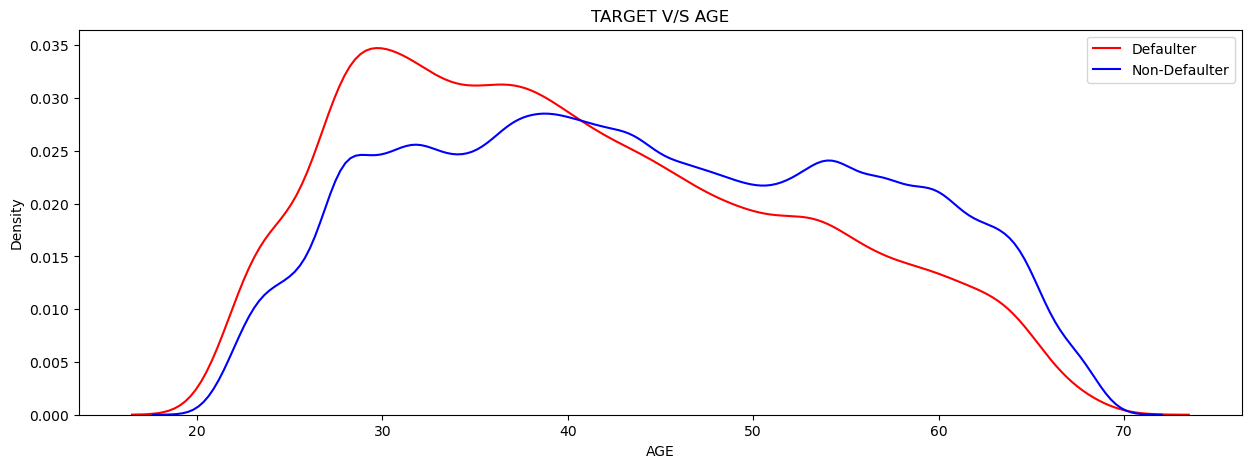

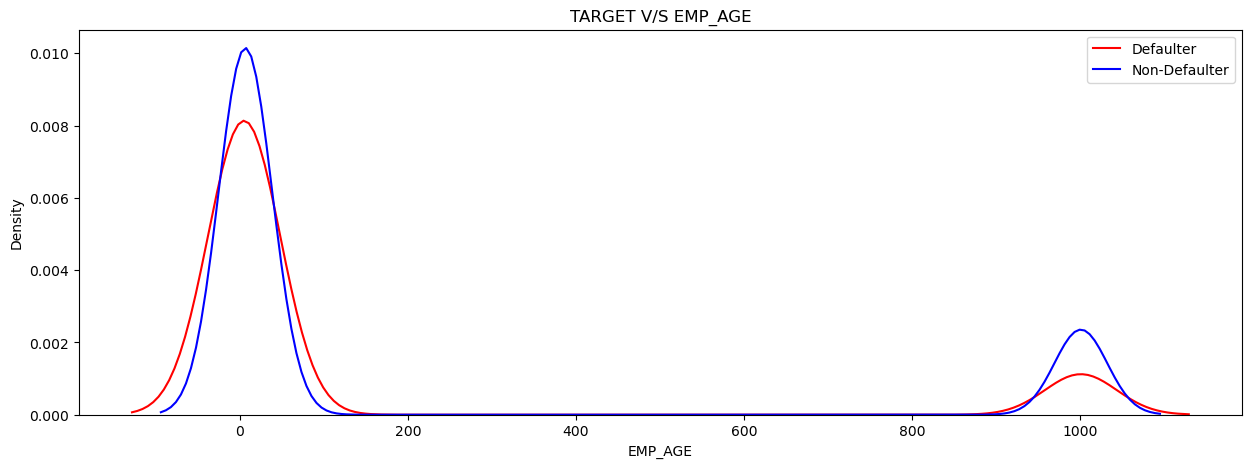

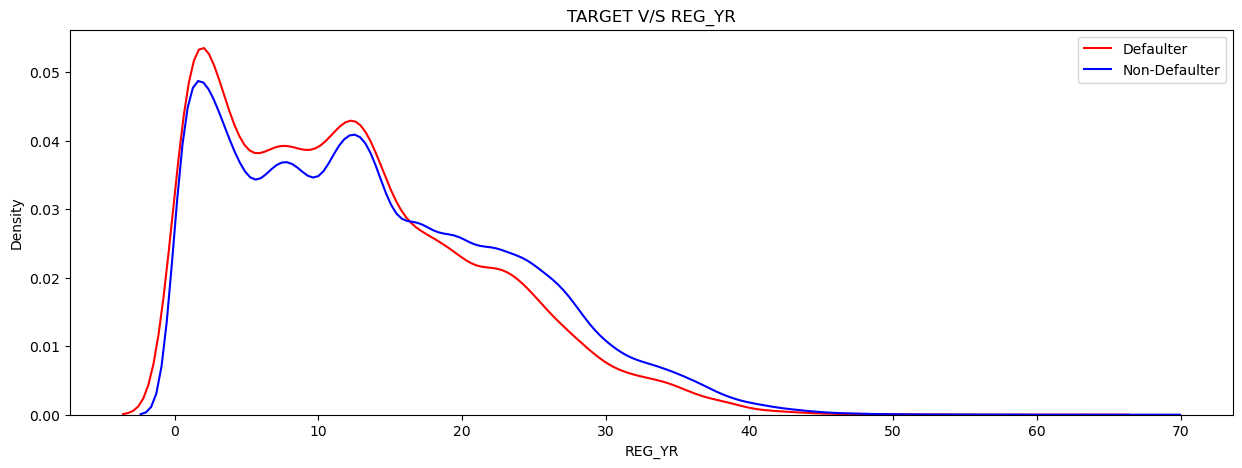

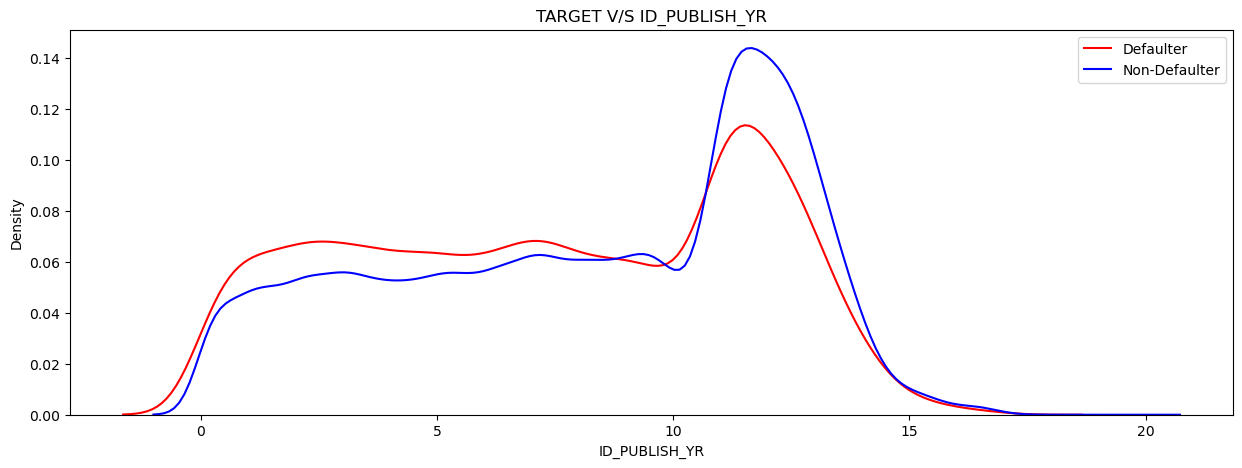

In [50]:
#TARGET V/S AGE, EMP_AGE, REG_YR, ID_PUBLISH_YR
yr_cols = ['AGE','EMP_AGE','REG_YR','ID_PUBLISH_YR']
draw_distplot(yr_cols)

<b>Observation:</b> 1. Clients from the age-group 30-40 are most likely to default.</br>
2. Throughout the employement age range, frequency of non-defaulters are high. </br>
3. Clients who have changed registeration between 0-20 years before current application are more likely to default.</br>
4. Clients who changed their identity document between 10-15 years before current application are more likely to default.</br>

<b>Insights:</b> Since density of 30-40 age group is higher for defaulters than non-defaulters even after data imbalance, we can consider it a strong driver. 

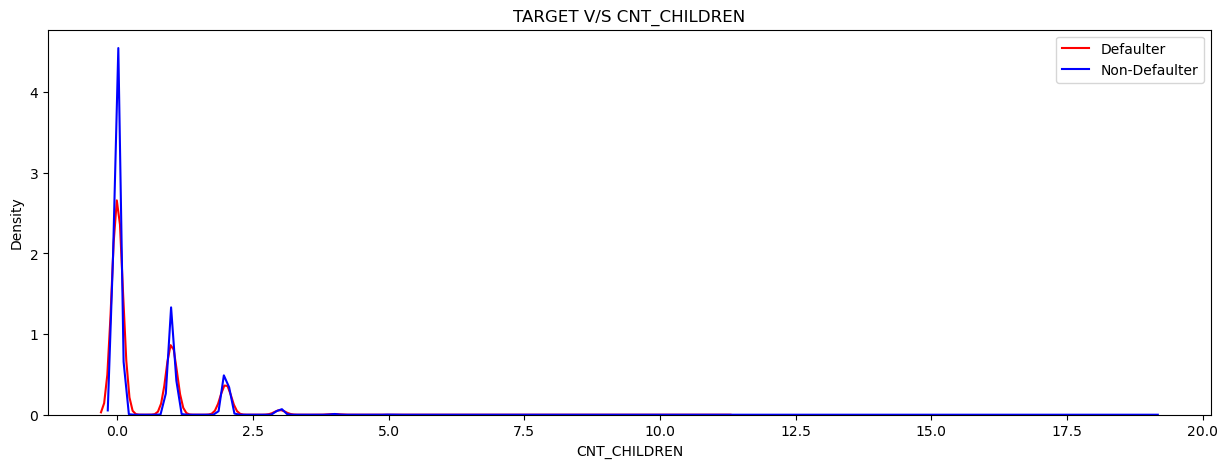

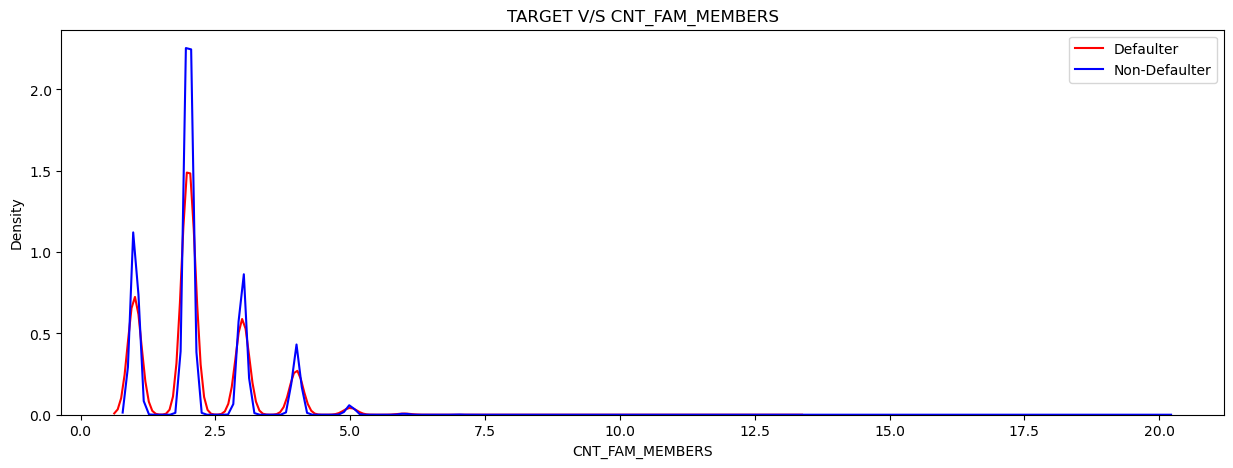

In [51]:
#TARGET V/S CNT_CHILDREN, CNT_FAM_MEMBERS
cnt_cols = ['CNT_CHILDREN','CNT_FAM_MEMBERS']
draw_distplot(cnt_cols)

<b> Observation:</b> Client with 0 children are more likely to default. </br>
Client having 2 family members are more likely to default. 

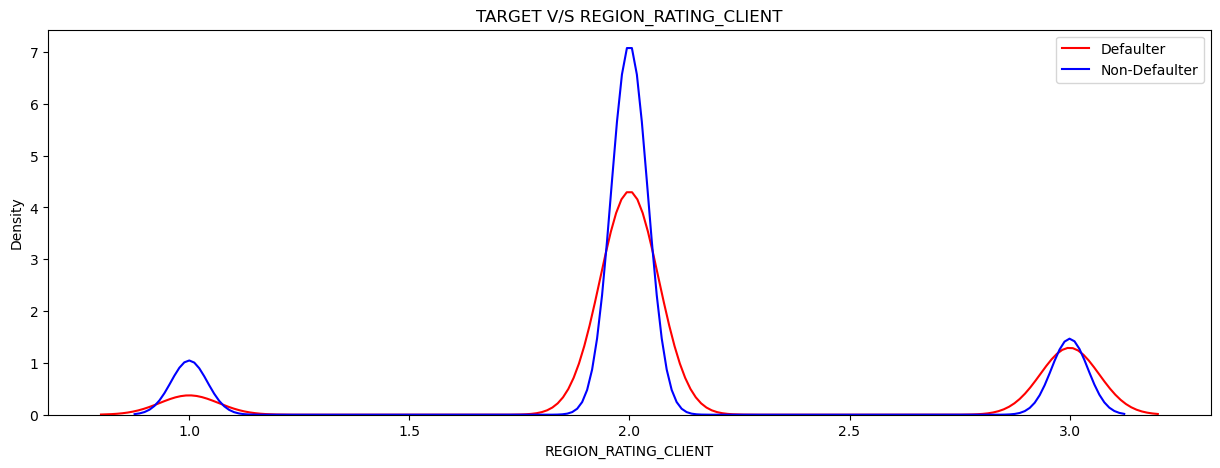

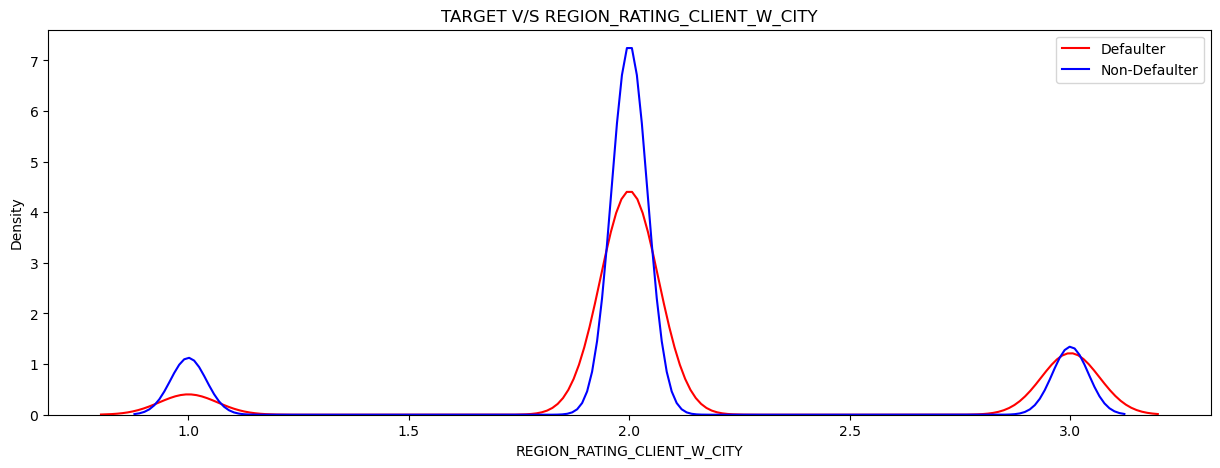

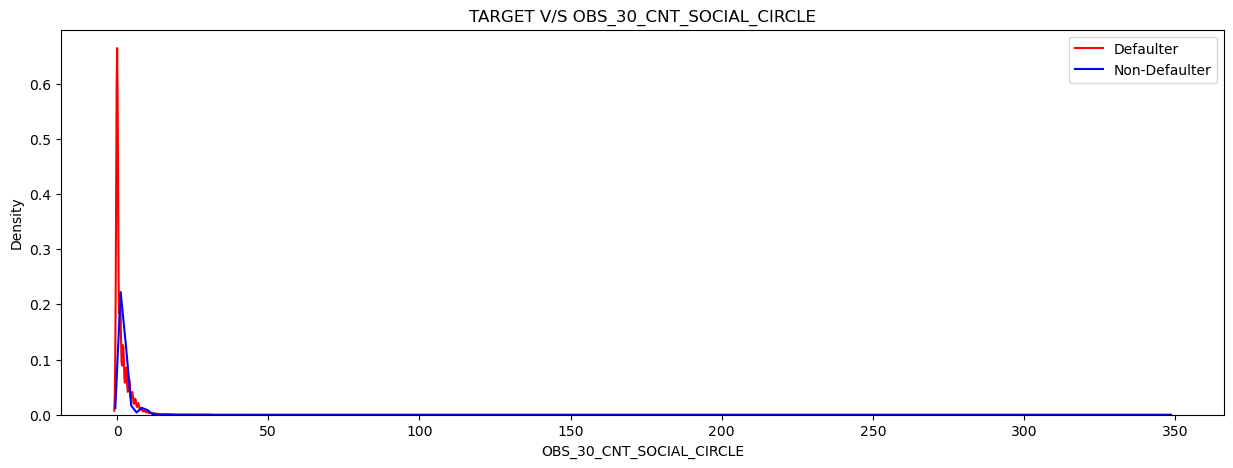

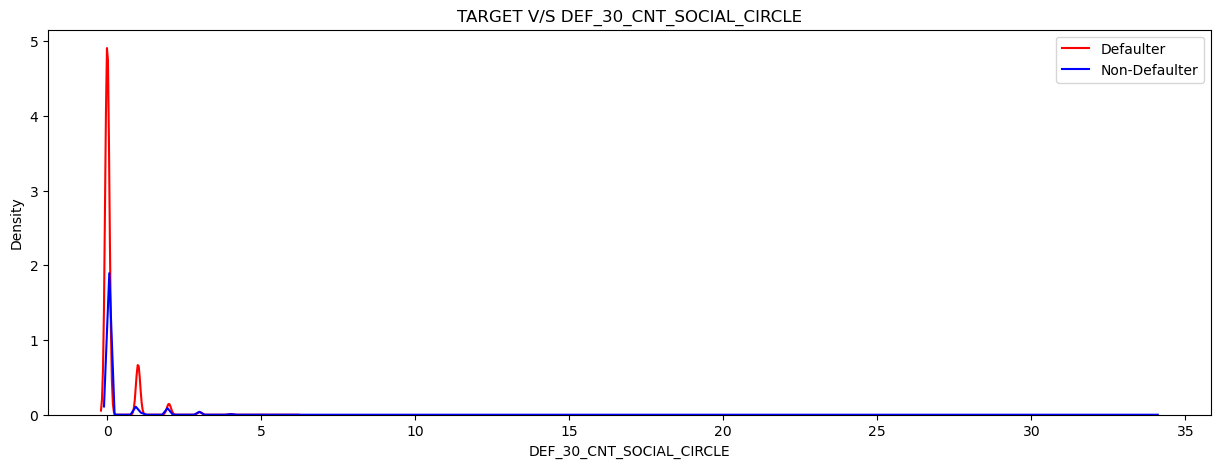

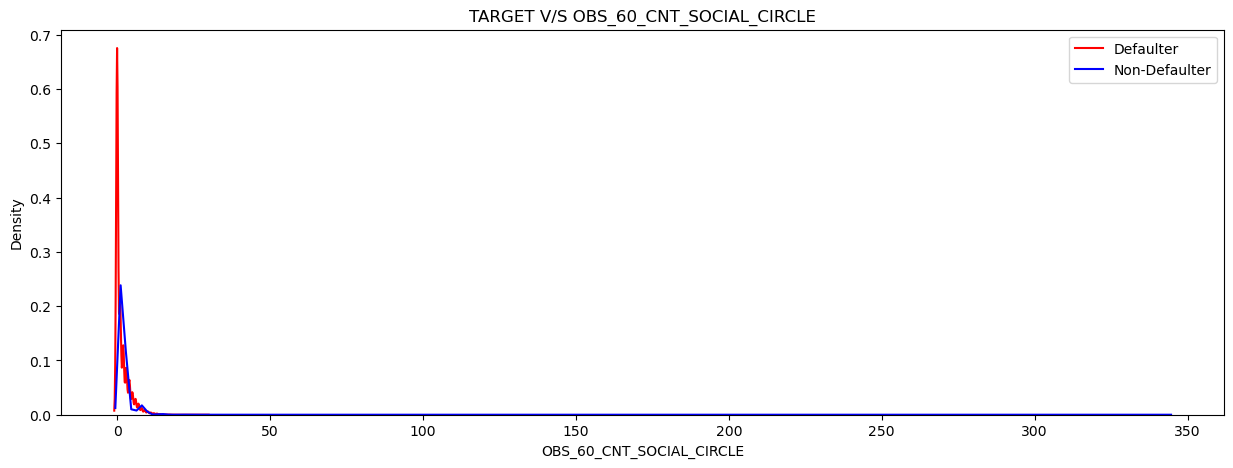

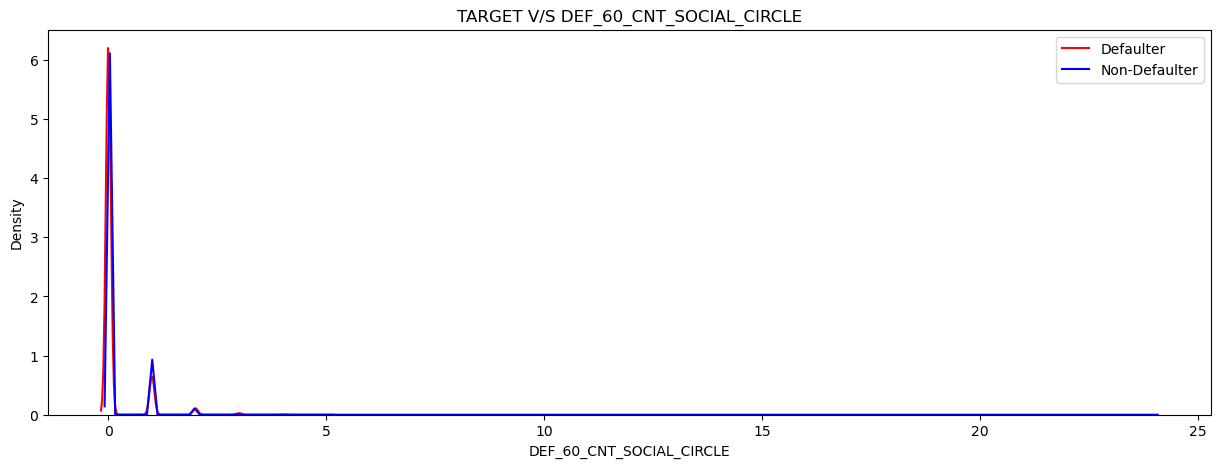

In [52]:
#TARGET V/S Region Rating and Social Circle
draw_distplot(['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'])

<b>Observation:</b>Clients having region rating as 2 are most likely to default.</b>
Clients who have 0-5 people in social circle who have 30 DPD or 60 DPD are most likely to default. 

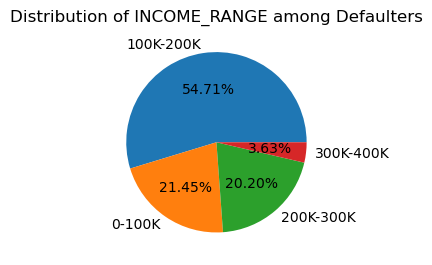

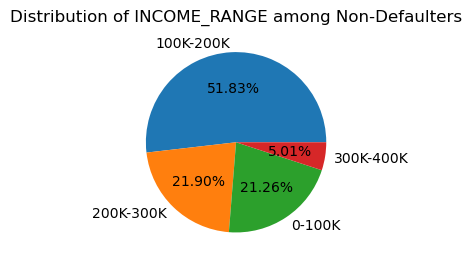

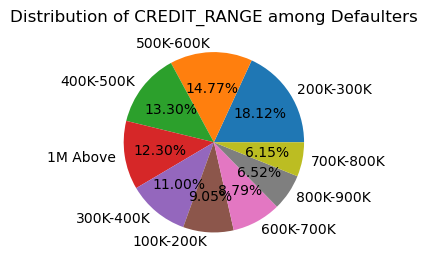

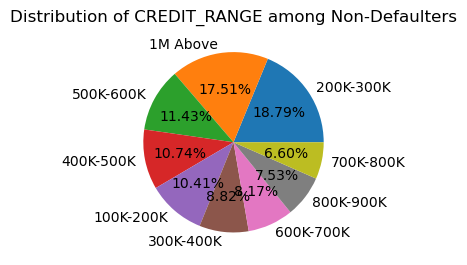

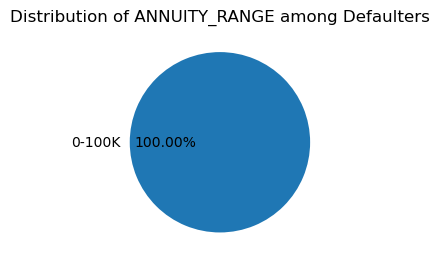

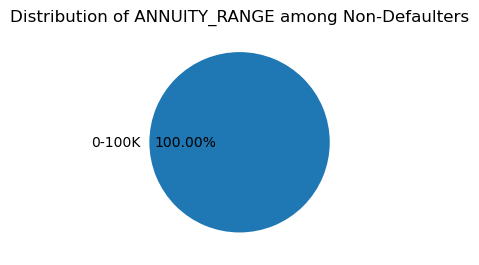

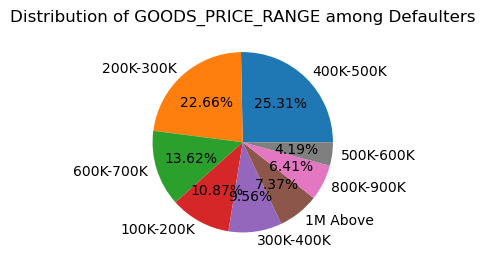

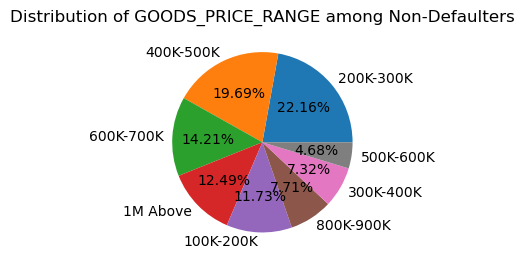

In [53]:
#TARGET V/S AMT_RANGE_COLS
amt_range_cols = ["INCOME_RANGE","CREDIT_RANGE","ANNUITY_RANGE","GOODS_PRICE_RANGE"]
draw_piechart(amt_range_cols)

<b>Observation:</b> Clients having either of the following are more likely to default,</br> 
Income range 100K-200K</br>
Credit range 200K-300K </br>
Goods Price range 400K-500K</br>
<b>Note:</b> ANNUITY_RANGE is showing 100% for 0-100K as other values have percentage less than 3%. For better readability of charts, the function is considering values > 3% for generating pie charts.</br>
<b>Insights:</b> INCOME_RANGE can be considered a strong driver. Higher the income, lesser the percentage of defaulters.

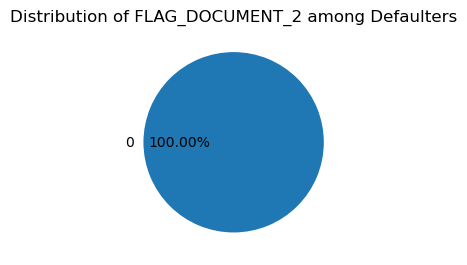

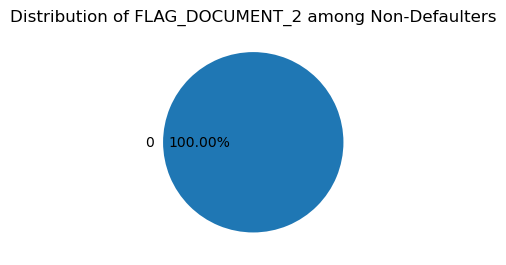

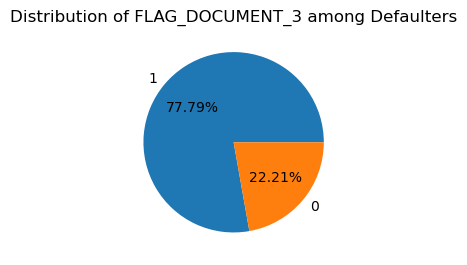

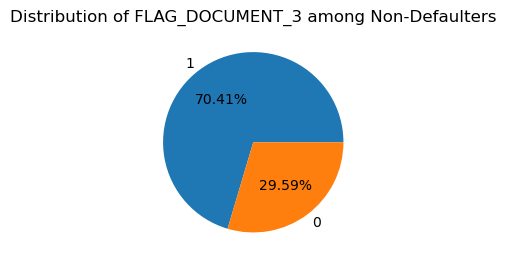

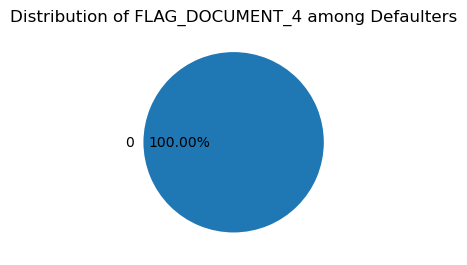

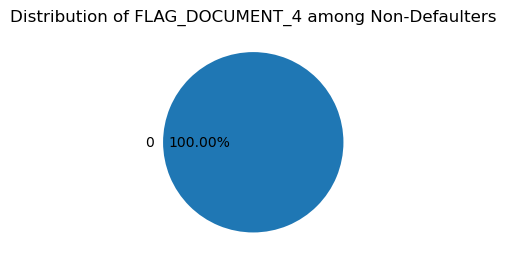

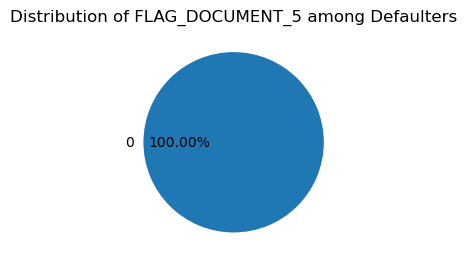

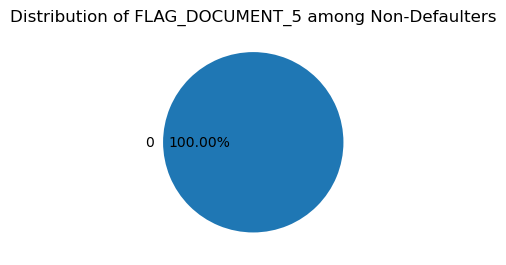

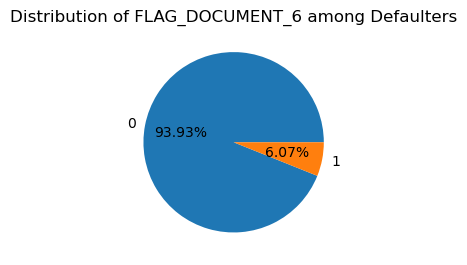

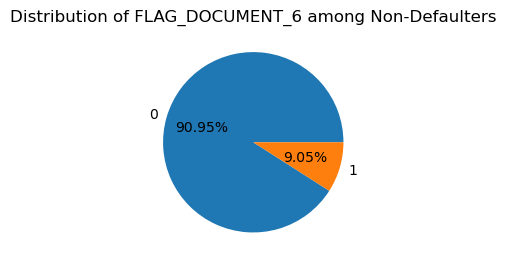

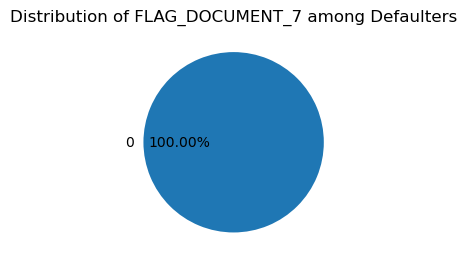

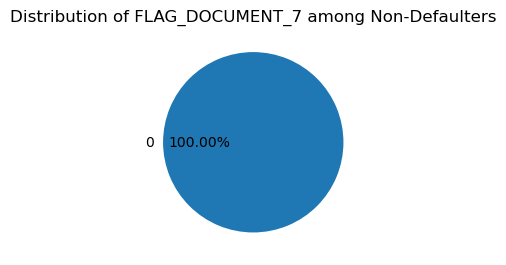

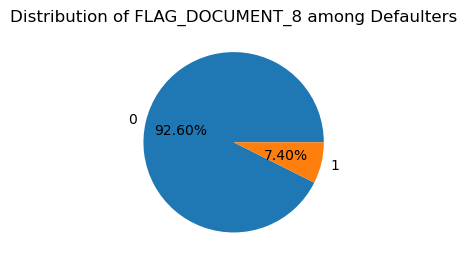

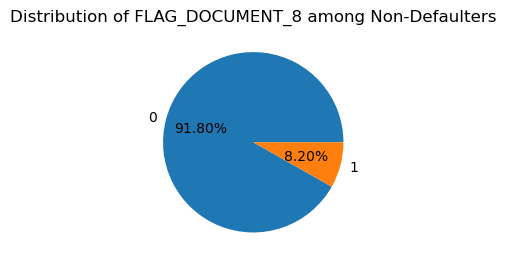

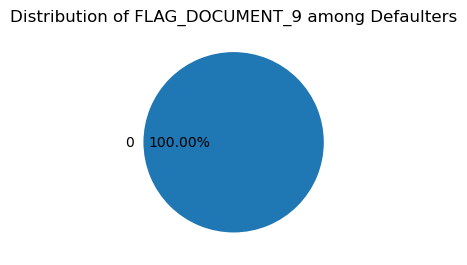

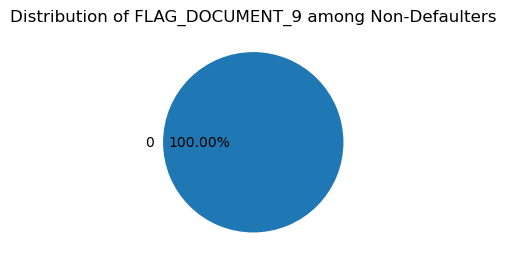

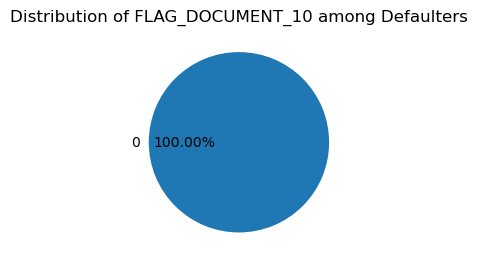

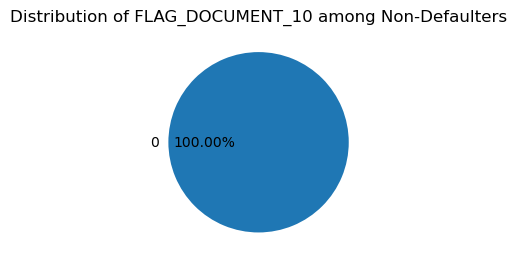

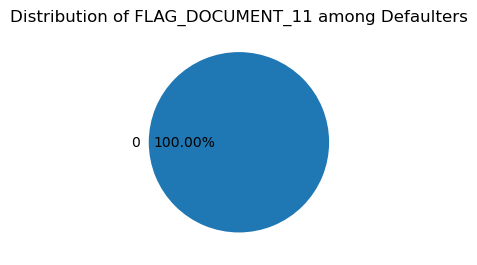

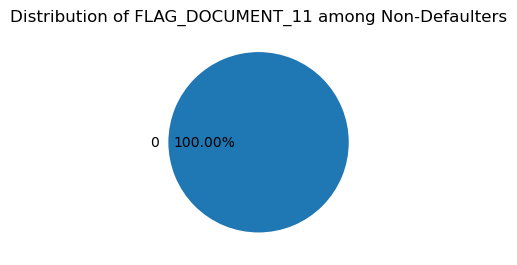

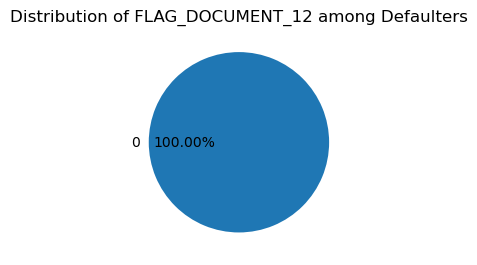

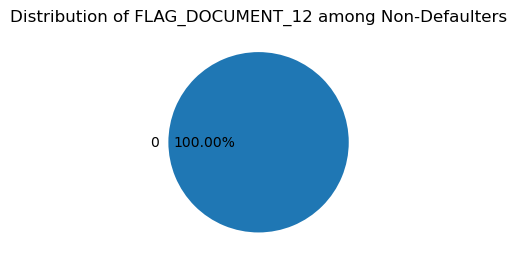

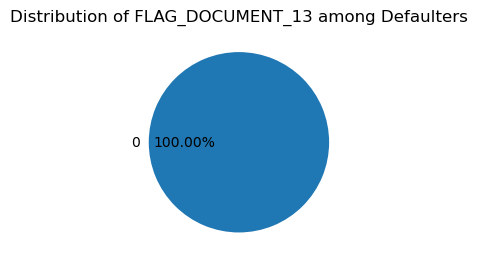

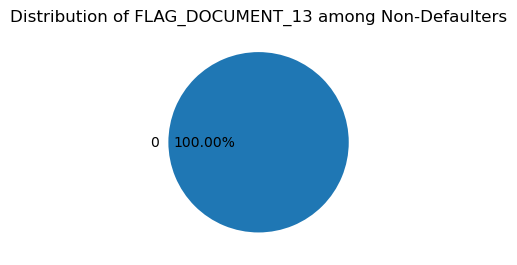

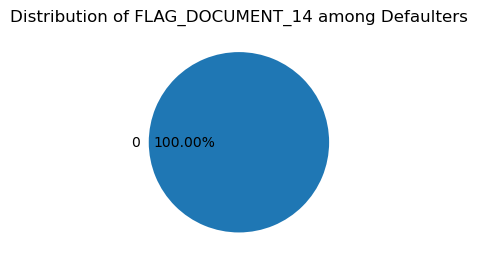

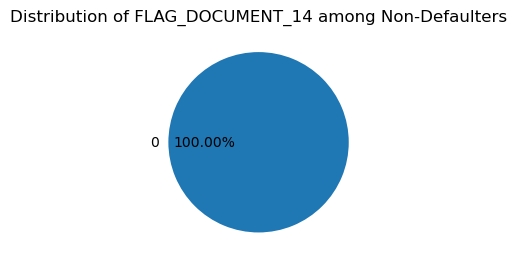

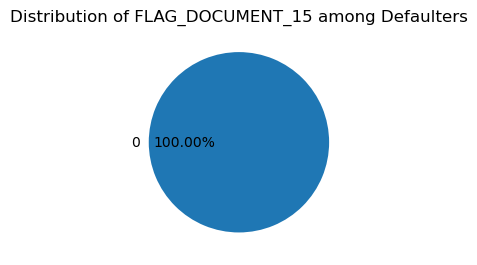

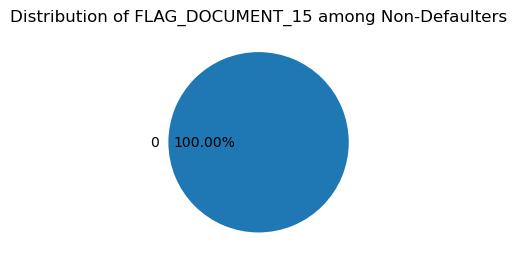

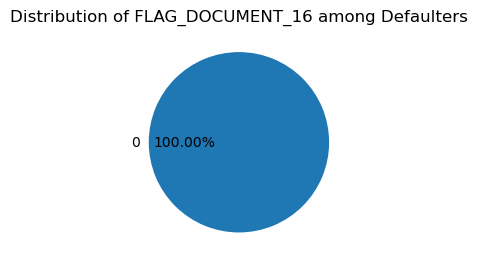

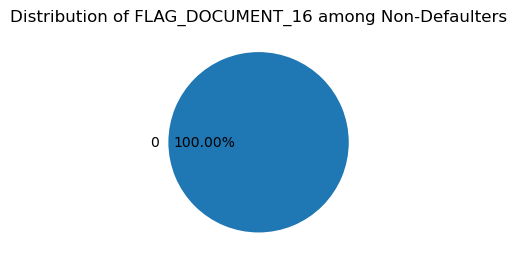

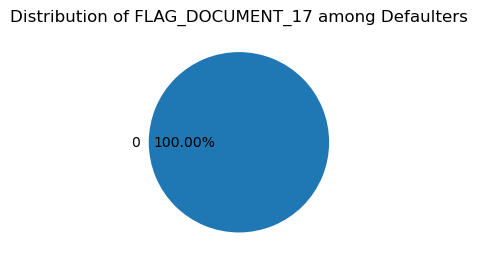

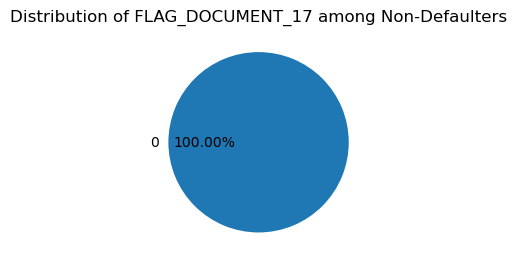

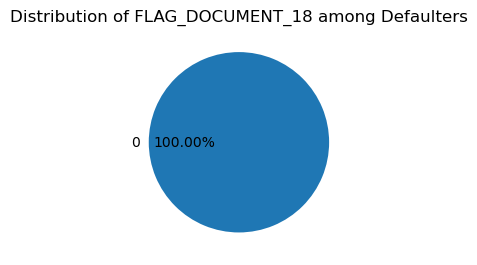

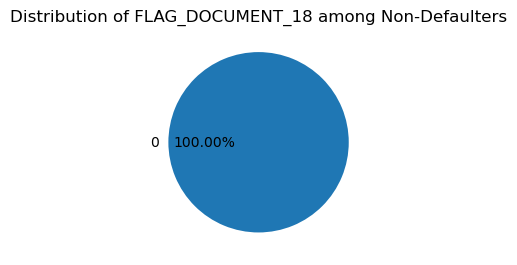

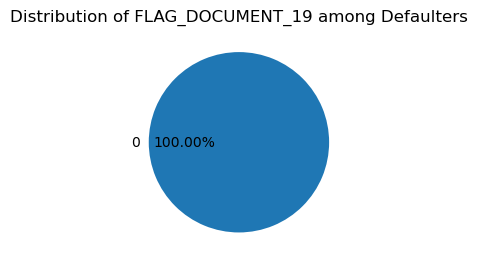

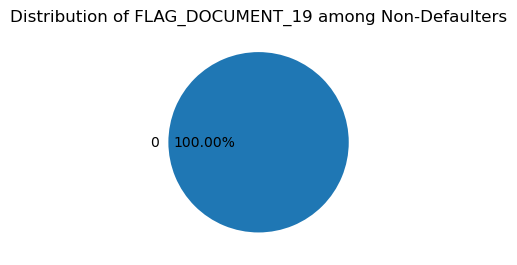

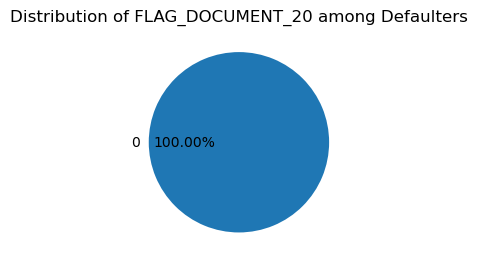

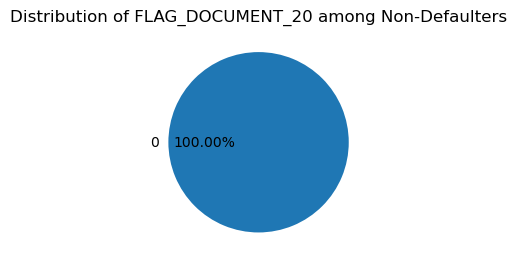

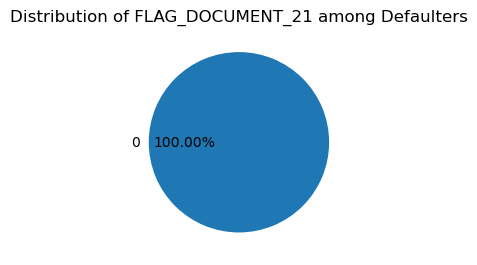

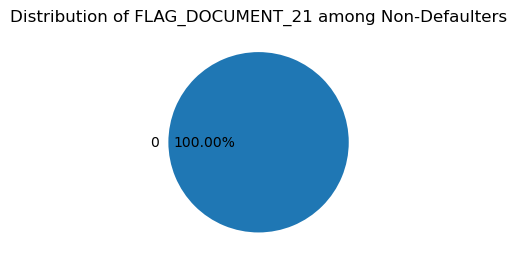

In [54]:
#TARGET V/S FLAG_DOCUMENT COLUMNS
flag_doc_cols = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
          'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
draw_piechart(flag_doc_cols)

#0 means flag_document was not submitted and 1 means flag document was submitted

<b>Observation:</b> Clients who submit FLAG_DOCUMENT3 are more likely to default.

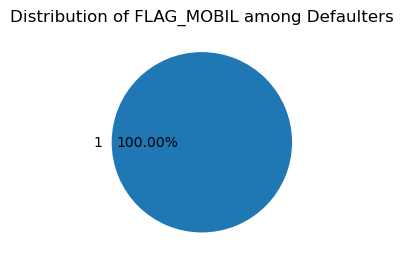

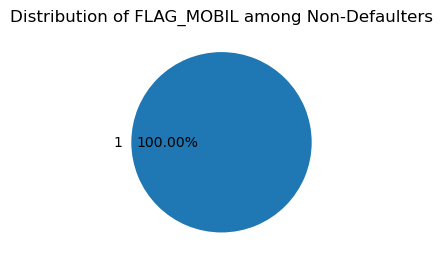

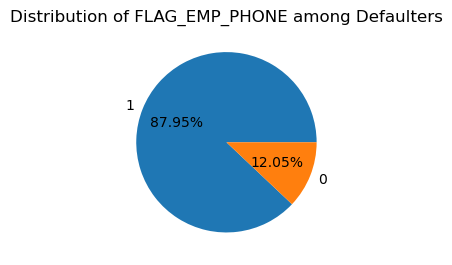

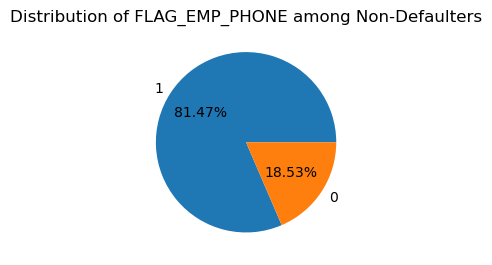

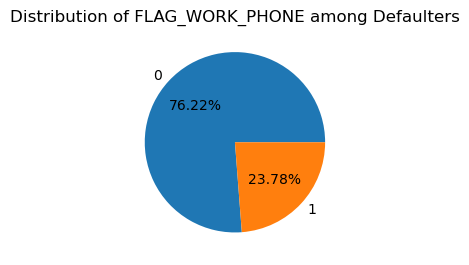

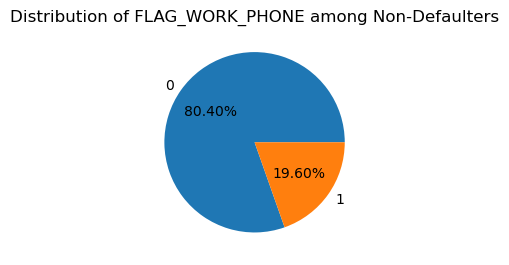

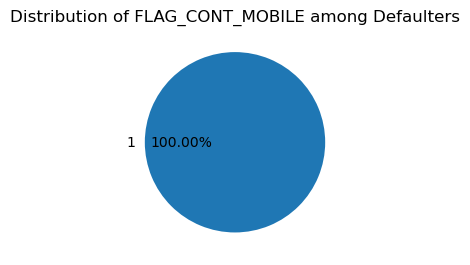

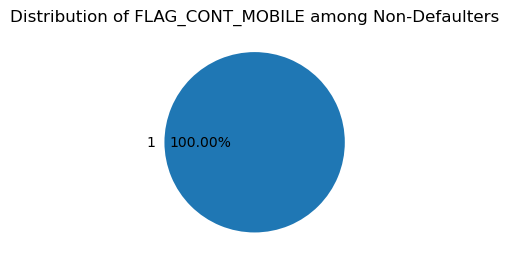

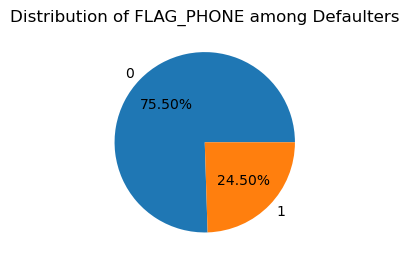

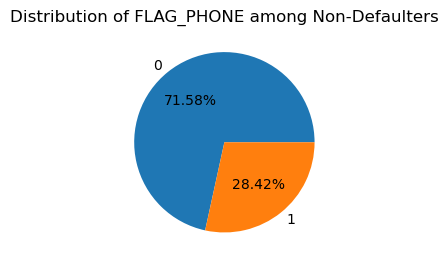

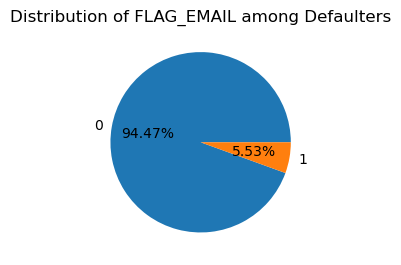

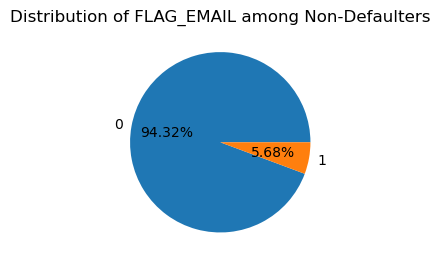

In [55]:
#TARGET V/S FLAG_CONTACT COLUMNS
flag_cont_cols = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
draw_piechart(flag_cont_cols)
#0 means that contact information was not provided for the category, 1 means contact information was provided for the category

<b>Observation:</b> Clients who provide FLAG_MOBIL or FLAG_EMP_PHONE or FLAG_CONT_MOBILE are more likely to default.

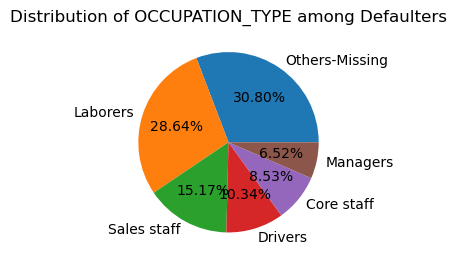

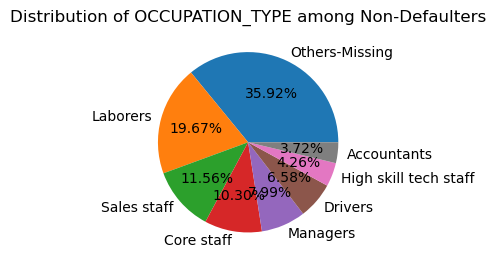

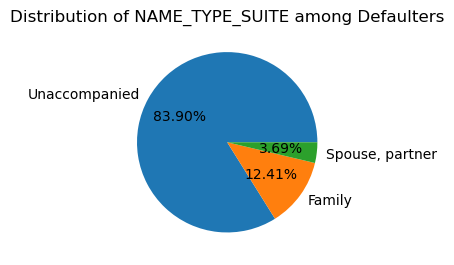

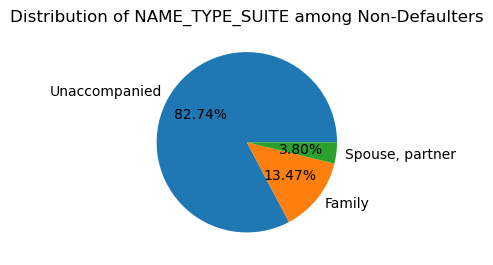

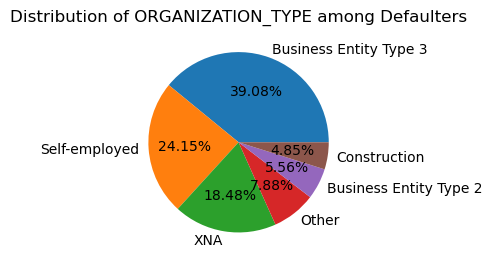

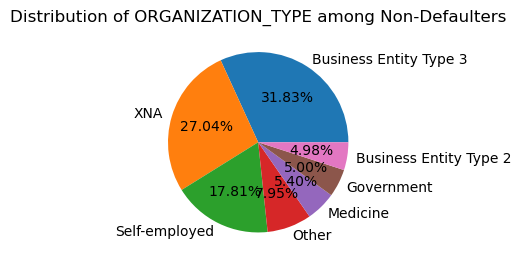

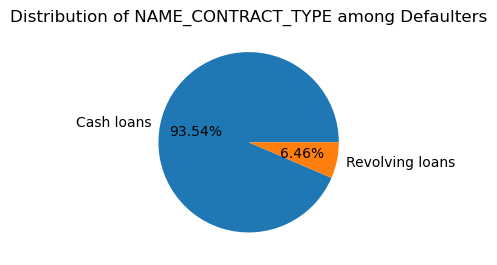

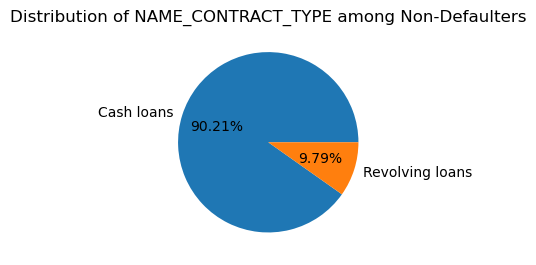

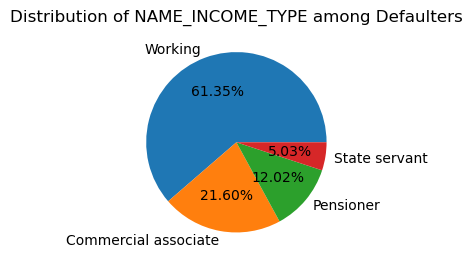

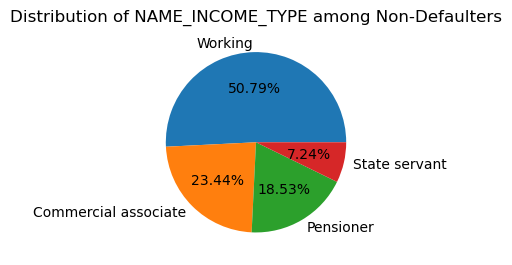

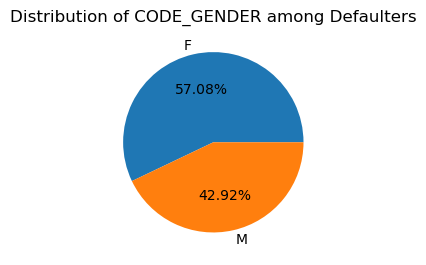

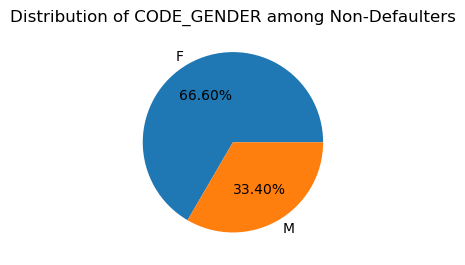

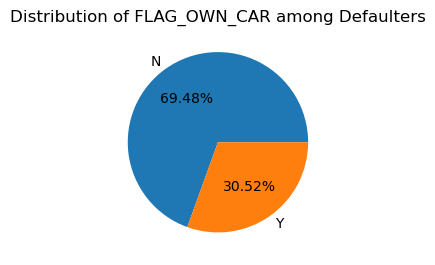

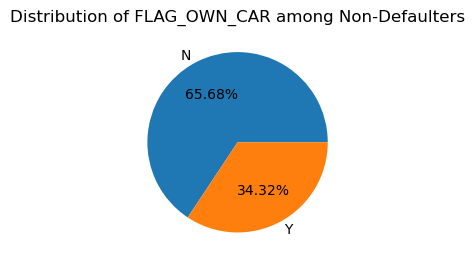

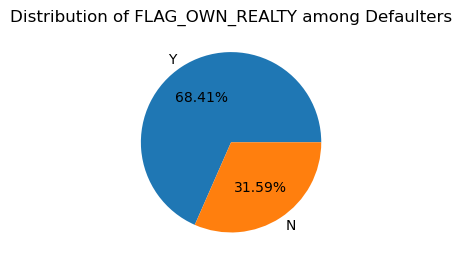

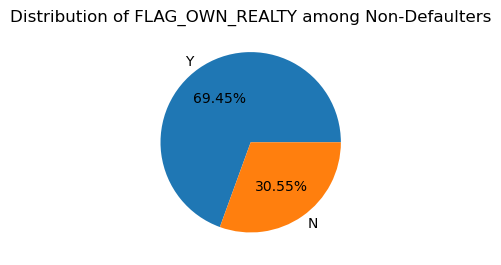

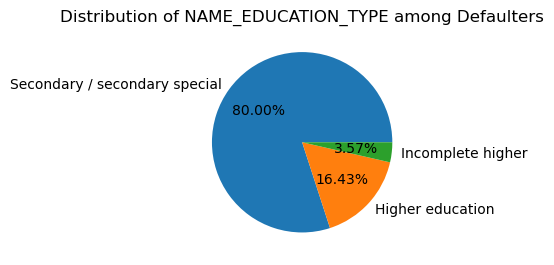

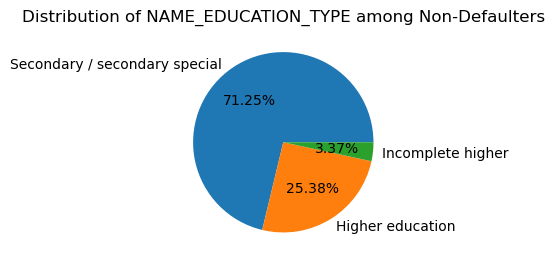

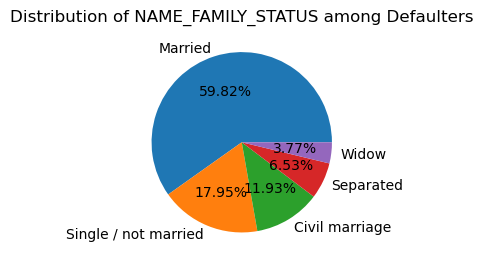

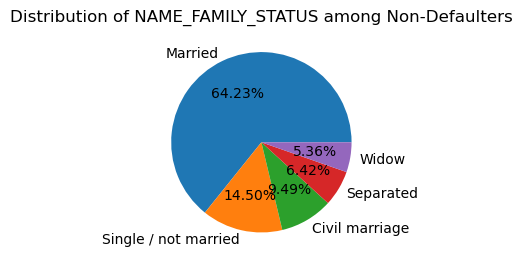

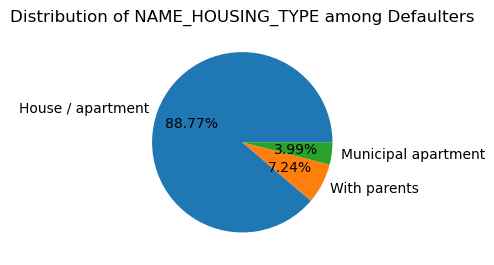

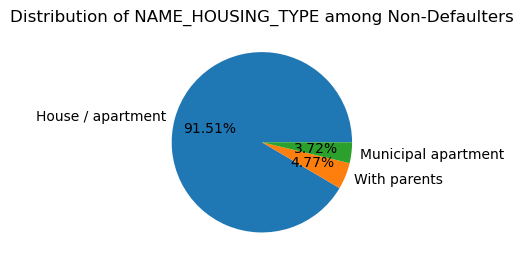

In [56]:
#TARGET V/S OCCUPATION_TYPE, NAME_TYPE_SUITE, ORGANIZATION_TYPE, NAME_CONTRACT_TYPE, NAME_INCOME_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE
draw_piechart(['OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])
#For CODE_GENDER, F means client is Female, M means client is Male
#For FLAG_OWN_REALTY, N means client doesn't own realty, Y means client owns realty
#For FLAG_OWN_CAR, N means client doesn't own car, Y means client owns car

<b>Observation:</b> Clients who belong to the following categories of attributes are more likely to default: </br>
- OCCUPATION_TYPE: Laborers</br>
- NAME_TYPE_SUITE: Who come unaccompanied </br>
- ORGANIZATION_TYPE: Who are employed as per Business Entity Type3 category</br>
- NAME_CONTRACT_TYPE: Taken a cash loan</br>
- NAME_INCOME_TYPE: Working</br>
- CODE_GENDER: Female</br>
- FLAG_OWN_CAR: Don't own a car</br>
- FLAG_OWN_REALTY: Own realty</br>
- NAME_EDUCATION_TYPE: Secondary / secondary special education</br>
- NAME_FAMILY_STATUS: Married</br>
- NAME_HOUSING_TYPE: Live in House/apartment</br>

<b> 4.2 Bivariate Analysis </b>

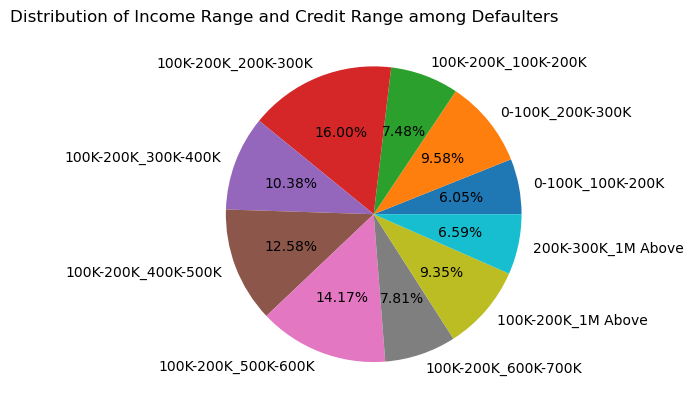

In [57]:
temp = appdata1.groupby(by = ["INCOME_RANGE","CREDIT_RANGE"])['TARGET'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x.INCOME_RANGE) + '_' + str(x.CREDIT_RANGE), axis=1)
temp = temp[temp["TARGET"]*100/temp["TARGET"].sum() > 3.5] #Percentage cutoff - 4.5%
plt.pie(temp["TARGET"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Income Range and Credit Range among Defaulters',loc='right')
plt.show()

<b>Observation: </b> Clients having INCOME_RANGE 100K-200K and credit range 200K-300K are most likely to default.</br>
<b>Insights: </b>As most of the defaulters have income range 100K-200K with varying credit ranges, we can say that INCOME_RANGE is strong driver and clients having income range 100K-200K are most likely to default.

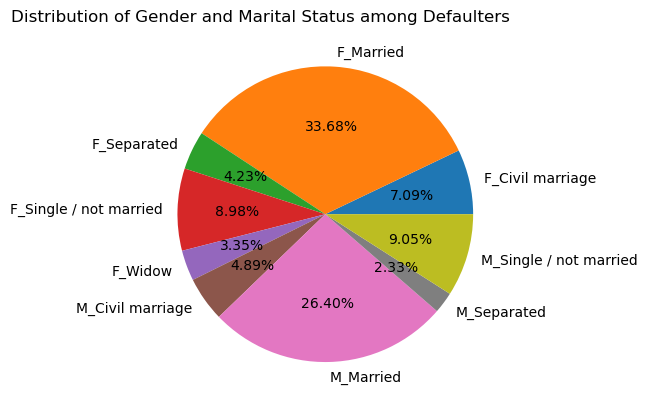

In [58]:
temp = appdata1.groupby(by = ["CODE_GENDER","NAME_FAMILY_STATUS"])['TARGET'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x.CODE_GENDER) + '_' + str(x.NAME_FAMILY_STATUS), axis=1)
temp = temp[temp["TARGET"]*100/temp["TARGET"].sum() > 2] #Percentage cutoff - 2%
plt.pie(temp["TARGET"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Gender and Marital Status among Defaulters',loc='right')
plt.show()

<b>Observation: </b> Females who are married are most likely to defaulter followed by Males who are married.</br>
<b>Insights : </b> As almost 60% of the defaulters are married, we can consider marital status as a strong driver. 

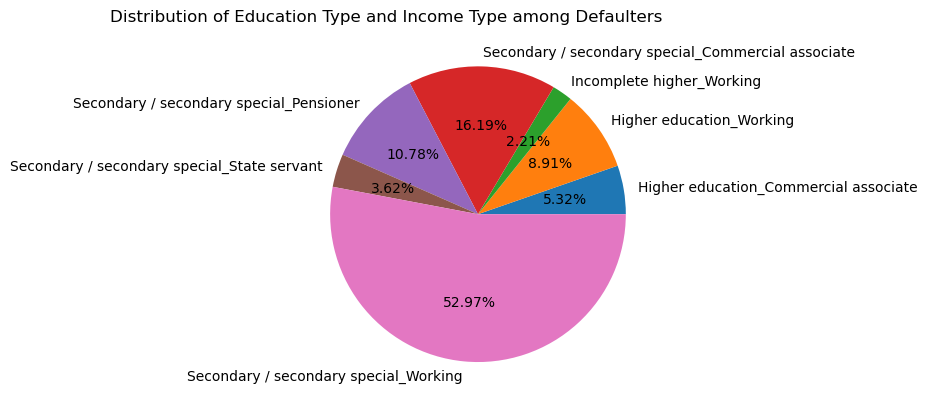

In [59]:
temp = appdata1.groupby(by = ["NAME_EDUCATION_TYPE","NAME_INCOME_TYPE"])['TARGET'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x.NAME_EDUCATION_TYPE) + '_' + str(x.NAME_INCOME_TYPE), axis=1)
temp = temp[temp["TARGET"]*100/temp["TARGET"].sum() > 2] #Percentage cutoff - 2%
plt.pie(temp["TARGET"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Education Type and Income Type among Defaulters',loc='right')
plt.show()

<b>Observation: </b> Client who have secondary/secondary special education and are working are most likely to default.

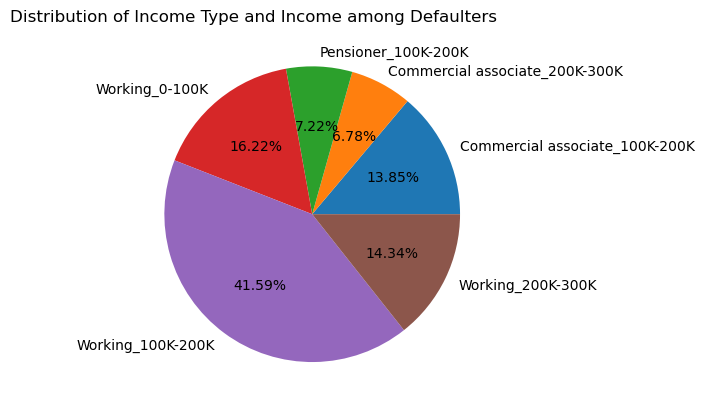

In [60]:
temp = appdata1.groupby(by = ["NAME_INCOME_TYPE","INCOME_RANGE"])['TARGET'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x.NAME_INCOME_TYPE) + '_' + str(x.INCOME_RANGE), axis=1)
temp = temp[temp["TARGET"]*100/temp["TARGET"].sum() > 5] #Percentage cutoff - 5%
plt.pie(temp["TARGET"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Income Type and Income among Defaulters',loc='right')
plt.show()

<b>Observation: </b>Clients who are working and having income range 100K-200K are most likely to default.</br>
<b>Insights: </b>As around 70% of defaulters are from working income type, we can consider it a strong driver.

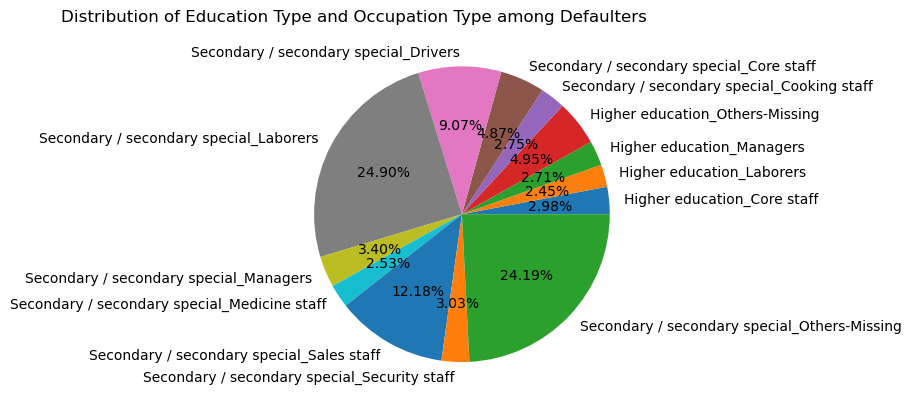

In [61]:
temp = appdata1.groupby(by = ["NAME_EDUCATION_TYPE","OCCUPATION_TYPE"])['TARGET'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x.NAME_EDUCATION_TYPE) + '_' + str(x.OCCUPATION_TYPE), axis=1)
temp = temp[temp["TARGET"]*100/temp["TARGET"].sum() > 2] #Percentage cutoff - 2%
plt.pie(temp["TARGET"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Education Type and Occupation Type among Defaulters',loc='right')
plt.show()

<b>Observation: </b>Clients who are having secondary/secondary special education and occupation as Laborers are more likely to default.</br>
<b>Insights: </b>As percentage of occupation type is varied, it cannot be considered as a strong driver.

<b>4.3 MultiVariate Analysis</b>

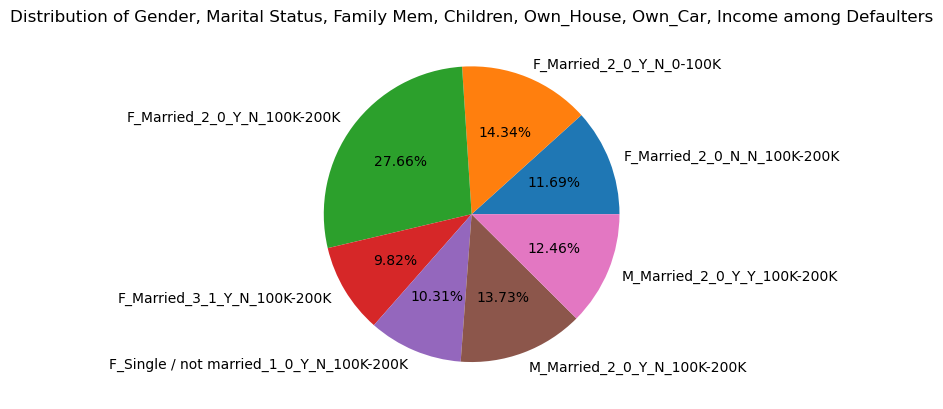

In [62]:
temp = appdata1.groupby(by = ["CODE_GENDER","NAME_FAMILY_STATUS","CNT_FAM_MEMBERS","CNT_CHILDREN","FLAG_OWN_REALTY","FLAG_OWN_CAR","INCOME_RANGE"])['TARGET'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x.CODE_GENDER) + '_' + str(x.NAME_FAMILY_STATUS) + '_' + str(x.CNT_FAM_MEMBERS)+ '_' + str(x.CNT_CHILDREN)+ '_' + str(x.FLAG_OWN_REALTY)+ '_' + str(x.FLAG_OWN_CAR) + '_' + str(x.INCOME_RANGE), axis=1)
temp = temp[temp["TARGET"]*100/temp["TARGET"].sum() > 2]
plt.pie(temp["TARGET"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Gender, Marital Status, Family Mem, Children, Own_House, Own_Car, Income among Defaulters',loc='center')
plt.show()

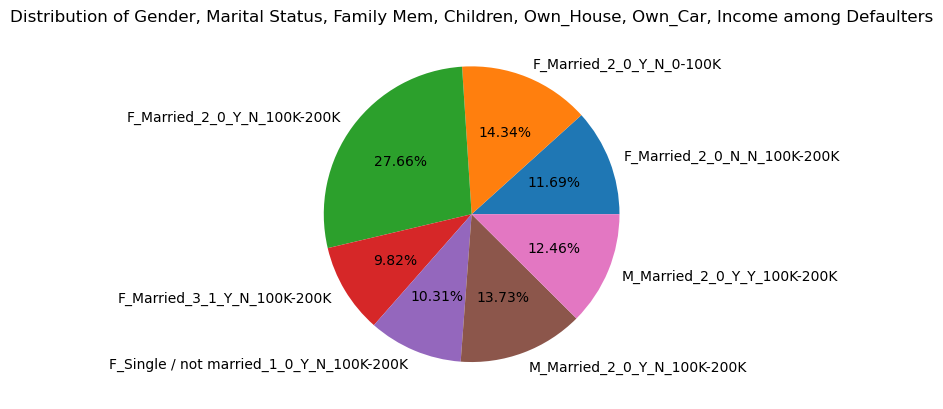

In [63]:
temp = appdata1.groupby(by = ["CODE_GENDER","NAME_FAMILY_STATUS","CNT_FAM_MEMBERS","CNT_CHILDREN","FLAG_OWN_REALTY","FLAG_OWN_CAR","INCOME_RANGE"])['TARGET'].sum().reset_index()
temp["CATEGORY"] = temp.apply(lambda x: str(x.CODE_GENDER) + '_' + str(x.NAME_FAMILY_STATUS) + '_' + str(x.CNT_FAM_MEMBERS)+ '_' + str(x.CNT_CHILDREN)+ '_' + str(x.FLAG_OWN_REALTY)+ '_' + str(x.FLAG_OWN_CAR) + '_' + str(x.INCOME_RANGE), axis=1)
temp = temp[temp["TARGET"]*100/temp["TARGET"].sum() > 2]
plt.pie(temp["TARGET"],labels=temp["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Gender, Marital Status, Family Mem, Children, Own_House, Own_Car, Income among Defaulters',loc='center')
plt.show()

<b>Observation:</b> Females who are married have no children, own a property, and income range is 100K-200K are most likely to default.

<AxesSubplot:>

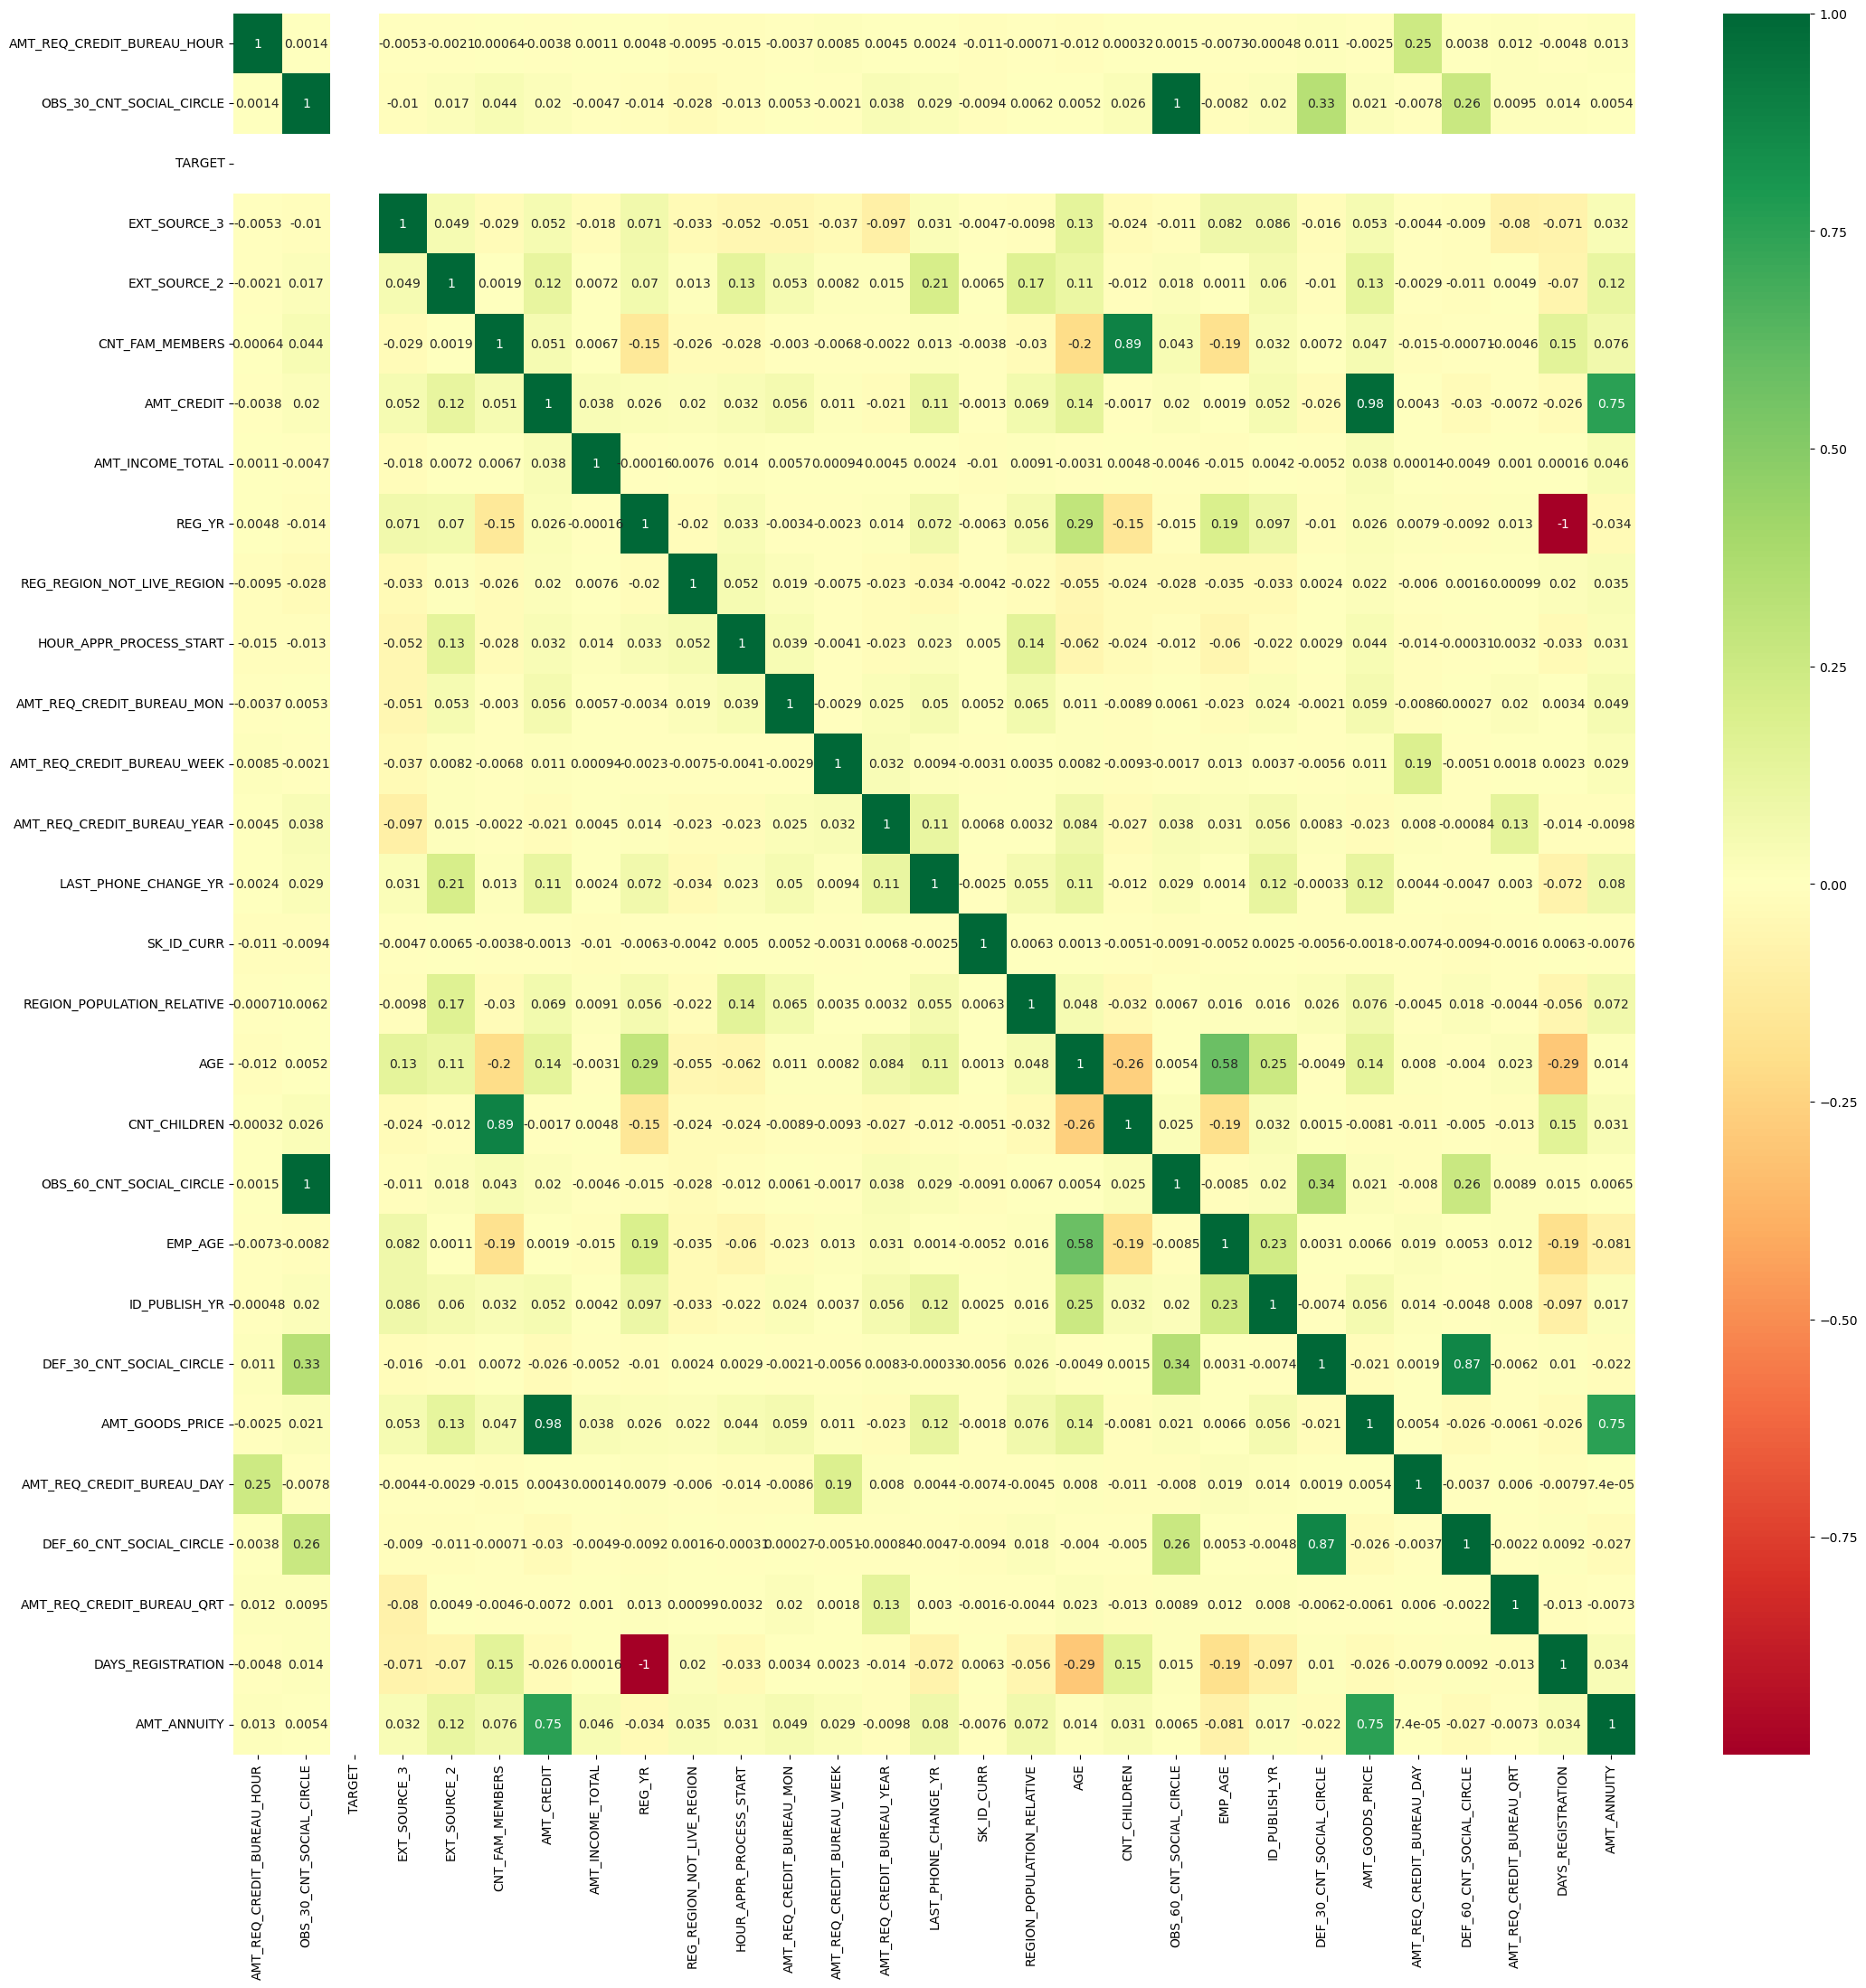

In [64]:
defaulterappcorr = defaulterapp[cont_app]
res = defaulterappcorr.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(res, annot=True, ax=ax, cmap='RdYlGn')

<AxesSubplot:>

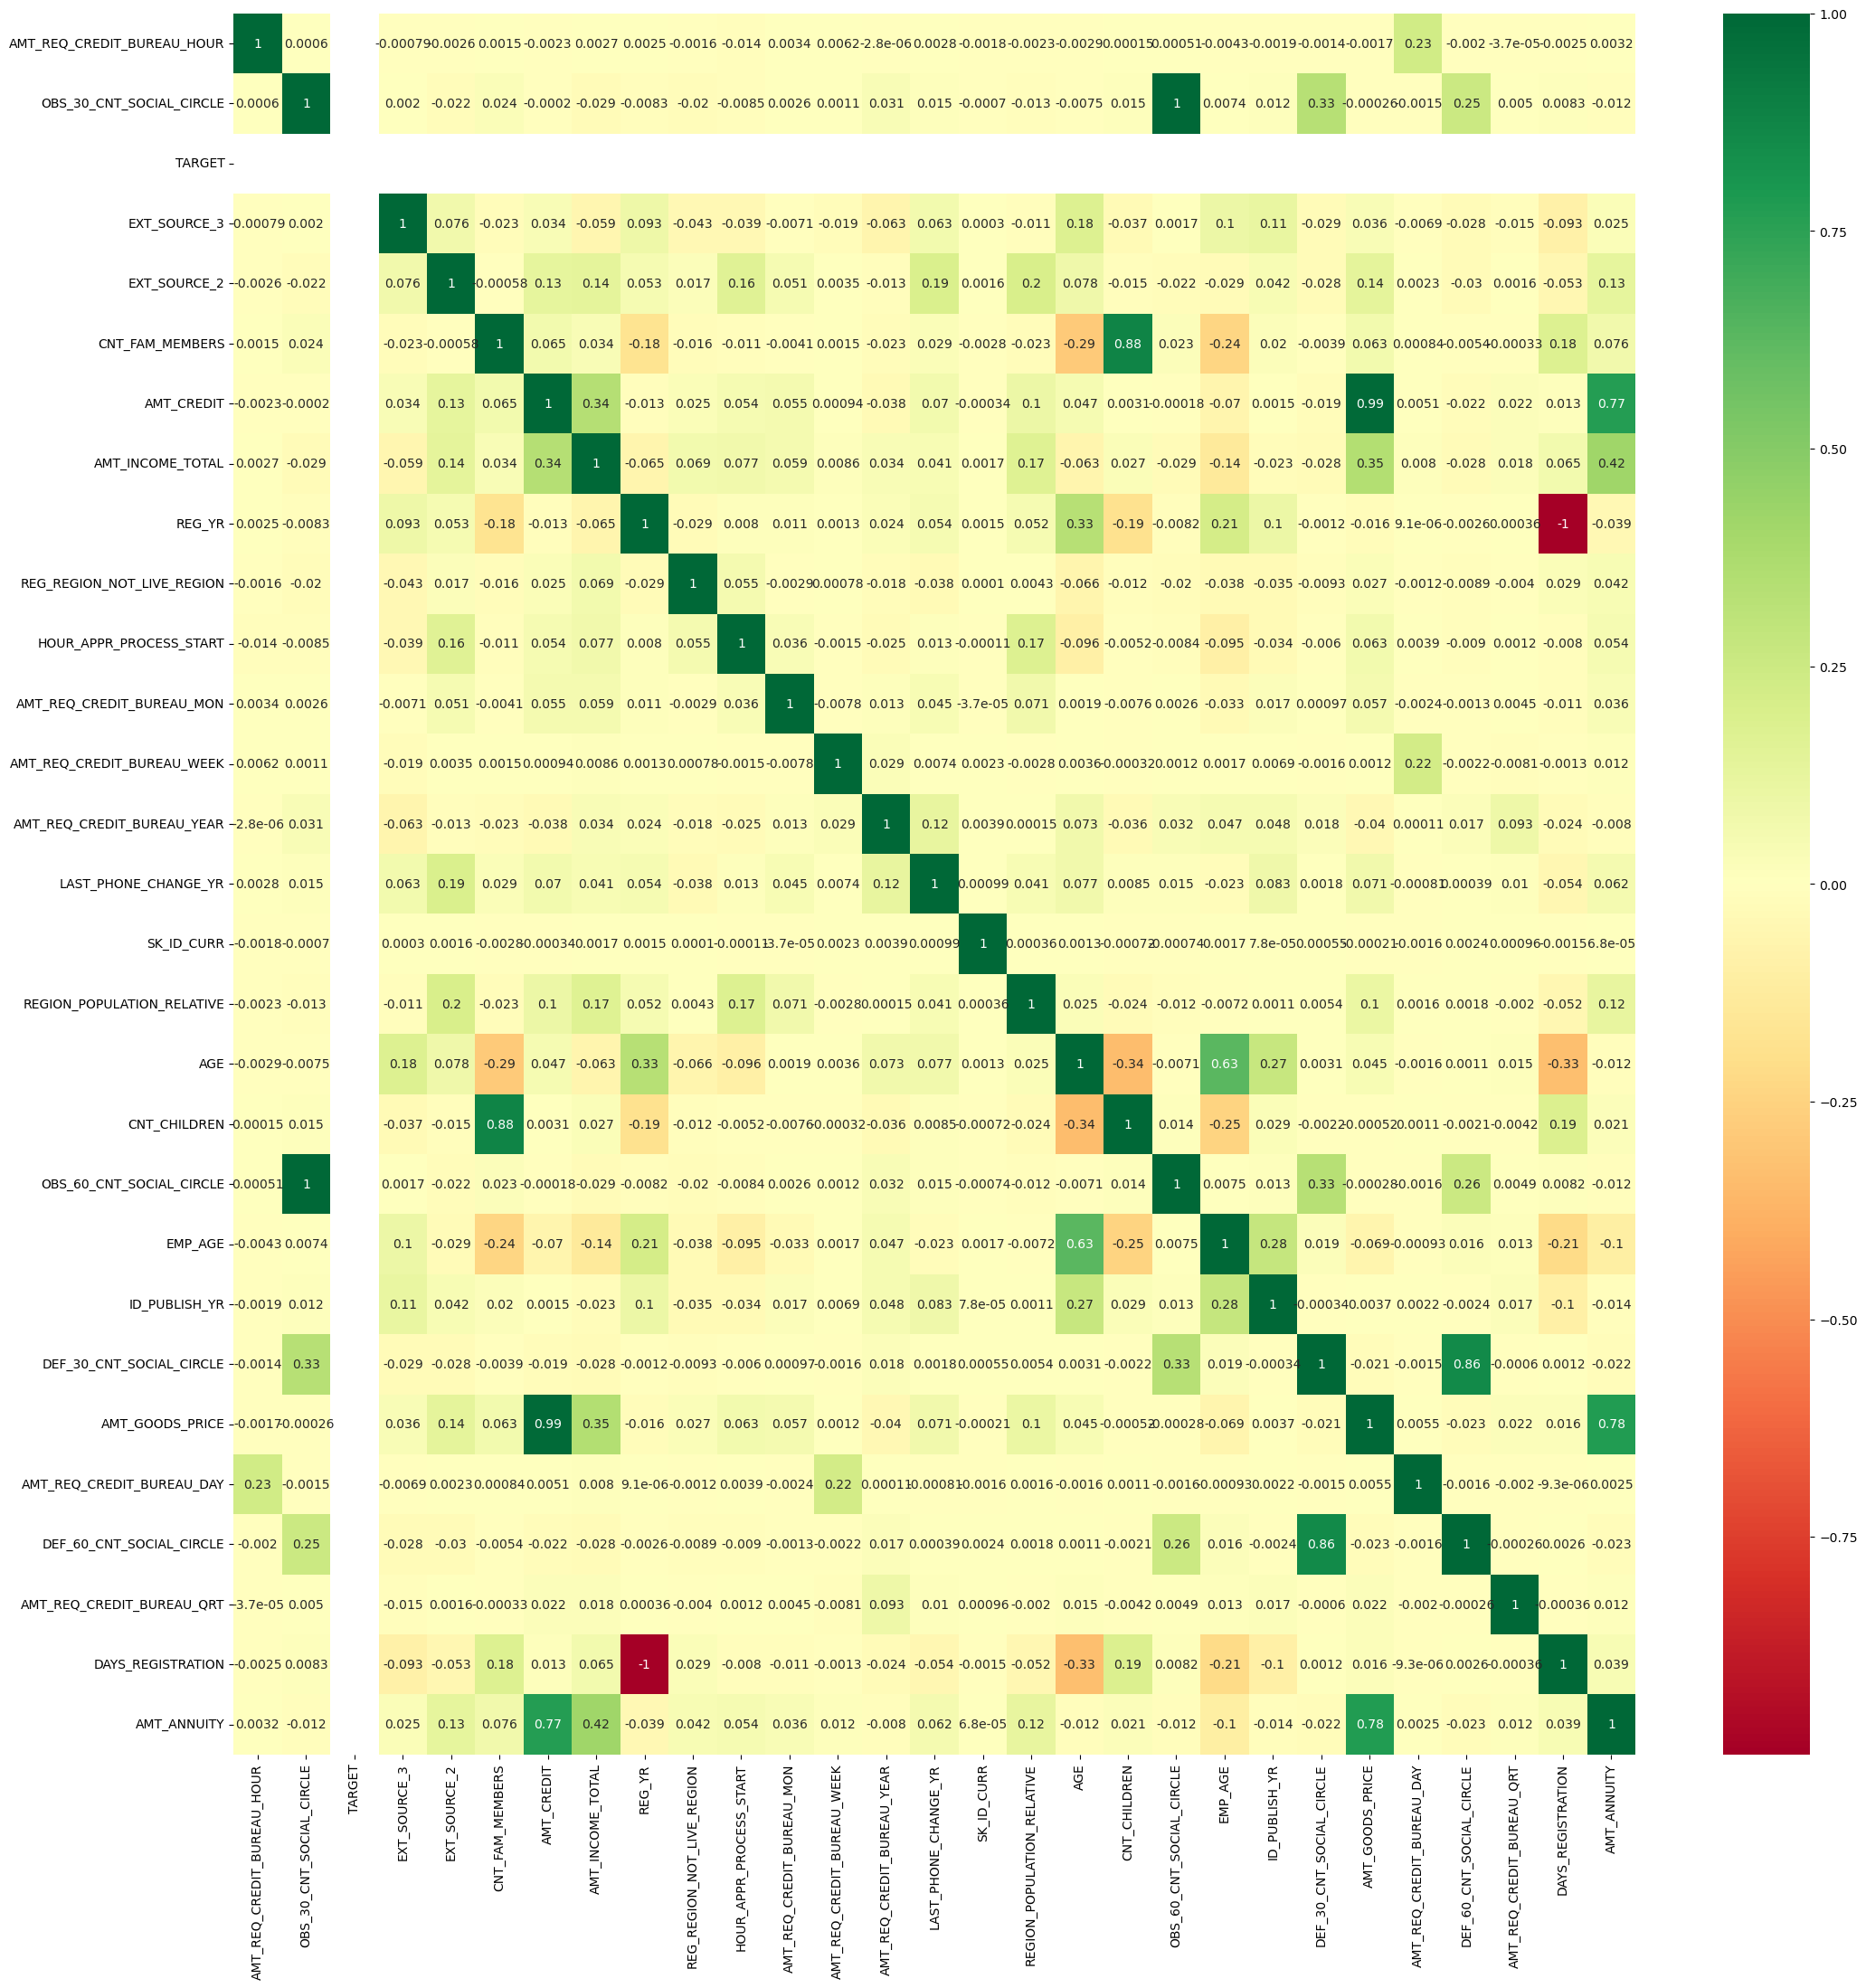

In [65]:
nondefaulterappcorr = nondefaulterapp[cont_app]
res1 = nondefaulterappcorr.corr()
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(res1, annot=True, ax=ax, cmap='RdYlGn')

In [66]:
unsorted_corr = defaulterappcorr.corr().abs()
unsorted_corr1 = unsorted_corr.unstack()
sorted_corr = unsorted_corr1.sort_values(ascending=False)
sorted_corr.head(60)

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_HOUR    1.000000
SK_ID_CURR                  SK_ID_CURR                    1.000000
EXT_SOURCE_2                EXT_SOURCE_2                  1.000000
CNT_FAM_MEMBERS             CNT_FAM_MEMBERS               1.000000
AMT_CREDIT                  AMT_CREDIT                    1.000000
AMT_INCOME_TOTAL            AMT_INCOME_TOTAL              1.000000
REG_YR                      REG_YR                        1.000000
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_LIVE_REGION    1.000000
HOUR_APPR_PROCESS_START     HOUR_APPR_PROCESS_START       1.000000
AMT_REQ_CREDIT_BUREAU_MON   AMT_REQ_CREDIT_BUREAU_MON     1.000000
AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_WEEK    1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
LAST_PHONE_CHANGE_YR        LAST_PHONE_CHANGE_YR          1.000000
REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE    1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.00

In [67]:
unsorted_corr = nondefaulterappcorr.corr().abs()
unsorted_corr1 = unsorted_corr.unstack()
sorted_corr = unsorted_corr1.sort_values(ascending=False)
sorted_corr.head(60)

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_HOUR    1.000000
SK_ID_CURR                  SK_ID_CURR                    1.000000
EXT_SOURCE_2                EXT_SOURCE_2                  1.000000
CNT_FAM_MEMBERS             CNT_FAM_MEMBERS               1.000000
AMT_CREDIT                  AMT_CREDIT                    1.000000
AMT_INCOME_TOTAL            AMT_INCOME_TOTAL              1.000000
REG_YR                      REG_YR                        1.000000
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_LIVE_REGION    1.000000
HOUR_APPR_PROCESS_START     HOUR_APPR_PROCESS_START       1.000000
AMT_REQ_CREDIT_BUREAU_MON   AMT_REQ_CREDIT_BUREAU_MON     1.000000
AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_WEEK    1.000000
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
LAST_PHONE_CHANGE_YR        LAST_PHONE_CHANGE_YR          1.000000
REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE    1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.00

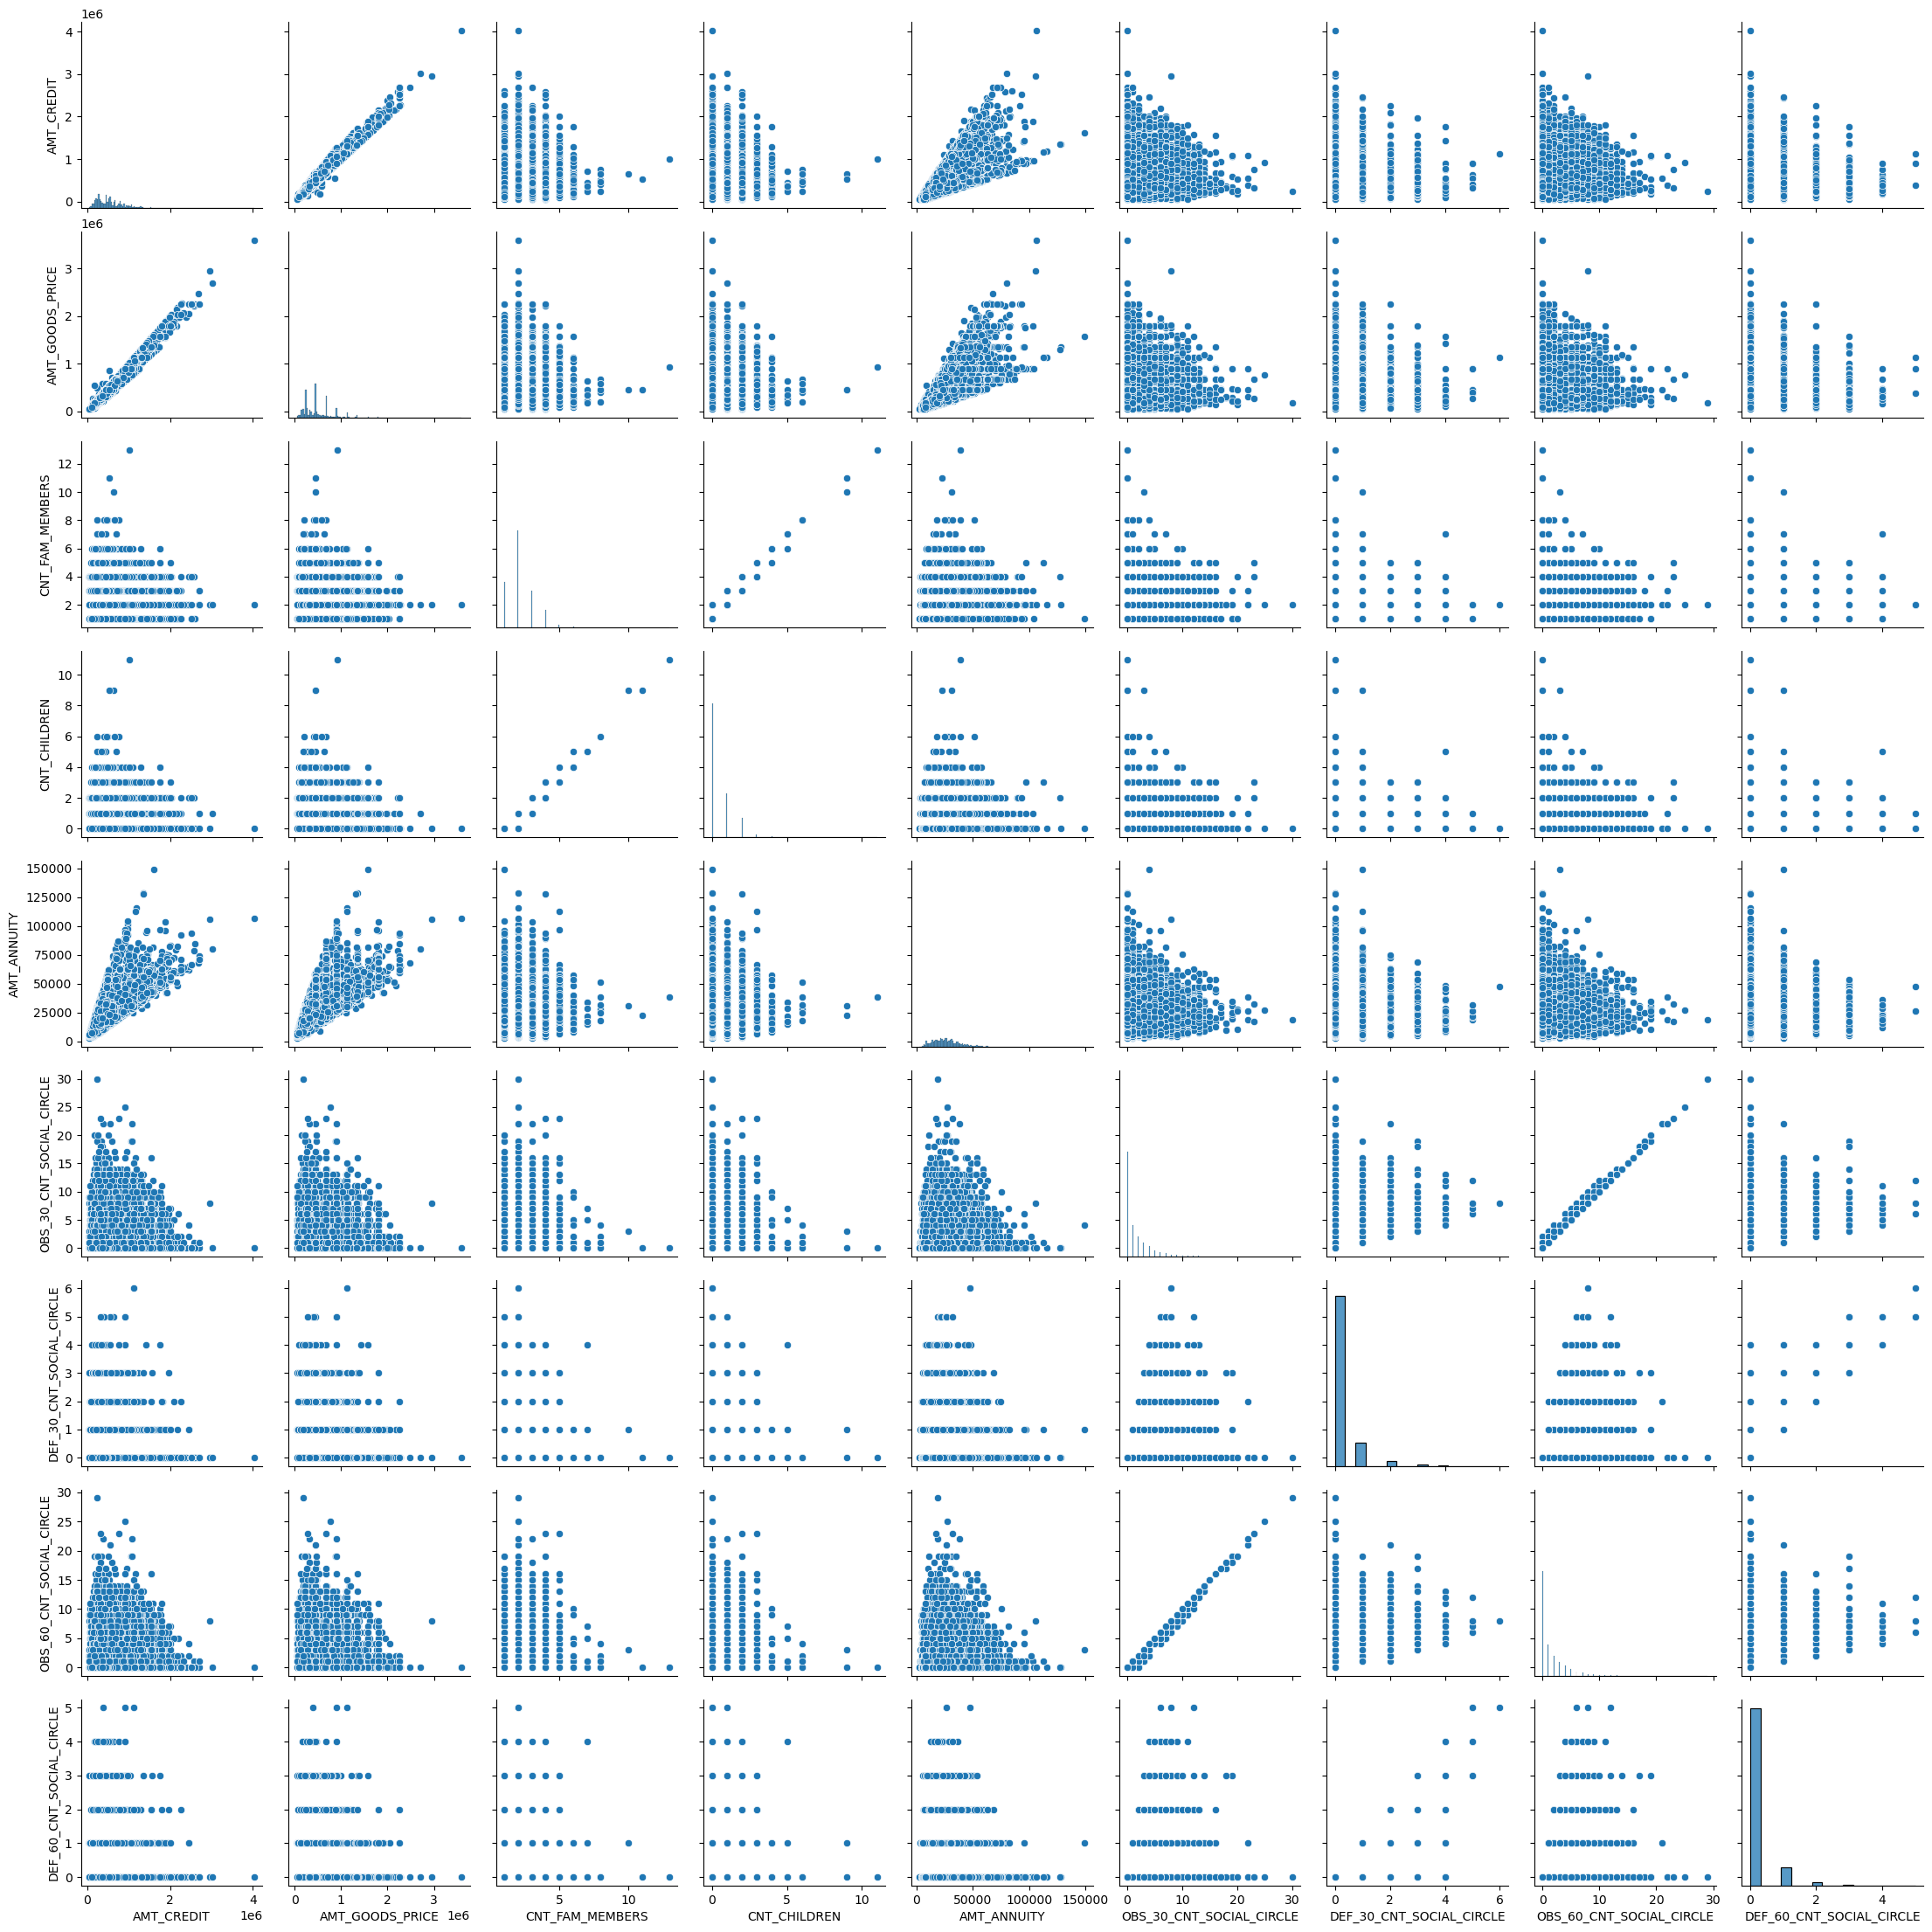

In [68]:
defaulterapptemp1 = defaulterapp[["AMT_CREDIT","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","CNT_CHILDREN","AMT_ANNUITY","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]
sns.pairplot(defaulterapptemp1)
plt.show()

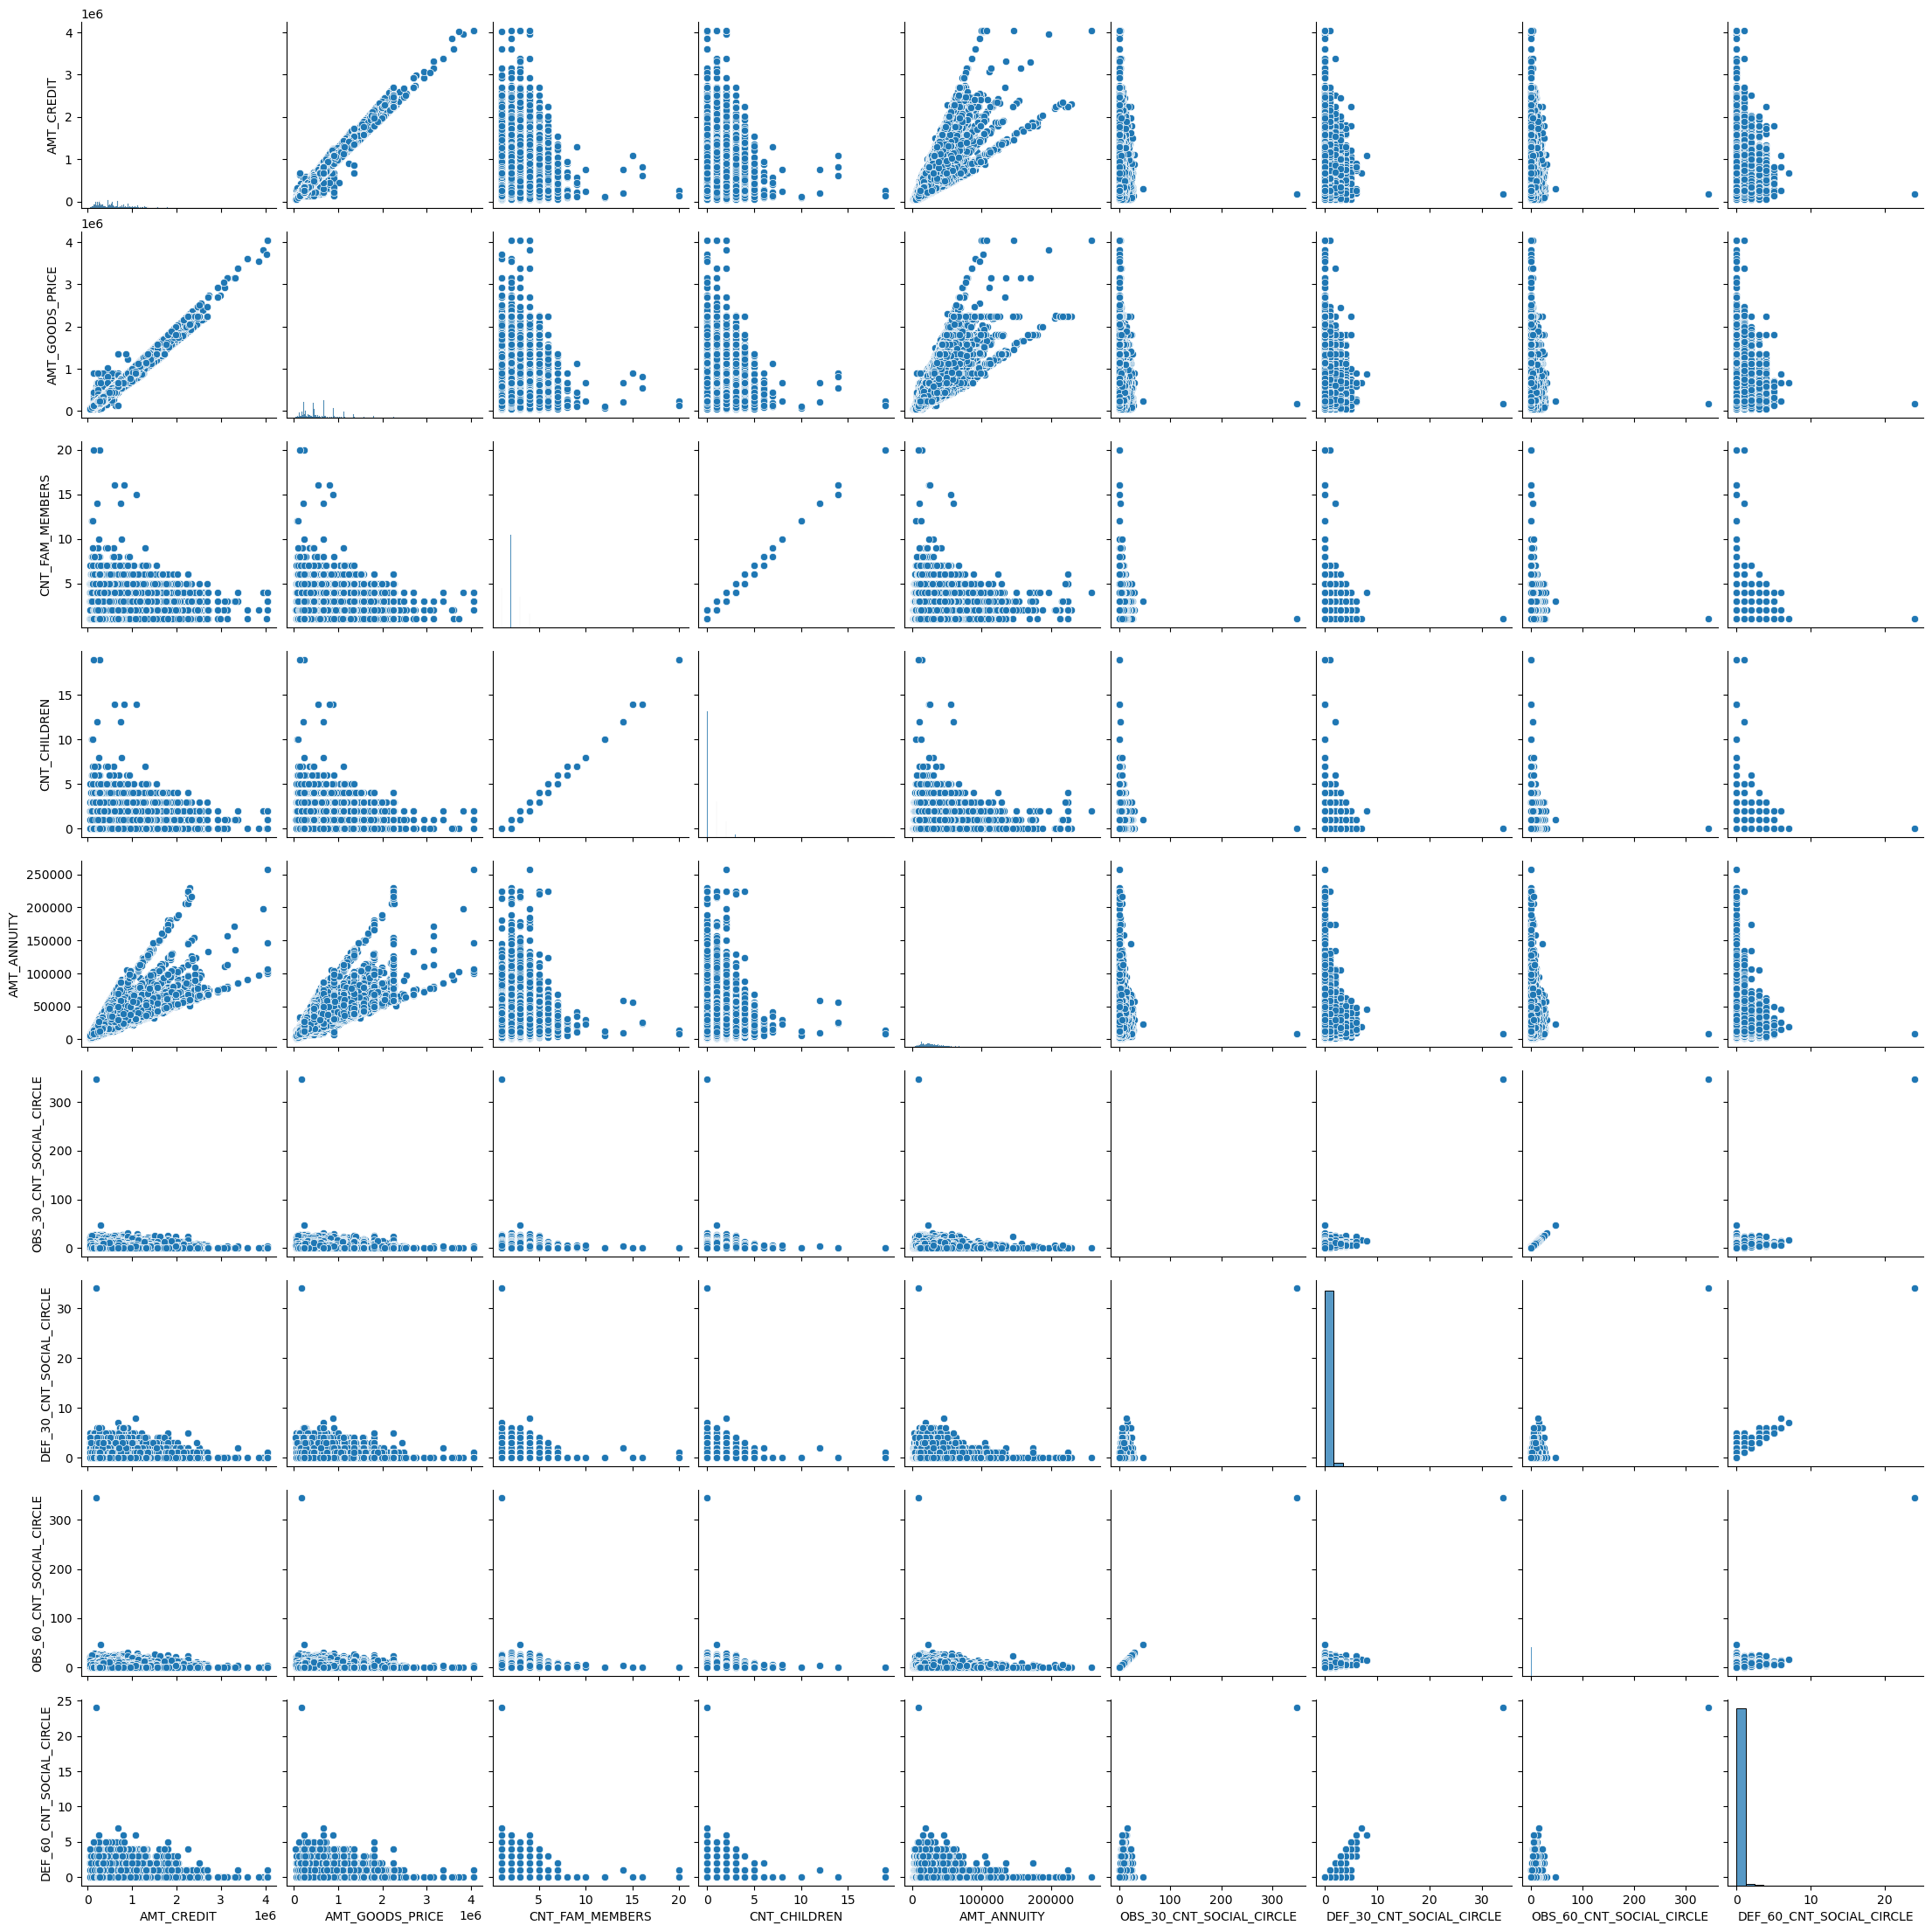

In [69]:
nondefaulterapptemp1 = nondefaulterapp[["AMT_CREDIT","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","CNT_CHILDREN","AMT_ANNUITY","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]]
sns.pairplot(nondefaulterapptemp1)
plt.show()

<b>Observation: </b> Top correlations are same for both the segmented data. (Considering columns having correlation >= 75%.)</br>
1. OBS_60_CNT_SOCIAL_CIRCLE and OBS_30_CNT_SOCIAL_CIRCLE </br>
2. AMT_CREDIT and AMT_GOODS_PRICE </br>
3. CNT_FAM_MEMBERS and CNT_CHILDREN </br>
4. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE </br>
5. AMT_GOODS_PRICE and AMT_ANNUITY </br>
6. AMT_CREDIT and AMT_ANNUITY

<AxesSubplot:>

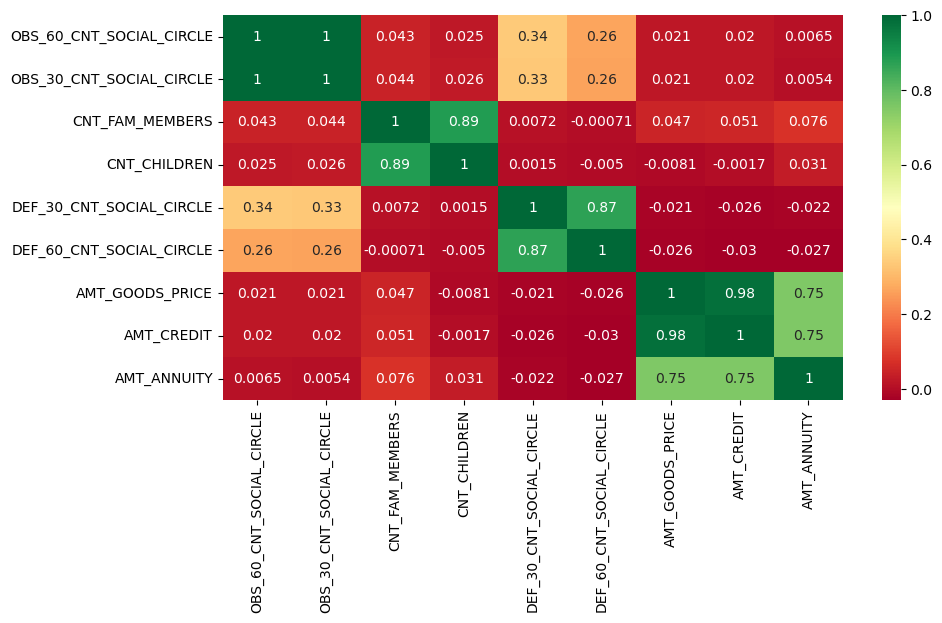

In [70]:
defaulterappcorr1 = defaulterapp[["OBS_60_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE","CNT_FAM_MEMBERS","CNT_CHILDREN","DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_GOODS_PRICE","AMT_CREDIT","AMT_ANNUITY"]]
res2 = defaulterappcorr1.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(res2, annot=True, ax=ax, cmap='RdYlGn')

### Analysis of Previous Data

In [71]:
prevdata1.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

<b>Observation:</b>Data is imbalanced. Only 11.5% data represents revolving loans, whereas other two categories have fair distribution of data.
<b>Strategy:</b>Segmentation into different categories.

In [72]:
cashloanprev = prevdata1[prevdata1.NAME_CONTRACT_TYPE=="Cash loans"]
cashloanprev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   
5    340573.5         315000.0                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   
5                       1      Everyday expenses             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   
5           -684  Cash through the bank                XAP         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   
5                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   
5  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION  DECISION_YR  
1           36       low_action     Cash X-Sell: low         0.45  
2           12             high    Cash X-Sell: high         0.82  
3           12           middle  Cash X-Sell: middle         1.40  
4           24             high    Cash Street: high         2.14  
5           18       low_normal     Cash X-Sell: low         1.87

In [73]:
consloanprev = prevdata1[prevdata1.NAME_CONTRACT_TYPE=="Consumer loans"]
consloanprev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0      2030495      271877     Consumer loans     1730.430          17145.0   
13     1397919      321676     Consumer loans     7654.860          53779.5   
14     2273188      270658     Consumer loans     9644.220          26550.0   
15     1232483      151612     Consumer loans    21307.455         126490.5   
16     2163253      154602     Consumer loans     4187.340          26955.0   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0      17145.0          17145.0                   SATURDAY   
13     57564.0          53779.5                     SUNDAY   
14     27252.0          26550.0                   SATURDAY   
15    119853.0         126490.5                    TUESDAY   
16     27297.0          26955.0                   SATURDAY   

    HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        15                           Y   
13                       15                           Y   
14                       10                           Y   
15                        7                           Y   
16                       12                           Y   

    NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                        1                    XAP             Approved   
13                       1                    XAP             Approved   
14                       1                    XAP             Approved   
15                       1                    XAP             Approved   
16                       1                    XAP             Approved   

    DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0             -73  Cash through the bank                XAP         Repeater   
13           -408  Cash through the bank                XAP              New   
14           -726  Cash through the bank                XAP              New   
15           -699  Cash through the bank                XAP              New   
16          -1473  Cash through the bank                XAP         Repeater   

         NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0                     Mobile            POS               XNA   
13      Consumer Electronics            POS               XNA   
14    Construction Materials            POS               XNA   
15          Auto Accessories            POS               XNA   
16  Photo / Cinema Equipment            POS               XNA   

        CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0       Country-wide                35          Connectivity           12   
13      Country-wide               200  Consumer electronics            8   
14             Stone                83  Consumer electronics            3   
15  Regional / Local               130              Industry            6   
16             Stone               130  Consumer electronics            8   

   NAME_YIELD_GROUP             PRODUCT_COMBINATION  DECISION_YR  
0            middle        POS mobile with interest         0.20  
13       low_action  POS household without interest         1.12  
14           middle     POS household with interest         1.99  
15       low_normal         POS other with interest         1.92  
16             high     POS household with interest         4.04

In [74]:
revloanprev = prevdata1[prevdata1.NAME_CONTRACT_TYPE=="Revolving loans"]
revloanprev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
17     1285768      142748    Revolving loans       9000.0         180000.0   
34     1629736      255331    Revolving loans      10125.0         202500.0   
45     2621158      281470    Revolving loans      14625.0         292500.0   
49     1371540      200721    Revolving loans      11250.0         225000.0   
50     2261993      299391    Revolving loans      11250.0              0.0   

    AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
17    180000.0         180000.0                     FRIDAY   
34    202500.0         202500.0                   SATURDAY   
45    292500.0         292500.0                     FRIDAY   
49    225000.0         225000.0                     FRIDAY   
50         0.0         112320.0                     FRIDAY   

    HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
17                       13                           Y   
34                       14                           Y   
45                       17                           Y   
49                       15                           Y   
50                       13                           Y   

    NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
17                       1                    XAP             Approved   
34                       1                    XAP             Approved   
45                       1                    XAP              Refused   
49                       1                    XAP             Approved   
50                       1                    XAP             Canceled   

    DAYS_DECISION NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
17           -336               XNA                XAP         Repeater   
34           -284               XNA                XAP         Repeater   
45           -231               XNA                 HC         Repeater   
49           -847               XNA                XAP         Repeater   
50           -161               XNA                XAP         Repeater   

   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
17                 XNA          Cards            x-sell   
34                 XNA          Cards            x-sell   
45                 XNA          Cards            x-sell   
49                 XNA          Cards           walk-in   
50                 XNA            XNA               XNA   

               CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
17          AP+ (Cash loan)                 6                  XNA   
34  Credit and cash offices                -1                  XNA   
45             Country-wide               182         Connectivity   
49  Credit and cash offices                -1                  XNA   
50  Credit and cash offices                -1                  XNA   

    CNT_PAYMENT NAME_YIELD_GROUP PRODUCT_COMBINATION  DECISION_YR  
17            0              XNA         Card X-Sell         0.92  
34            0              XNA         Card X-Sell         0.78  
45            0              XNA         Card X-Sell         0.63  
49            0              XNA         Card Street         2.32  
50           12              XNA         Card Street         0.44

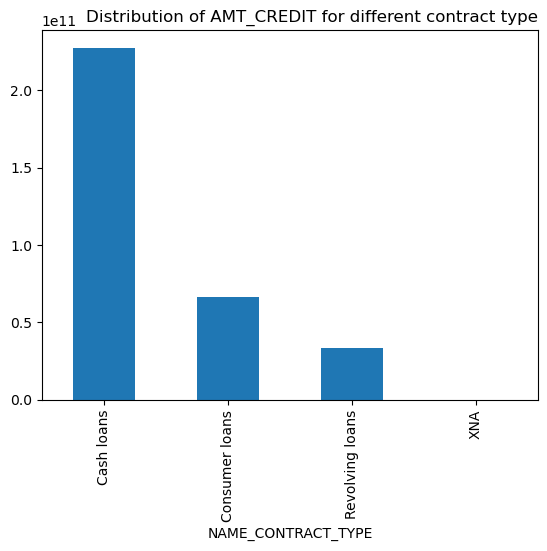

In [75]:
prevdata1.groupby(by=['NAME_CONTRACT_TYPE']).AMT_CREDIT.sum().plot.bar()
plt.title("Distribution of AMT_CREDIT for different contract type", loc="right")
plt.show()

<b>Observation:</b>Maximum amount of loans have been for cash loans.

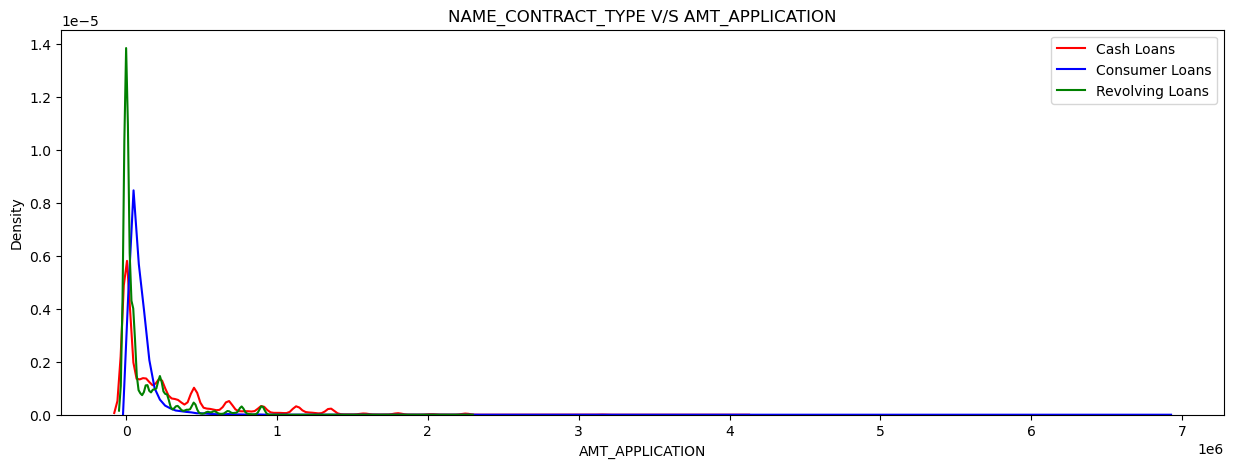

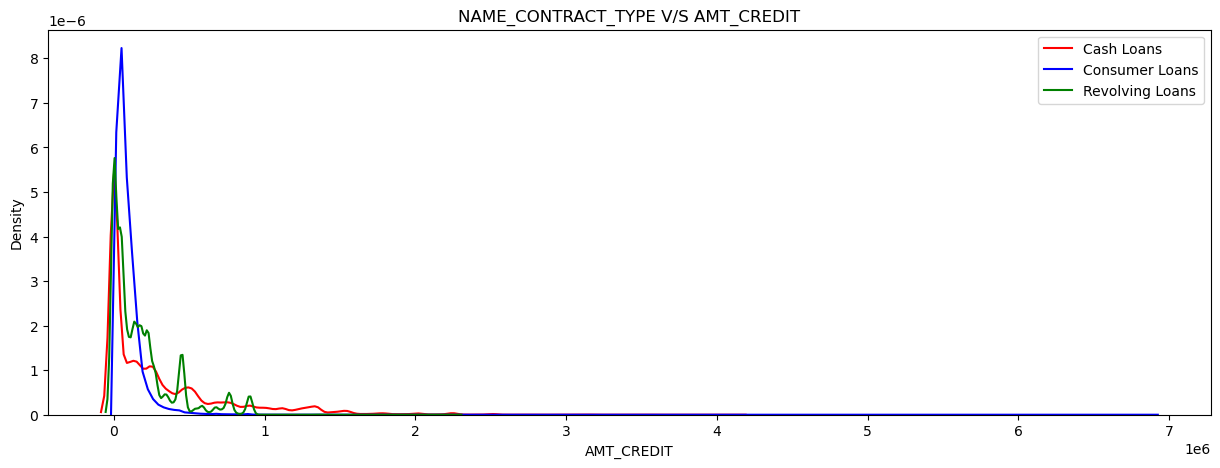

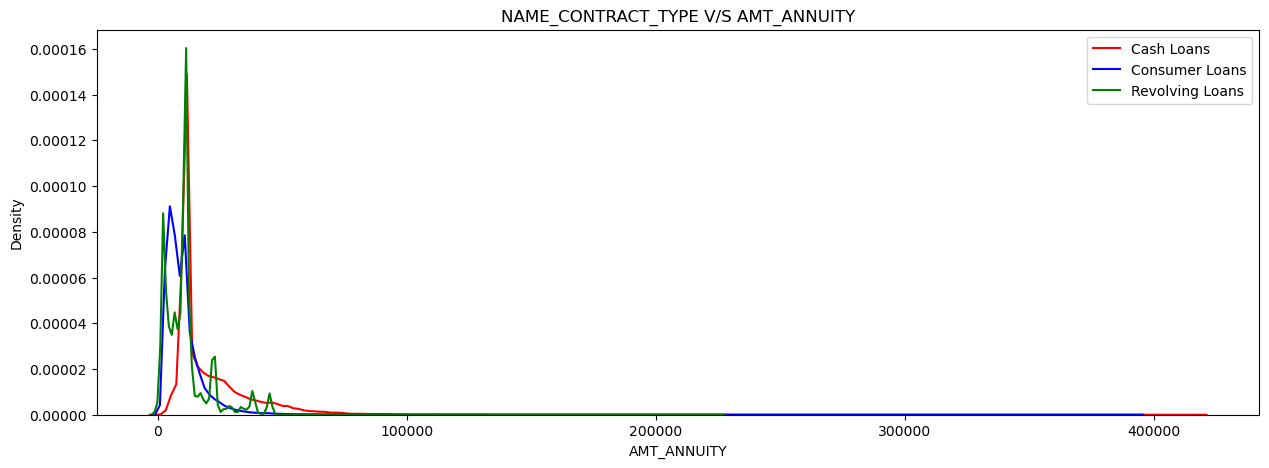

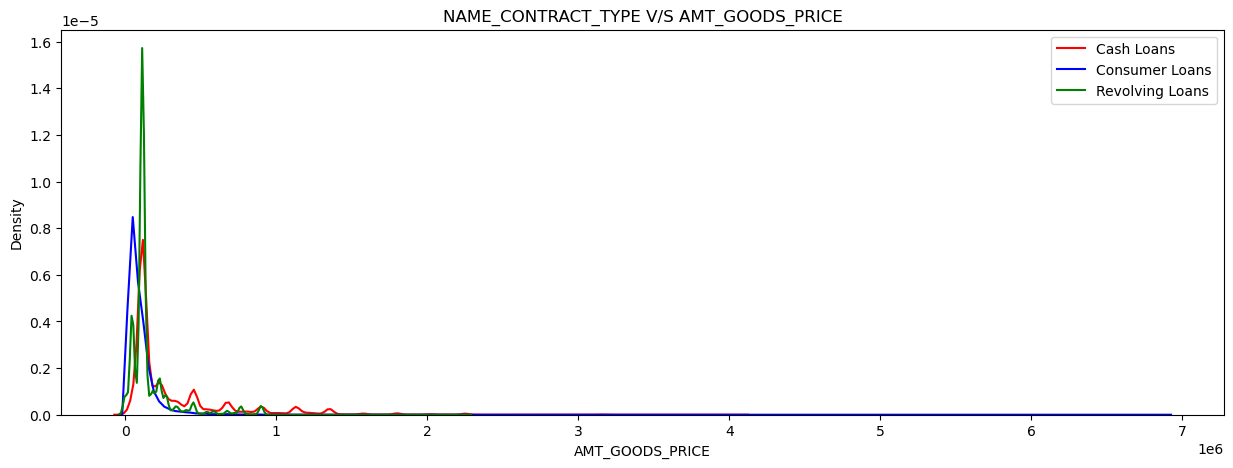

In [76]:
amt_cols1 = ["AMT_APPLICATION","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]
prev_draw_distplot(amt_cols1)    

<b>Observation: </b>Highest amount of application was for revolving loans. </br>
Highest amount of credit was given for consumer loans.</br>
Highest amount annuity was for revolving loans.</br>
Highest amount of goods price was for revolving loans.</br>

<b>Insight:</b> Highest loan amounts were asked for revolving loans but they were given much less than what they were asked. 

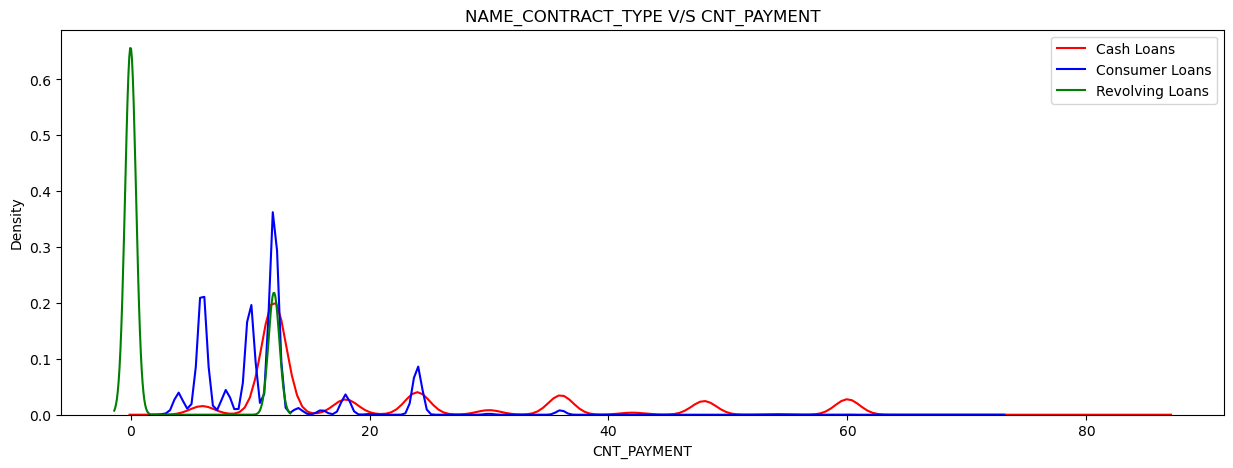

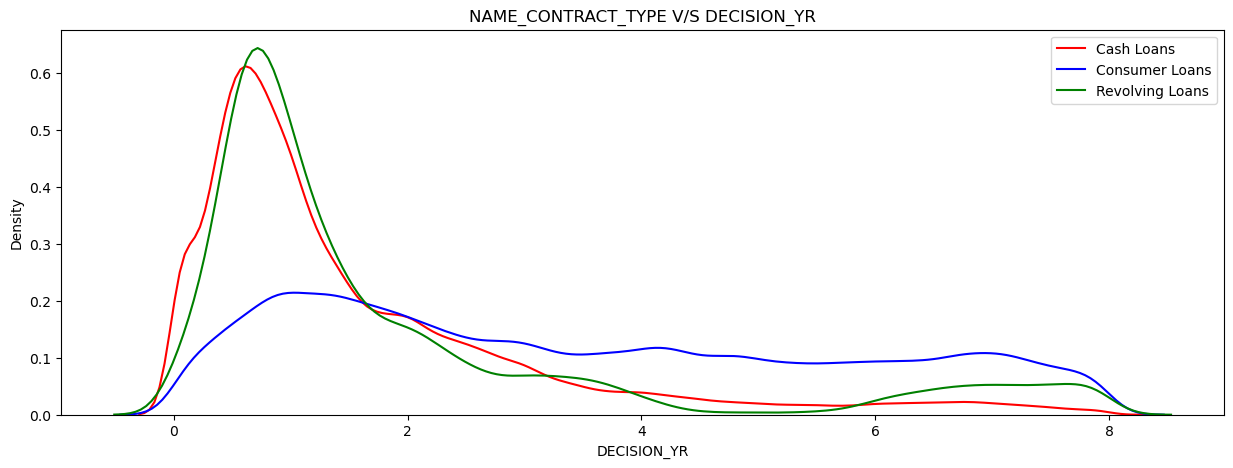

In [77]:
prev_draw_distplot(["CNT_PAYMENT","DECISION_YR"])    

<b>Observations:</b> The terms of previous credit were highest in cash loans. And the frequency of previous credit was highest in consuemr loans.</br>
Maximum clients have submitted current loan application between 0-2 years of last application. 

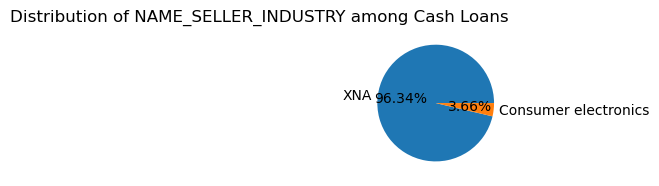

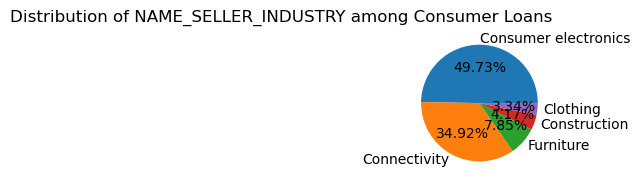

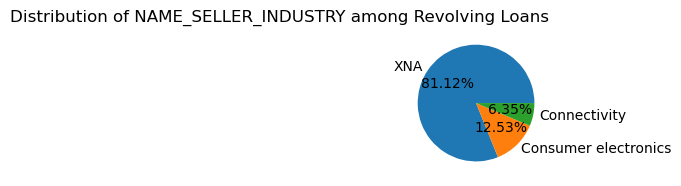

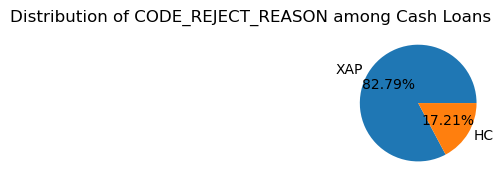

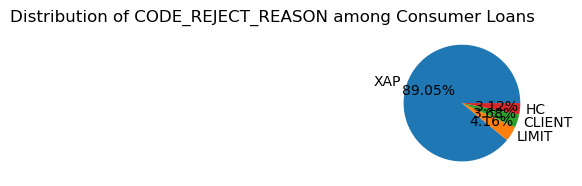

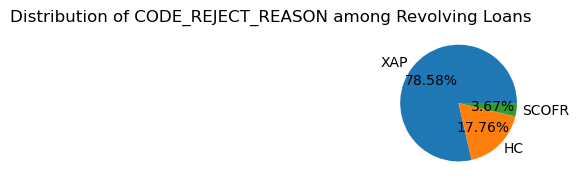

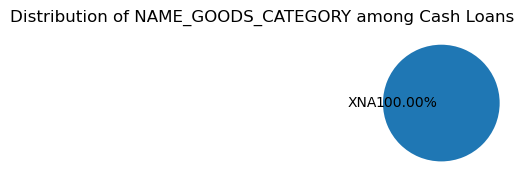

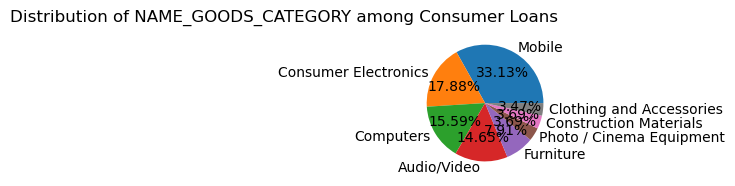

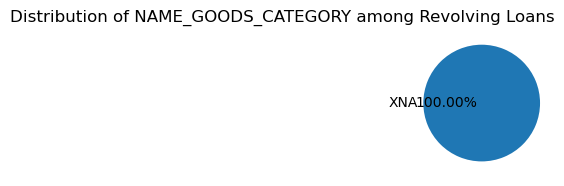

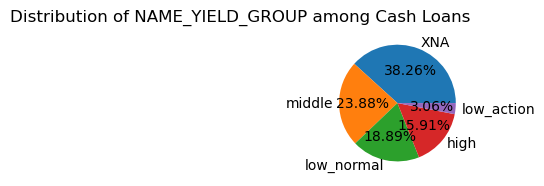

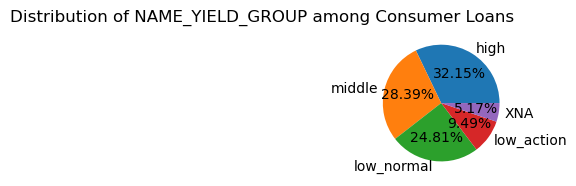

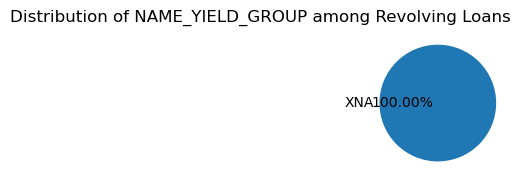

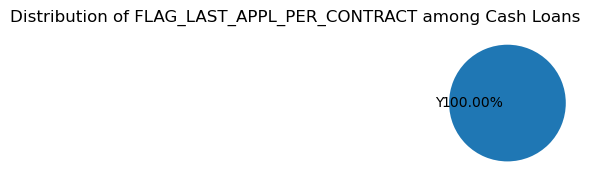

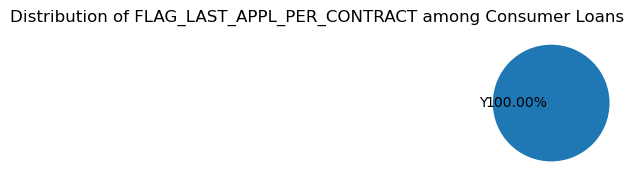

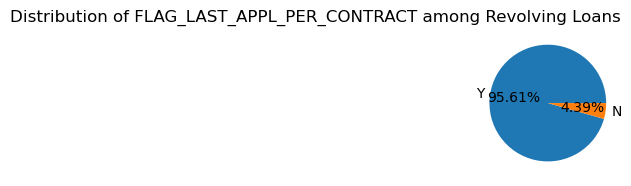

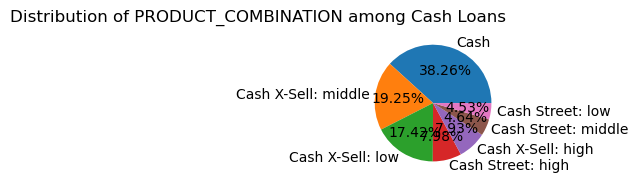

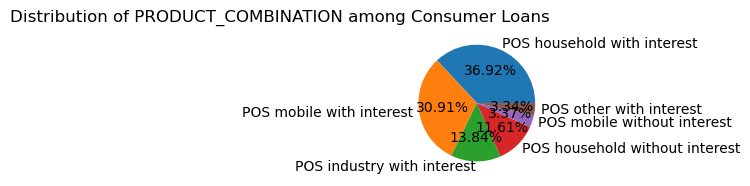

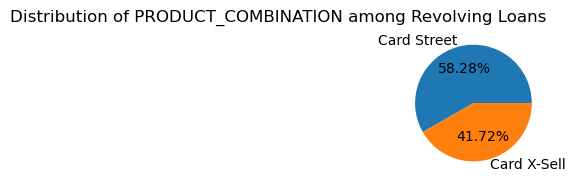

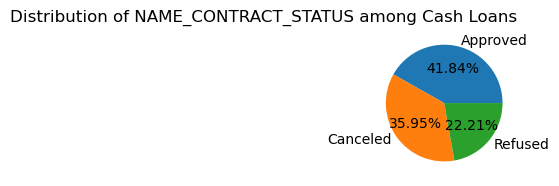

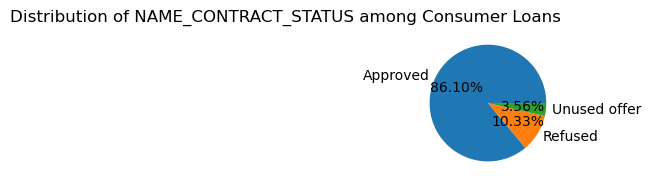

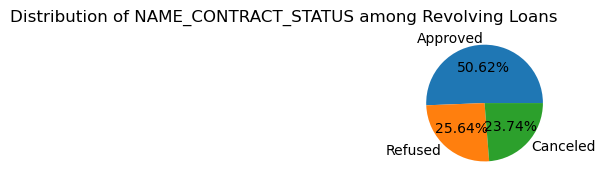

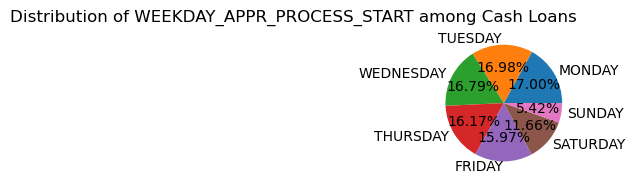

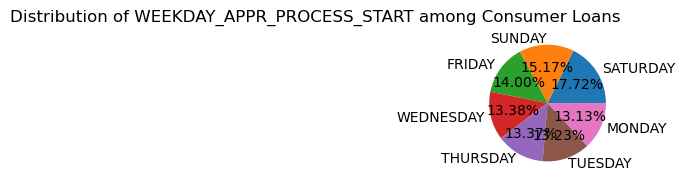

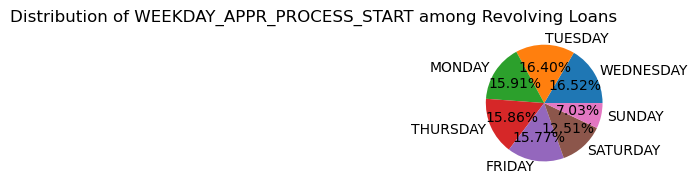

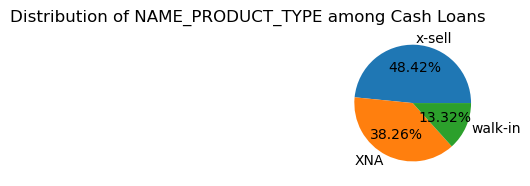

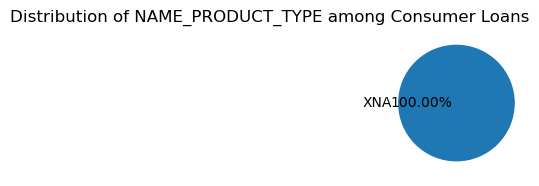

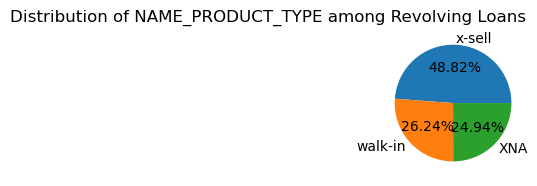

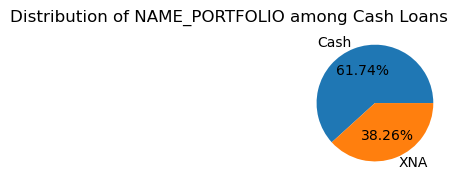

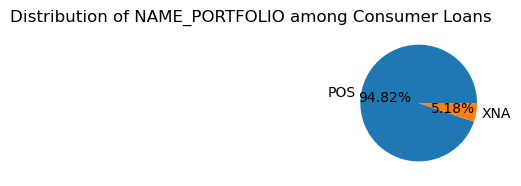

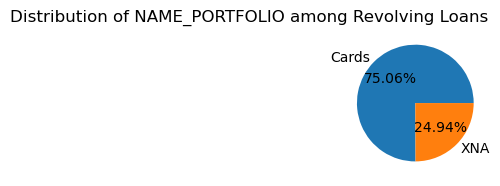

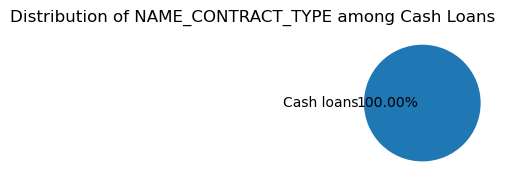

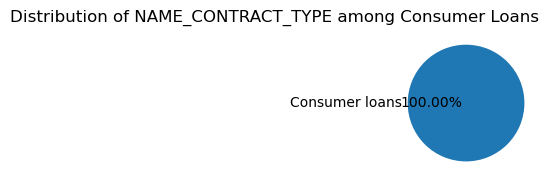

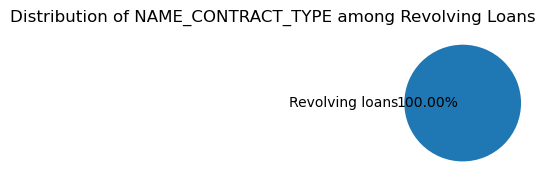

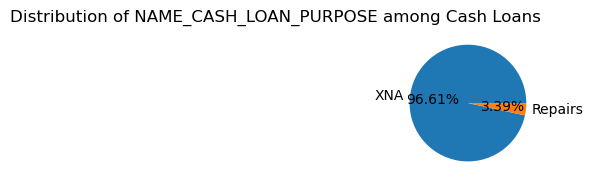

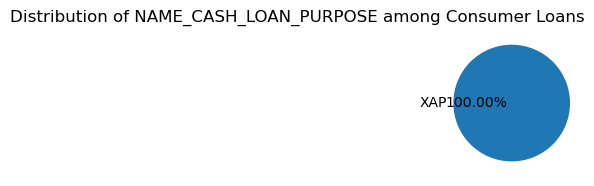

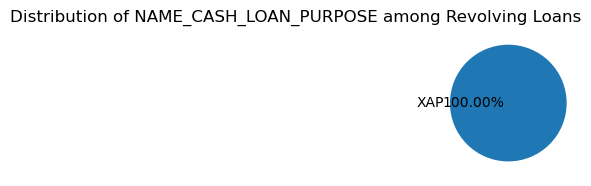

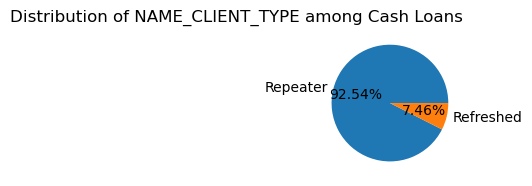

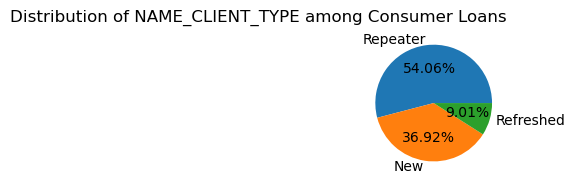

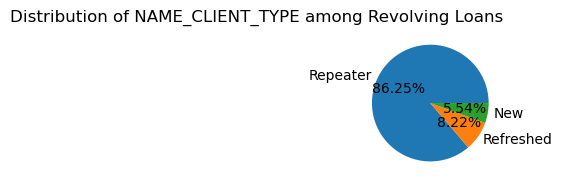

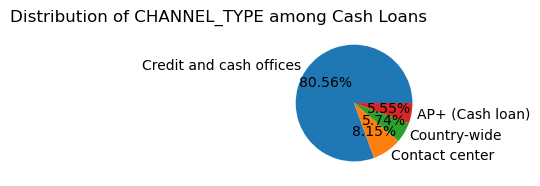

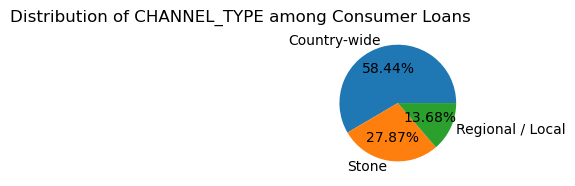

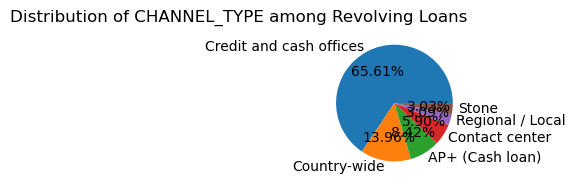

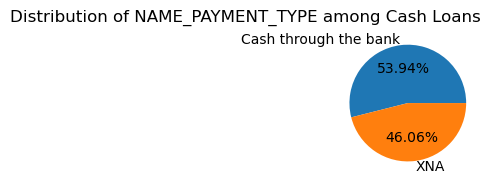

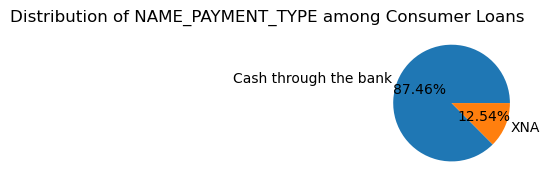

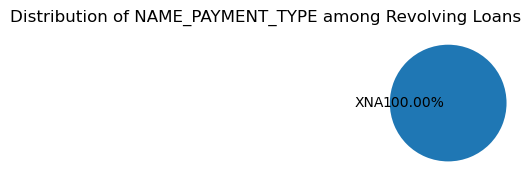

In [78]:
prev_draw_piechart(cat_prev)

<b>Observation:</b>Highest approval rate is for consumer loans.</br>
Maximum loans applications are for Consumer electronics industry for consumer loans.</br>
Highest Interest Rates were given for Consumer loans in previous application.</br>
Approval process start percentage is low over the weekend for cash and revolving loans but highest for consumer loans.</br>
Most clients prefer to pay from cash through bank.</br>
For cash and revolving loans, maximum loan clients are acquired from credit and cash offices. For Consumer loans, client applications are received from country wide.</br>
Most loan applications for consumer loans are for Mobiles.</br>
Maximum loan repeaters are in the cash loans category, followed by revolving and then consumer loans.</br>
Maximum number of previous applications amongst cash loans and revolving loans are for x-sell product type.</br>
Maximum amount of applications are having POS household with interest Product combination for consumer loans and Card Street combination for revolving loans.</br>
Major rejection reason for cash and revolving loans is HC and for consuemr loan is limit. (Assuming XAP values as null values)

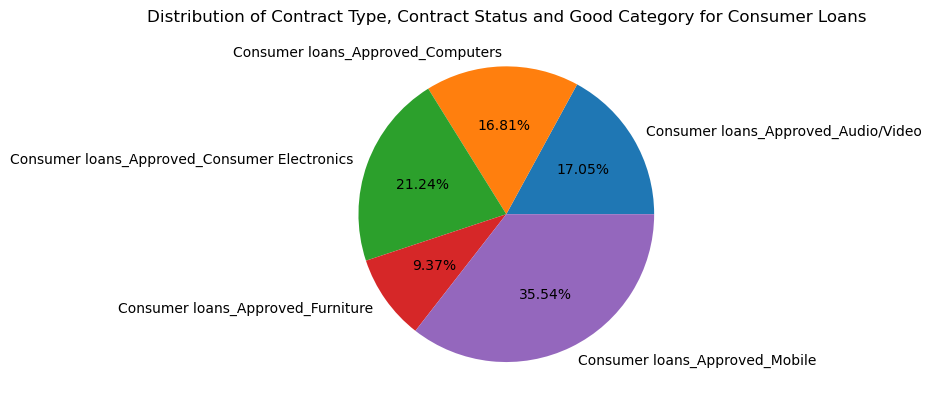

In [79]:
consloanprev1 = consloanprev[prevdata1.NAME_GOODS_CATEGORY != 'XNA']
temp1 = consloanprev1.groupby(by = ["NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS","NAME_GOODS_CATEGORY"]).count()
temp1 = temp1[temp1.SK_ID_PREV>0].reset_index()   
temp1 = temp1[["NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS","NAME_GOODS_CATEGORY","SK_ID_PREV"]]
temp1["CATEGORY"] = temp1.apply(lambda x: str(x.NAME_CONTRACT_TYPE) + '_' + str(x.NAME_CONTRACT_STATUS) + '_' + str(x.NAME_GOODS_CATEGORY), axis=1)
temp1 = temp1[temp1["SK_ID_PREV"]*100/temp1["SK_ID_PREV"].sum() > 3.5]
plt.pie(temp1["SK_ID_PREV"],labels=temp1["CATEGORY"],autopct='%1.2f%%')
plt.title('Distribution of Contract Type, Contract Status and Good Category for Consumer Loans',loc='center')
plt.show()

<b>Observation:</b> Maximum consumer loans approved are for Mobiles.

In [80]:
consloanprevcorr = consloanprev[cont_prev] 
unsorted_corr_prev = consloanprevcorr.corr().abs()
unsorted_corr1_prev = unsorted_corr_prev.unstack()
sorted_corr_prev = unsorted_corr1_prev.sort_values(ascending=False)
sorted_corr_prev.head(30)

AMT_GOODS_PRICE          AMT_GOODS_PRICE            1.000000
HOUR_APPR_PROCESS_START  HOUR_APPR_PROCESS_START    1.000000
DECISION_YR              DECISION_YR                1.000000
NFLAG_LAST_APPL_IN_DAY   NFLAG_LAST_APPL_IN_DAY     1.000000
AMT_ANNUITY              AMT_ANNUITY                1.000000
AMT_CREDIT               AMT_CREDIT                 1.000000
AMT_APPLICATION          AMT_APPLICATION            1.000000
CNT_PAYMENT              CNT_PAYMENT                1.000000
SELLERPLACE_AREA         SELLERPLACE_AREA           1.000000
SK_ID_PREV               SK_ID_PREV                 1.000000
SK_ID_CURR               SK_ID_CURR                 1.000000
AMT_APPLICATION          AMT_GOODS_PRICE            0.998900
AMT_GOODS_PRICE          AMT_APPLICATION            0.998900
AMT_APPLICATION          AMT_CREDIT                 0.977235
AMT_CREDIT               AMT_APPLICATION            0.977235
AMT_GOODS_PRICE          AMT_CREDIT                 0.976046
AMT_CREDIT              

<b>Observation:</b> Top Correlations for Consumer loans, </br>
AMT_APPLICATION and AMT_GOODS_PRICE</br>
AMT_CREDIT and AMT_APPLICATION</br>
AMT_GOODS_PRICE and AMT_CREDIT</br>
AMT_GOODS_PRICE and AMT_ANNUITY</br>
AMT_ANNUITY and AMT_CREDIT</br>
AMT_APPLICATION and AMT_ANNUITY</br>

### Analysis for merge data

In [81]:
appdata2 = appdata1[["TARGET","SK_ID_CURR","AGE","CODE_GENDER", "NAME_EDUCATION_TYPE", "NAME_INCOME_TYPE","NAME_FAMILY_STATUS","INCOME_RANGE"]]
prevdata2 = prevdata1[["SK_ID_CURR","NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS","AMT_CREDIT","AMT_APPLICATION","NAME_GOODS_CATEGORY","NAME_YIELD_GROUP"]]
final_df = pd.merge(appdata2,prevdata2,on="SK_ID_CURR",how="inner")
final_df.head()

TARGET  SK_ID_CURR    AGE CODE_GENDER            NAME_EDUCATION_TYPE  \
0       1      100002  25.92           M  Secondary / secondary special   
1       0      100003  45.93           F               Higher education   
2       0      100003  45.93           F               Higher education   
3       0      100003  45.93           F               Higher education   
4       0      100004  52.18           M  Secondary / secondary special   

  NAME_INCOME_TYPE    NAME_FAMILY_STATUS INCOME_RANGE NAME_CONTRACT_TYPE  \
0          Working  Single / not married    200K-300K     Consumer loans   
1    State servant               Married    200K-300K         Cash loans   
2    State servant               Married    200K-300K     Consumer loans   
3    State servant               Married    200K-300K     Consumer loans   
4          Working  Single / not married       0-100K     Consumer loans   

  NAME_CONTRACT_STATUS  AMT_CREDIT  AMT_APPLICATION   NAME_GOODS_CATEGORY  \
0             Approved    179055.0         179055.0              Vehicles   
1             Approved   1035882.0         900000.0                   XNA   
2             Approved    348637.5         337500.0             Furniture   
3             Approved     68053.5          68809.5  Consumer Electronics   
4             Approved     20106.0          24282.0                Mobile   

  NAME_YIELD_GROUP  
0       low_normal  
1       low_normal  
2           middle  
3           middle  
4           middle

In [82]:
final_df['CREDIT_RANGE'] = pd.cut(final_df['AMT_CREDIT'],bins=bins1, labels=label1)
tempfinal = final_df.groupby(by = ["NAME_INCOME_TYPE","NAME_FAMILY_STATUS","INCOME_RANGE","NAME_CONTRACT_TYPE","NAME_CONTRACT_STATUS","CREDIT_RANGE"])["TARGET"].sum().sort_values(ascending=False).reset_index()
tempfinal["CATEGORY"] = tempfinal.apply(lambda x: str(x.NAME_INCOME_TYPE) + '_' + str(x.NAME_FAMILY_STATUS) + '_' + str(x.INCOME_RANGE) + '_' + str(x.NAME_CONTRACT_TYPE) + '_' + str(x.NAME_CONTRACT_STATUS)+ '_' + str(x.CREDIT_RANGE), axis=1)
tempfinal = tempfinal[tempfinal["TARGET"]*100/tempfinal["TARGET"].sum() > 2]

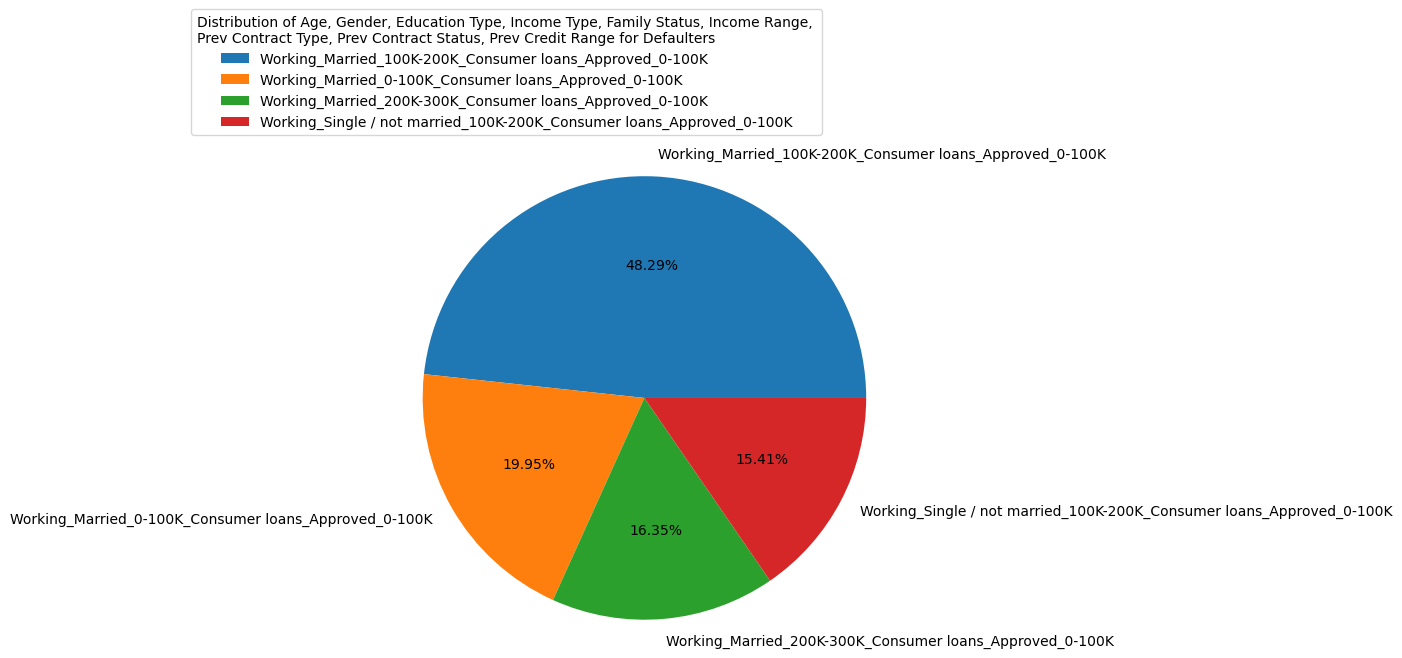

In [83]:
plt.pie(tempfinal["TARGET"],labels=tempfinal["CATEGORY"],autopct='%1.2f%%', radius = 1.5)
plt.legend(title='Distribution of Age, Gender, Education Type, Income Type, Family Status, Income Range, \nPrev Contract Type, Prev Contract Status, Prev Credit Range for Defaulters',bbox_to_anchor=(1,1.57))
plt.show()

<b>Observation:</b> Clients who are Working, Married, have income range 100K-200K, have previously got consumer loans approved for credit range 0-100K are most likely to default.